In [1]:
# Setting up the directory
import os
os.getcwd()
os.chdir('F:\GreatLake_DataAnalytics\Python\Project\Hackton')
os.getcwd()

'F:\\GreatLake_DataAnalytics\\Python\\Project\\Hackton'

In [2]:
#!pip install "modin[all]"

In [3]:
#os.environ["MODIN_ENGINE"] = "dask"  # Modin will use Dask

In [4]:
# Importing required libraries & Modin
import pandas as pd
#import modin.pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from PIL import Image
#!pip install category_encoders
#!pip install graphviz
#!conda install graphviz

In [5]:
pd.set_option("display.max_columns", None)
#pd.set_option("display.max_rows", None)
VechLoan_Train = pd.read_csv('Train_Dataset.csv')
VechLoan_Test = pd.read_csv('Test_Dataset.csv')

In [6]:
VechLoan_Train.head()

ID Client_Income  Car_Owned  Bike_Owned  Active_Loan  House_Own  \
0  12142509          6750        0.0         0.0          1.0        0.0   
1  12138936         20250        1.0         0.0          1.0        NaN   
2  12181264         18000        0.0         0.0          1.0        0.0   
3  12188929         15750        0.0         0.0          1.0        1.0   
4  12133385         33750        1.0         0.0          1.0        0.0   

   Child_Count Credit_Amount Loan_Annuity Accompany_Client Client_Income_Type  \
0          0.0      61190.55      3416.85            Alone         Commercial   
1          0.0         15282      1826.55            Alone            Service   
2          1.0      59527.35       2788.2            Alone            Service   
3          0.0       53870.4      2295.45            Alone            Retired   
4          2.0      133988.4      3547.35            Alone         Commercial   

     Client_Education Client_Marital_Status Client_Gender Loan_Contract_Type  \
0           Secondary                     M          Male                 CL   
1          Graduation                     M          Male                 CL   
2  Graduation dropout                     W          Male                 CL   
3           Secondary                     M          Male                 CL   
4           Secondary                     M        Female                 CL   

  Client_Housing_Type Population_Region_Relative  Age_Days  Age_Days_Y  \
0                Home                   0.028663   13957.0       38.24   
1                Home                   0.008575   14162.0       38.80   
2              Family                     0.0228   16790.0       46.00   
3                Home                   0.010556   23195.0       63.55   
4                Home                   0.020713   11366.0       31.14   

   Employed_Days  Registration_Days  ID_Days  ID_Days_Y  Own_House_Age  \
0         1062.0             6123.0    383.0       1.05            NaN   
1         4129.0             7833.0     21.0       0.06            0.0   
2         5102.0                NaN    331.0       0.91            NaN   
3       365243.0                NaN    775.0       2.12            NaN   
4         2977.0             5516.0   4043.0      11.08            6.0   

   Mobile_Tag  Homephone_Tag  Workphone_Working Client_Occupation  \
0           1              1                  0             Sales   
1           1              0                  1               NaN   
2           1              0                  0     Realty agents   
3           1              0                  0               NaN   
4           1              0                  0          Laborers   

   Client_Family_Members  Cleint_City_Rating  Application_Process_Day  \
0                    2.0                 2.0                      6.0   
1                    2.0                 2.0                      3.0   
2                    2.0                 2.0                      4.0   
3                    2.0                 3.0                      2.0   
4                    4.0                 1.0                      3.0   

   Application_Process_Hour Client_Permanent_Match_Tag  \
0                      17.0                        Yes   
1                      10.0                        Yes   
2                       NaN                        Yes   
3                      15.0                        Yes   
4                       NaN                        Yes   

  Client_Contact_Work_Tag       Type_Organization  Score_Source_1  \
0                     Yes            Selfemployed        0.568066   
1                     Yes              Government        0.563360   
2                     Yes            Selfemployed             NaN   
3                     Yes                     XNA             NaN   
4                     Yes  Business Entity Type 3        0.508199   

   Score_Source_2 Score_Source_3  Social_Circle_Default  Phone_Change  \
0  

In [7]:
VechLoan_Test.head()

ID Client_Income  Car_Owned  Bike_Owned  Active_Loan  House_Own  \
0  12202227         11250        0.0         1.0          1.0        1.0   
1  12279381         13500        1.0         1.0          1.0        1.0   
2  12222714         38250        0.0         1.0          0.0        1.0   
3  12265215         20250        0.0         0.0          1.0        0.0   
4  12203970         13500        1.0         1.0          0.0        1.0   

   Child_Count Credit_Amount Loan_Annuity Accompany_Client Client_Income_Type  \
0          0.0        112500       4474.8         Relative            Service   
1          3.0         49752      3252.15            Alone            Service   
2          0.0         67500       3375.0            Alone         Commercial   
3          0.0      50849.55      3814.65            Alone           Govt Job   
4          0.0       43603.2      2515.95            Alone            Service   

  Client_Education Client_Marital_Status Client_Gender Loan_Contract_Type  \
0              NaN                     M          Male                 CL   
1        Secondary                     M        Female                 CL   
2       Graduation                     M        Female                 RL   
3        Secondary                     S          Male                 CL   
4        Secondary                     M        Female                 CL   

  Client_Housing_Type  Population_Region_Relative  Age_Days  Age_Days_Y  \
0                Home                    0.019101   20063.0       54.97   
1                Home                    0.010500   13200.0       36.16   
2                Home                    0.032561   15943.0       43.68   
3                 NaN                    0.014520   15634.0       42.83   
4                Home                    0.008625   15811.0       43.32   

   Employed_Days  Registration_Days  ID_Days  ID_Days_Y  Own_House_Age  \
0         2523.0             2318.0   3318.0       9.09            NaN   
1          551.0             6972.0   3865.0      10.59            6.0   
2         1319.0              981.0   2296.0       6.29            NaN   
3         1510.0             4975.0   6121.0      16.77            NaN   
4         1075.0             5478.0   3618.0       9.91            7.0   

   Mobile_Tag  Homephone_Tag  Workphone_Working Client_Occupation  \
0           1              0                  0               NaN   
1           1              1                  0          Laborers   
2           1              0                  1          Managers   
3           1              1                  1               NaN   
4           1              0                  0          Managers   

   Client_Family_Members  Cleint_City_Rating  Application_Process_Day  \
0                    NaN                 2.0                      4.0   
1                    5.0                 3.0                      3.0   
2                    2.0                 1.0                      2.0   
3                    1.0                 2.0                      6.0   
4                    2.0                 2.0                      1.0   

   Application_Process_Hour Client_Permanent_Match_Tag  \
0                      16.0                        Yes   
1                      18.0                         No   
2                      19.0                        Yes   
3                      20.0                         No   
4                      13.0                        Yes   

  Client_Contact_Work_Tag       Type_Organization  Score_Source_1  \
0                     Yes           Self-employed             NaN   
1                     Yes           Self-employed             NaN   
2                     Yes  Business Entity Type 3             NaN   
3                      No                Medicine        0.351581   
4                     Yes           Self-employed        0.731110   

  Score_Source_2  Score_Source_3  Social_Circle_Default  Phone_Change  \
0       0.75715

In [8]:
VechLoan_Train_W = pd.read_csv('Train_Dataset.csv')
VechLoan_Test_W = pd.read_csv('Test_Dataset.csv')

In [9]:
VechLoan_Train_W.head()

ID Client_Income  Car_Owned  Bike_Owned  Active_Loan  House_Own  \
0  12142509          6750        0.0         0.0          1.0        0.0   
1  12138936         20250        1.0         0.0          1.0        NaN   
2  12181264         18000        0.0         0.0          1.0        0.0   
3  12188929         15750        0.0         0.0          1.0        1.0   
4  12133385         33750        1.0         0.0          1.0        0.0   

   Child_Count Credit_Amount Loan_Annuity Accompany_Client Client_Income_Type  \
0          0.0      61190.55      3416.85            Alone         Commercial   
1          0.0         15282      1826.55            Alone            Service   
2          1.0      59527.35       2788.2            Alone            Service   
3          0.0       53870.4      2295.45            Alone            Retired   
4          2.0      133988.4      3547.35            Alone         Commercial   

     Client_Education Client_Marital_Status Client_Gender Loan_Contract_Type  \
0           Secondary                     M          Male                 CL   
1          Graduation                     M          Male                 CL   
2  Graduation dropout                     W          Male                 CL   
3           Secondary                     M          Male                 CL   
4           Secondary                     M        Female                 CL   

  Client_Housing_Type Population_Region_Relative  Age_Days  Age_Days_Y  \
0                Home                   0.028663   13957.0       38.24   
1                Home                   0.008575   14162.0       38.80   
2              Family                     0.0228   16790.0       46.00   
3                Home                   0.010556   23195.0       63.55   
4                Home                   0.020713   11366.0       31.14   

   Employed_Days  Registration_Days  ID_Days  ID_Days_Y  Own_House_Age  \
0         1062.0             6123.0    383.0       1.05            NaN   
1         4129.0             7833.0     21.0       0.06            0.0   
2         5102.0                NaN    331.0       0.91            NaN   
3       365243.0                NaN    775.0       2.12            NaN   
4         2977.0             5516.0   4043.0      11.08            6.0   

   Mobile_Tag  Homephone_Tag  Workphone_Working Client_Occupation  \
0           1              1                  0             Sales   
1           1              0                  1               NaN   
2           1              0                  0     Realty agents   
3           1              0                  0               NaN   
4           1              0                  0          Laborers   

   Client_Family_Members  Cleint_City_Rating  Application_Process_Day  \
0                    2.0                 2.0                      6.0   
1                    2.0                 2.0                      3.0   
2                    2.0                 2.0                      4.0   
3                    2.0                 3.0                      2.0   
4                    4.0                 1.0                      3.0   

   Application_Process_Hour Client_Permanent_Match_Tag  \
0                      17.0                        Yes   
1                      10.0                        Yes   
2                       NaN                        Yes   
3                      15.0                        Yes   
4                       NaN                        Yes   

  Client_Contact_Work_Tag       Type_Organization  Score_Source_1  \
0                     Yes            Selfemployed        0.568066   
1                     Yes              Government        0.563360   
2                     Yes            Selfemployed             NaN   
3                     Yes                     XNA             NaN   
4                     Yes  Business Entity Type 3        0.508199   

   Score_Source_2 Score_Source_3  Social_Circle_Default  Phone_Change  \
0  

In [10]:
VechLoan_Test_W.head()

ID Client_Income  Car_Owned  Bike_Owned  Active_Loan  House_Own  \
0  12202227         11250        0.0         1.0          1.0        1.0   
1  12279381         13500        1.0         1.0          1.0        1.0   
2  12222714         38250        0.0         1.0          0.0        1.0   
3  12265215         20250        0.0         0.0          1.0        0.0   
4  12203970         13500        1.0         1.0          0.0        1.0   

   Child_Count Credit_Amount Loan_Annuity Accompany_Client Client_Income_Type  \
0          0.0        112500       4474.8         Relative            Service   
1          3.0         49752      3252.15            Alone            Service   
2          0.0         67500       3375.0            Alone         Commercial   
3          0.0      50849.55      3814.65            Alone           Govt Job   
4          0.0       43603.2      2515.95            Alone            Service   

  Client_Education Client_Marital_Status Client_Gender Loan_Contract_Type  \
0              NaN                     M          Male                 CL   
1        Secondary                     M        Female                 CL   
2       Graduation                     M        Female                 RL   
3        Secondary                     S          Male                 CL   
4        Secondary                     M        Female                 CL   

  Client_Housing_Type  Population_Region_Relative  Age_Days  Age_Days_Y  \
0                Home                    0.019101   20063.0       54.97   
1                Home                    0.010500   13200.0       36.16   
2                Home                    0.032561   15943.0       43.68   
3                 NaN                    0.014520   15634.0       42.83   
4                Home                    0.008625   15811.0       43.32   

   Employed_Days  Registration_Days  ID_Days  ID_Days_Y  Own_House_Age  \
0         2523.0             2318.0   3318.0       9.09            NaN   
1          551.0             6972.0   3865.0      10.59            6.0   
2         1319.0              981.0   2296.0       6.29            NaN   
3         1510.0             4975.0   6121.0      16.77            NaN   
4         1075.0             5478.0   3618.0       9.91            7.0   

   Mobile_Tag  Homephone_Tag  Workphone_Working Client_Occupation  \
0           1              0                  0               NaN   
1           1              1                  0          Laborers   
2           1              0                  1          Managers   
3           1              1                  1               NaN   
4           1              0                  0          Managers   

   Client_Family_Members  Cleint_City_Rating  Application_Process_Day  \
0                    NaN                 2.0                      4.0   
1                    5.0                 3.0                      3.0   
2                    2.0                 1.0                      2.0   
3                    1.0                 2.0                      6.0   
4                    2.0                 2.0                      1.0   

   Application_Process_Hour Client_Permanent_Match_Tag  \
0                      16.0                        Yes   
1                      18.0                         No   
2                      19.0                        Yes   
3                      20.0                         No   
4                      13.0                        Yes   

  Client_Contact_Work_Tag       Type_Organization  Score_Source_1  \
0                     Yes           Self-employed             NaN   
1                     Yes           Self-employed             NaN   
2                     Yes  Business Entity Type 3             NaN   
3                      No                Medicine        0.351581   
4                     Yes           Self-employed        0.731110   

  Score_Source_2  Score_Source_3  Social_Circle_Default  Phone_Change  \
0       0.75715

In [11]:
# Drop columns which are not valude added - both in Train and Test data
VechLoan_Train_W.drop(['ID','Population_Region_Relative','Age_Days','Employed_Days','Registration_Days','ID_Days',
                       'Application_Process_Day','Application_Process_Hour','Score_Source_1','Score_Source_2','Score_Source_3',
                       'Phone_Change'],axis = 1,inplace=True)
VechLoan_Test_W.drop(['ID','Population_Region_Relative','Age_Days','Employed_Days','Registration_Days','ID_Days',
                      'Application_Process_Day','Application_Process_Hour','Score_Source_1','Score_Source_2','Score_Source_3',
                       'Phone_Change'],axis = 1,inplace=True)

In [12]:
VechLoan_Train_W.head()

Client_Income  Car_Owned  Bike_Owned  Active_Loan  House_Own  Child_Count  \
0          6750        0.0         0.0          1.0        0.0          0.0   
1         20250        1.0         0.0          1.0        NaN          0.0   
2         18000        0.0         0.0          1.0        0.0          1.0   
3         15750        0.0         0.0          1.0        1.0          0.0   
4         33750        1.0         0.0          1.0        0.0          2.0   

  Credit_Amount Loan_Annuity Accompany_Client Client_Income_Type  \
0      61190.55      3416.85            Alone         Commercial   
1         15282      1826.55            Alone            Service   
2      59527.35       2788.2            Alone            Service   
3       53870.4      2295.45            Alone            Retired   
4      133988.4      3547.35            Alone         Commercial   

     Client_Education Client_Marital_Status Client_Gender Loan_Contract_Type  \
0           Secondary                     M          Male                 CL   
1          Graduation                     M          Male                 CL   
2  Graduation dropout                     W          Male                 CL   
3           Secondary                     M          Male                 CL   
4           Secondary                     M        Female                 CL   

  Client_Housing_Type  Age_Days_Y  ID_Days_Y  Own_House_Age  Mobile_Tag  \
0                Home       38.24       1.05            NaN           1   
1                Home       38.80       0.06            0.0           1   
2              Family       46.00       0.91            NaN           1   
3                Home       63.55       2.12            NaN           1   
4                Home       31.14      11.08            6.0           1   

   Homephone_Tag  Workphone_Working Client_Occupation  Client_Family_Members  \
0              1                  0             Sales                    2.0   
1              0                  1               NaN                    2.0   
2              0                  0     Realty agents                    2.0   
3              0                  0               NaN                    2.0   
4              0                  0          Laborers                    4.0   

   Cleint_City_Rating Client_Permanent_Match_Tag Client_Contact_Work_Tag  \
0                 2.0                        Yes                     Yes   
1                 2.0                        Yes                     Yes   
2                 2.0                        Yes                     Yes   
3                 3.0                        Yes                     Yes   
4                 1.0                        Yes                     Yes   

        Type_Organization  Social_Circle_Default  Credit_Bureau  Default  
0            Selfemployed                 0.0186            NaN        0  
1              Government                    NaN            NaN        0  
2            Selfemployed                 0.0742            0.0        0  
3                     XNA                    NaN            3.0        0  
4  Business Entity Type 3                 0.2021            1.0        0

In [13]:
VechLoan_Test_W.head()

Client_Income  Car_Owned  Bike_Owned  Active_Loan  House_Own  Child_Count  \
0         11250        0.0         1.0          1.0        1.0          0.0   
1         13500        1.0         1.0          1.0        1.0          3.0   
2         38250        0.0         1.0          0.0        1.0          0.0   
3         20250        0.0         0.0          1.0        0.0          0.0   
4         13500        1.0         1.0          0.0        1.0          0.0   

  Credit_Amount Loan_Annuity Accompany_Client Client_Income_Type  \
0        112500       4474.8         Relative            Service   
1         49752      3252.15            Alone            Service   
2         67500       3375.0            Alone         Commercial   
3      50849.55      3814.65            Alone           Govt Job   
4       43603.2      2515.95            Alone            Service   

  Client_Education Client_Marital_Status Client_Gender Loan_Contract_Type  \
0              NaN                     M          Male                 CL   
1        Secondary                     M        Female                 CL   
2       Graduation                     M        Female                 RL   
3        Secondary                     S          Male                 CL   
4        Secondary                     M        Female                 CL   

  Client_Housing_Type  Age_Days_Y  ID_Days_Y  Own_House_Age  Mobile_Tag  \
0                Home       54.97       9.09            NaN           1   
1                Home       36.16      10.59            6.0           1   
2                Home       43.68       6.29            NaN           1   
3                 NaN       42.83      16.77            NaN           1   
4                Home       43.32       9.91            7.0           1   

   Homephone_Tag  Workphone_Working Client_Occupation  Client_Family_Members  \
0              0                  0               NaN                    NaN   
1              1                  0          Laborers                    5.0   
2              0                  1          Managers                    2.0   
3              1                  1               NaN                    1.0   
4              0                  0          Managers                    2.0   

   Cleint_City_Rating Client_Permanent_Match_Tag Client_Contact_Work_Tag  \
0                 2.0                        Yes                     Yes   
1                 3.0                         No                     Yes   
2                 1.0                        Yes                     Yes   
3                 2.0                         No                      No   
4                 2.0                        Yes                     Yes   

        Type_Organization  Social_Circle_Default  Credit_Bureau  
0           Self-employed                 0.0515            2.0  
1           Self-employed                    NaN            NaN  
2  Business Entity Type 3                 0.1503            NaN  
3                Medicine                    NaN            4.0  
4           Self-employed                    NaN            1.0

In [14]:
# Determining no. of records and features and its names - Train set
print(VechLoan_Train_W.shape)
print(VechLoan_Train_W.columns)

(121856, 30)
Index(['Client_Income', 'Car_Owned', 'Bike_Owned', 'Active_Loan', 'House_Own',
       'Child_Count', 'Credit_Amount', 'Loan_Annuity', 'Accompany_Client',
       'Client_Income_Type', 'Client_Education', 'Client_Marital_Status',
       'Client_Gender', 'Loan_Contract_Type', 'Client_Housing_Type',
       'Age_Days_Y', 'ID_Days_Y', 'Own_House_Age', 'Mobile_Tag',
       'Homephone_Tag', 'Workphone_Working', 'Client_Occupation',
       'Client_Family_Members', 'Cleint_City_Rating',
       'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag',
       'Type_Organization', 'Social_Circle_Default', 'Credit_Bureau',
       'Default'],
      dtype='object')


In [15]:
# Determining no. of records and features and its names - Test set
print(VechLoan_Test_W.shape)
print(VechLoan_Test_W.columns)

(80900, 29)
Index(['Client_Income', 'Car_Owned', 'Bike_Owned', 'Active_Loan', 'House_Own',
       'Child_Count', 'Credit_Amount', 'Loan_Annuity', 'Accompany_Client',
       'Client_Income_Type', 'Client_Education', 'Client_Marital_Status',
       'Client_Gender', 'Loan_Contract_Type', 'Client_Housing_Type',
       'Age_Days_Y', 'ID_Days_Y', 'Own_House_Age', 'Mobile_Tag',
       'Homephone_Tag', 'Workphone_Working', 'Client_Occupation',
       'Client_Family_Members', 'Cleint_City_Rating',
       'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag',
       'Type_Organization', 'Social_Circle_Default', 'Credit_Bureau'],
      dtype='object')


In [16]:
# Check the Data types of the features
VechLoan_Train_W.info()
VechLoan_Test_W.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 30 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Client_Income               118249 non-null  object 
 1   Car_Owned                   118275 non-null  float64
 2   Bike_Owned                  118232 non-null  float64
 3   Active_Loan                 118221 non-null  float64
 4   House_Own                   118195 non-null  float64
 5   Child_Count                 118218 non-null  float64
 6   Credit_Amount               118224 non-null  object 
 7   Loan_Annuity                117044 non-null  object 
 8   Accompany_Client            120098 non-null  object 
 9   Client_Income_Type          118155 non-null  object 
 10  Client_Education            118211 non-null  object 
 11  Client_Marital_Status       118383 non-null  object 
 12  Client_Gender               119443 non-null  object 
 13  Loan_Contract_

# Data cleaning

In [18]:
# Replacing special character presence in Train & Test
VechLoan_Train_W['Client_Income']=VechLoan_Train_W['Client_Income'].str.replace('$','')
VechLoan_Train_W['Credit_Amount']=VechLoan_Train_W['Credit_Amount'].str.replace('$','')
VechLoan_Train_W['Loan_Annuity']=VechLoan_Train_W['Loan_Annuity'].str.replace('$','')

VechLoan_Test_W['Client_Income']=VechLoan_Test_W['Client_Income'].str.replace('$','')
VechLoan_Test_W['Credit_Amount']=VechLoan_Test_W['Credit_Amount'].str.replace('$','')
VechLoan_Test_W['Loan_Annuity']=VechLoan_Test_W['Loan_Annuity'].str.replace('$','')

# Missing value identification

In [19]:
# Check for Missing values in Train
pd.DataFrame(VechLoan_Train_W.isnull().sum(), columns= ['Number of missing values'])
percent_missing_t=round(VechLoan_Train_W.isnull().sum()*100/len(VechLoan_Train_W),2)
missing_value_df_t = pd.DataFrame({'Number of missing values':VechLoan_Train_W.isnull().sum(),
                               'Percentage of missing values': percent_missing_t})
missing_value_df_t.sort_values(by=['Percentage of missing values'],ascending=False)

Number of missing values  \
Credit_Amount                                  83133   
Own_House_Age                                  80095   
Social_Circle_Default                          61928   
Client_Occupation                              41435   
Loan_Annuity                                   27484   
Client_Income                                  19505   
Credit_Bureau                                  18540   
ID_Days_Y                                       5991   
Client_Income_Type                              3701   
Client_Housing_Type                             3687   
House_Own                                       3661   
Loan_Contract_Type                              3651   
Child_Count                                     3638   
Client_Education                                3645   
Active_Loan                                     3635   
Age_Days_Y                                      3617   
Bike_Owned                                      3624   
Type_Organization                               3609   
Car_Owned                                       3581   
Client_Marital_Status                           3473   
Client_Gender                                   2413   
Client_Family_Members                           2410   
Cleint_City_Rating                              2409   
Accompany_Client                                1758   
Mobile_Tag                                         0   
Homephone_Tag                                      0   
Workphone_Working                                  0   
Client_Permanent_Match_Tag                         0   
Client_Contact_Work_Tag                            0   
Default                                            0   

                            Percentage of missing values  
Credit_Amount                                      68.22  
Own_House_Age                                      65.73  
Social_Circle_Default                              50.82  
Client_Occupation                                  34.00  
Loan_Annuity                                       22.55  
Client_Income                                      16.01  
Credit_Bureau                                      15.21  
ID_Days_Y                                           4.92  
Client_Income_Type                                  3.04  
Client_Housing_Type                                 3.03  
House_Own                                           3.00  
Loan_Contract_Type                                  3.00  
Child_Count                                         2.99  
Client_Education                                    2.99  
Active_Loan                                         2.98  
Age_Days_Y                                          2.97  
Bike_Owned                                          2.97  
Type_Organization                                   2.96  
Car_Owned                                           2.94  
Client_Marital_Status                               2.85  
Client_Gender                                       1.98  
Client_Family_Members                               1.98  
Cleint_City_Rating                                  1.98  
Accompany_Client                                    1.44  
Mobile_Tag                                          0.00  
Homephone_Tag                                       0.00  
Workphone_Working                                   0.00  
Client_Permanent_Match_Tag                          0.00  
Client_Contact_Work_Tag                             0.00  
Default                                             0.00

In [20]:
# Check for Missing values in Test
pd.DataFrame(VechLoan_Train_W.isnull().sum(), columns= ['Number of missing values'])
percent_missing_te = round((VechLoan_Test_W.isnull().sum()) * 100 /len(VechLoan_Train_W),2)
missing_value_df_te = pd.DataFrame({'Number of missing values':VechLoan_Test_W.isnull().sum(),
                                 'Percentage of missing values': percent_missing_te})
missing_value_df_te.sort_values(by=['Percentage of missing values'],ascending=False)

Number of missing values  \
Loan_Annuity                                   66141   
Own_House_Age                                  53581   
Social_Circle_Default                          41090   
Credit_Amount                                  34115   
Client_Occupation                              27845   
Credit_Bureau                                  12282   
ID_Days_Y                                       3887   
Client_Income_Type                              2501   
Age_Days_Y                                      2484   
Bike_Owned                                      2486   
Type_Organization                               2459   
Active_Loan                                     2454   
Client_Income                                   2434   
Client_Marital_Status                           2443   
Client_Housing_Type                             2408   
Car_Owned                                       2405   
Client_Education                                2350   
House_Own                                       2347   
Child_Count                                     2328   
Loan_Contract_Type                              2321   
Client_Family_Members                           1644   
Client_Gender                                   1627   
Cleint_City_Rating                              1631   
Accompany_Client                                1212   
Mobile_Tag                                         0   
Homephone_Tag                                      0   
Workphone_Working                                  0   
Client_Permanent_Match_Tag                         0   
Client_Contact_Work_Tag                            0   

                            Percentage of missing values  
Loan_Annuity                                       54.28  
Own_House_Age                                      43.97  
Social_Circle_Default                              33.72  
Credit_Amount                                      28.00  
Client_Occupation                                  22.85  
Credit_Bureau                                      10.08  
ID_Days_Y                                           3.19  
Client_Income_Type                                  2.05  
Age_Days_Y                                          2.04  
Bike_Owned                                          2.04  
Type_Organization                                   2.02  
Active_Loan                                         2.01  
Client_Income                                       2.00  
Client_Marital_Status                               2.00  
Client_Housing_Type                                 1.98  
Car_Owned                                           1.97  
Client_Education                                    1.93  
House_Own                                           1.93  
Child_Count                                         1.91  
Loan_Contract_Type                                  1.90  
Client_Family_Members                               1.35  
Client_Gender                                       1.34  
Cleint_City_Rating                                  1.34  
Accompany_Client                                    0.99  
Mobile_Tag                                          0.00  
Homephone_Tag                                       0.00  
Workphone_Working                                   0.00  
Client_Permanent_Match_Tag                          0.00  
Client_Contact_Work_Tag                             0.00

# Encoding for Categorical variables

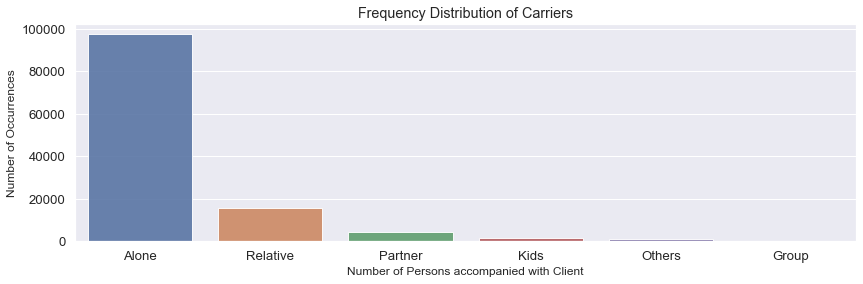

Alone       97409
Relative    15748
Partner      4516
Kids         1334
Others        987
Group         104
Name: Accompany_Client, dtype: int64

In [21]:
# Train set
Accompany_Client_Count = VechLoan_Train_W['Accompany_Client'].value_counts()
sns.set(style="darkgrid",font_scale=1.2)
plt.figure(figsize=(14, 4))
sns.barplot(Accompany_Client_Count.index, Accompany_Client_Count.values, alpha=0.9)
plt.title('Frequency Distribution of Carriers')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of Persons accompanied with Client', fontsize=12)
plt.show()
Accompany_Client_Count

In [22]:
# Assigning values based for "Accompany_Client" based on it frequency order
replace_map = {'Accompany_Client': {'Alone': 1, 'Relative': 2, 'Partner': 3, 'Kids': 4,
                                  'Others': 5, 'Group': 6}}
VechLoan_Train_W['Accompany_Client'].astype('category')
print(replace_map)
VechLoan_Train_W.replace(replace_map, inplace=True)
VechLoan_Test_W.replace(replace_map, inplace=True)

{'Accompany_Client': {'Alone': 1, 'Relative': 2, 'Partner': 3, 'Kids': 4, 'Others': 5, 'Group': 6}}


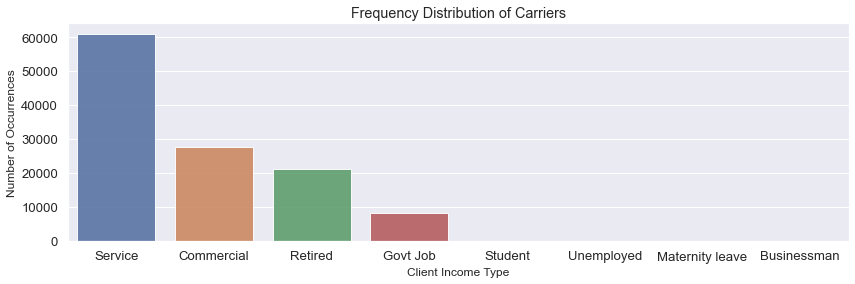

Service            61028
Commercial         27764
Retired            21043
Govt Job            8303
Student                8
Unemployed             6
Maternity leave        2
Businessman            1
Name: Client_Income_Type, dtype: int64

In [23]:
Client_Income_Type_Count = VechLoan_Train_W['Client_Income_Type'].value_counts()
sns.set(style="darkgrid",font_scale=1.2)
plt.figure(figsize=(14, 4))
sns.barplot(Client_Income_Type_Count.index, Client_Income_Type_Count.values, alpha=0.9)
plt.title('Frequency Distribution of Carriers')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Client Income Type', fontsize=12)
plt.show()
Client_Income_Type_Count

In [24]:
#Assigning values based for "Client_Income_Type" based on it frequency order
replace_map2 = {'Client_Income_Type': {'Service': 1, 'Commercial': 2, 'Retired': 3, 'Govt Job': 4,
                                  'Student': 5, 'Unemployed': 6,'Maternity leave': 7,'Businessman':8}}
VechLoan_Train_W['Client_Income_Type'].astype('category')
print(replace_map2)
VechLoan_Train_W.replace(replace_map2, inplace=True)
VechLoan_Test_W.replace(replace_map2, inplace=True)

{'Client_Income_Type': {'Service': 1, 'Commercial': 2, 'Retired': 3, 'Govt Job': 4, 'Student': 5, 'Unemployed': 6, 'Maternity leave': 7, 'Businessman': 8}}


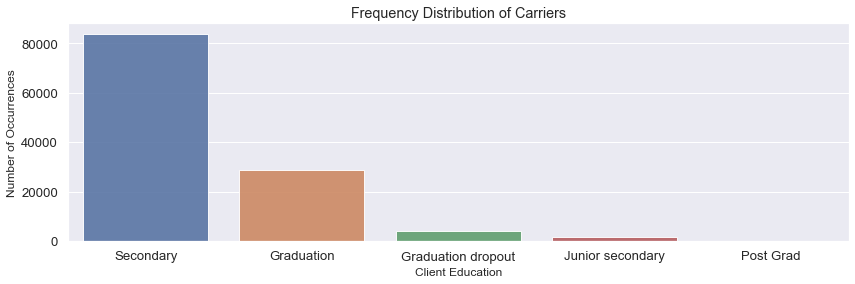

Secondary             83911
Graduation            28819
Graduation dropout     3960
Junior secondary       1455
Post Grad                66
Name: Client_Education, dtype: int64

In [25]:
Client_Education_Count = VechLoan_Train_W['Client_Education'].value_counts()
sns.set(style="darkgrid",font_scale=1.2)
plt.figure(figsize=(14, 4))
sns.barplot(Client_Education_Count.index, Client_Education_Count.values, alpha=0.9)
plt.title('Frequency Distribution of Carriers')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Client Education', fontsize=12)
plt.show()
Client_Education_Count

In [26]:
#Assigning values based for "Client_Education" based on it frequency order
replace_map3 = {'Client_Education': {'Secondary': 1, 'Graduation': 2, 'Graduation dropout': 3, 'Junior secondary': 4,
                                  'Post Grad': 5}}
VechLoan_Train_W['Client_Education'].astype('category')
print(replace_map3)
VechLoan_Train_W.replace(replace_map3, inplace=True)
VechLoan_Test_W.replace(replace_map3, inplace=True)

{'Client_Education': {'Secondary': 1, 'Graduation': 2, 'Graduation dropout': 3, 'Junior secondary': 4, 'Post Grad': 5}}


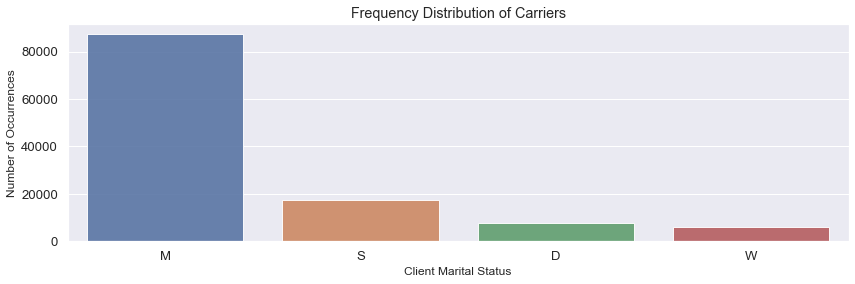

M    87349
S    17404
D     7556
W     6074
Name: Client_Marital_Status, dtype: int64

In [27]:
Client_Marital_Status_Count = VechLoan_Train_W['Client_Marital_Status'].value_counts()
sns.set(style="darkgrid",font_scale=1.2)
plt.figure(figsize=(14, 4))
sns.barplot(Client_Marital_Status_Count.index, Client_Marital_Status_Count.values, alpha=0.9)
plt.title('Frequency Distribution of Carriers')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Client Marital Status', fontsize=12)
plt.show()
Client_Marital_Status_Count

In [28]:
#Assigning values based for "Client_Marital_Status" based on it frequency order
replace_map4 = {'Client_Marital_Status': {'M': 1, 'S': 2, 'D': 3, 'W': 4}}
VechLoan_Train_W['Client_Marital_Status'].astype('category')
print(replace_map4)
VechLoan_Train_W.replace(replace_map4, inplace=True)
VechLoan_Test_W.replace(replace_map4, inplace=True)

{'Client_Marital_Status': {'M': 1, 'S': 2, 'D': 3, 'W': 4}}


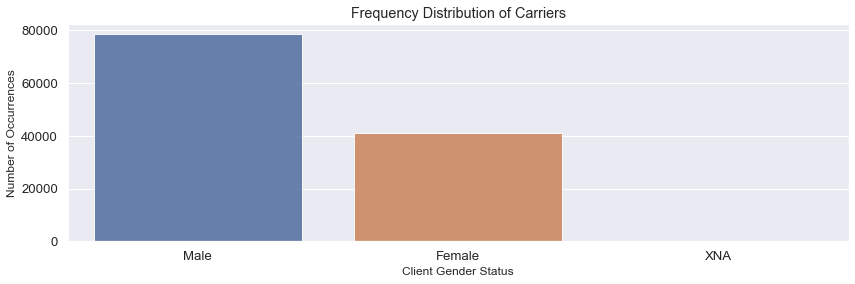

Male      78463
Female    40977
XNA           3
Name: Client_Gender, dtype: int64

In [29]:
Client_Gender_Count = VechLoan_Train_W['Client_Gender'].value_counts()
sns.set(style="darkgrid",font_scale=1.2)
plt.figure(figsize=(14, 4))
sns.barplot(Client_Gender_Count.index, Client_Gender_Count.values, alpha=0.9)
plt.title('Frequency Distribution of Carriers')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Client Gender Status', fontsize=12)
plt.show()
Client_Gender_Count

In [30]:
#Assigning values based for "Client_Gender" based on it frequency order
replace_map5 = {'Client_Gender': {'Male': 1, 'Female': 2, 'XNA': 3}}
VechLoan_Train_W['Client_Gender'].astype('category')
print(replace_map5)
VechLoan_Train_W.replace(replace_map5, inplace=True)
VechLoan_Test_W.replace(replace_map5, inplace=True)

{'Client_Gender': {'Male': 1, 'Female': 2, 'XNA': 3}}


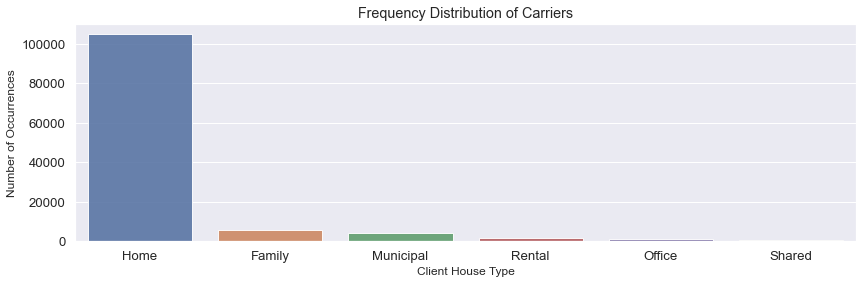

Home         104870
Family         5783
Municipal      4248
Rental         1816
Office         1002
Shared          450
Name: Client_Housing_Type, dtype: int64

In [31]:
Client_Housing_Type_Count = VechLoan_Train_W['Client_Housing_Type'].value_counts()
sns.set(style="darkgrid",font_scale=1.2)
plt.figure(figsize=(14, 4))
sns.barplot(Client_Housing_Type_Count.index, Client_Housing_Type_Count.values, alpha=0.9)
plt.title('Frequency Distribution of Carriers')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Client House Type', fontsize=12)
plt.show()
Client_Housing_Type_Count

In [32]:
#Assigning values based for "Client_Housing_Type" based on it frequency order
replace_map6 = {'Client_Housing_Type': {'Home': 1, 'Family': 2, 'Municipal': 3,'Rental':4,'Office':5,'Shared':6}}
VechLoan_Train_W['Client_Housing_Type'].astype('category')
print(replace_map6)
VechLoan_Train_W.replace(replace_map6, inplace=True)
VechLoan_Test_W.replace(replace_map6, inplace=True)

{'Client_Housing_Type': {'Home': 1, 'Family': 2, 'Municipal': 3, 'Rental': 4, 'Office': 5, 'Shared': 6}}


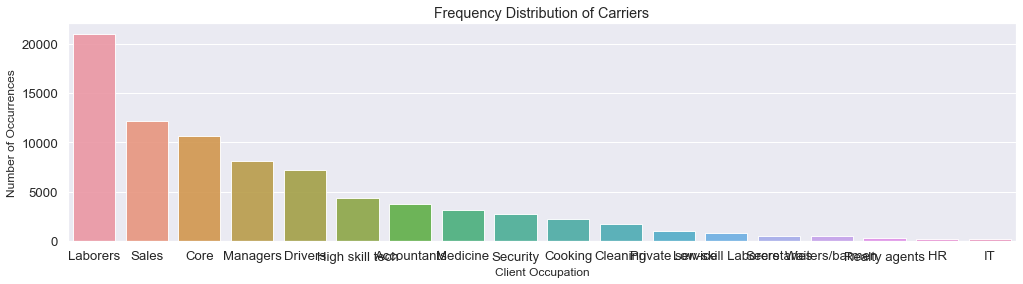

Laborers              21024
Sales                 12136
Core                  10611
Managers               8099
Drivers                7150
High skill tech        4317
Accountants            3766
Medicine               3172
Security               2683
Cooking                2224
Cleaning               1722
Private service        1006
Low-skill Laborers      787
Secretaries             531
Waiters/barmen          511
Realty agents           280
HR                      206
IT                      196
Name: Client_Occupation, dtype: int64

In [33]:
Client_Occupation_Count = VechLoan_Train_W['Client_Occupation'].value_counts()
sns.set(style="darkgrid",font_scale=1.2)
plt.figure(figsize=(17, 4))
sns.barplot(Client_Occupation_Count.index, Client_Occupation_Count.values, alpha=0.9)
plt.title('Frequency Distribution of Carriers')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Client Occupation', fontsize=12)
plt.show()
Client_Occupation_Count

In [34]:
#Assigning values based for "Client_Housing_Type" based on it frequency order
replace_map7 = {'Client_Occupation': {'Laborers': 1, 'Sales': 2, 'Core': 3,'Managers':4,'Drivers':5,'High skill tech':6,
                                     'Accountants':6,'Medicine':6,'Security':6,'Cooking':6,'Cleaning':6,'Private service':7,
                                     'Low-skill Laborers':6,'Secretaries':6,'Waiters/barmen':6,'Realty agents':6,
                                     'HR':6,'IT':6}}
VechLoan_Train_W['Client_Occupation'].astype('category')
print(replace_map7)
VechLoan_Train_W.replace(replace_map7, inplace=True)
VechLoan_Test_W.replace(replace_map7, inplace=True)

{'Client_Occupation': {'Laborers': 1, 'Sales': 2, 'Core': 3, 'Managers': 4, 'Drivers': 5, 'High skill tech': 6, 'Accountants': 6, 'Medicine': 6, 'Security': 6, 'Cooking': 6, 'Cleaning': 6, 'Private service': 7, 'Low-skill Laborers': 6, 'Secretaries': 6, 'Waiters/barmen': 6, 'Realty agents': 6, 'HR': 6, 'IT': 6}}


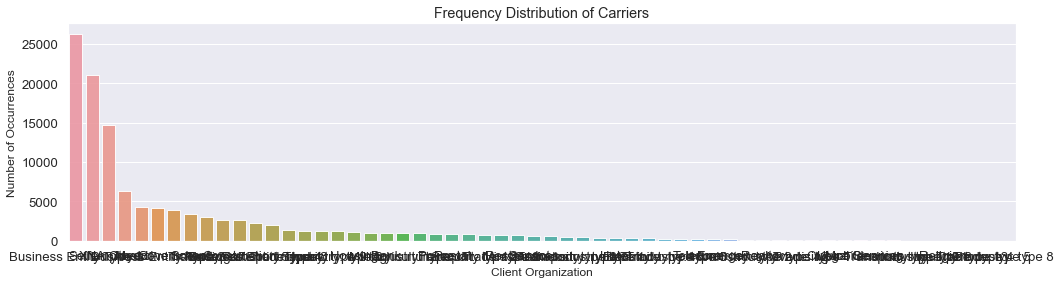

Business Entity Type 3    26279
XNA                       21085
Selfemployed              14725
Other                      6290
Medicine                   4320
Business Entity Type 2     4126
Government                 3971
School                     3371
Trade: type 7              2979
Kindergarten               2686
Construction               2623
Business Entity Type 1     2313
Transport: type 4          2076
Trade: type 3              1338
Security                   1284
Industry: type 9           1280
Industry: type 3           1235
Housing                    1162
Military                   1031
Bank                       1012
Agriculture                1011
Industry: type 11           999
Police                      934
Postal                      834
Transport: type 2           811
Security Ministries         756
Trade: type 2               717
Restaurant                  710
Services                    570
University                  559
Transport: type 3           501
Industry

In [35]:
Type_Organization_Count = VechLoan_Train_W['Type_Organization'].value_counts()
sns.set(style="darkgrid",font_scale=1.2)
plt.figure(figsize=(17, 4))
sns.barplot(Type_Organization_Count.index, Type_Organization_Count.values, alpha=0.9)
plt.title('Frequency Distribution of Carriers')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Client Organization', fontsize=12)
plt.show()
Type_Organization_Count

In [36]:
#Assigning values based for "Type_Organization" based on Label Encoding (change category type)
VechLoan_Train_W['Type_Organization'] = VechLoan_Train_W['Type_Organization'].astype('category')
VechLoan_Train_W['Type_Organization'] = VechLoan_Train_W['Type_Organization'].cat.codes

VechLoan_Test_W['Type_Organization'] = VechLoan_Test_W['Type_Organization'].astype('category')
VechLoan_Test_W['Type_Organization'] = VechLoan_Test_W['Type_Organization'].cat.codes

In [37]:
#Label encoding - assigning values for Yes/No
VechLoan_Train_W["Client_Permanent_Match_Tag"] = np.where(VechLoan_Train_W["Client_Permanent_Match_Tag"].str.contains("Yes"), 1, 0)
VechLoan_Train_W["Client_Contact_Work_Tag"] = np.where(VechLoan_Train_W["Client_Contact_Work_Tag"].str.contains("Yes"), 1, 0)
VechLoan_Train_W["Loan_Contract_Type"] = np.where(VechLoan_Train_W["Loan_Contract_Type"].str.contains("CL"), 1, 0)

VechLoan_Test_W["Client_Permanent_Match_Tag"] = np.where(VechLoan_Test_W["Client_Permanent_Match_Tag"].str.contains("Yes"), 1, 0)
VechLoan_Test_W["Client_Contact_Work_Tag"] = np.where(VechLoan_Test_W["Client_Contact_Work_Tag"].str.contains("Yes"), 1, 0)
VechLoan_Test_W["Loan_Contract_Type"] = np.where(VechLoan_Test_W["Loan_Contract_Type"].str.contains("CL"), 1, 0)

In [38]:
VechLoan_Train_W.head()

Client_Income  Car_Owned  Bike_Owned  Active_Loan  House_Own  Child_Count  \
0          6750        0.0         0.0          1.0        0.0          0.0   
1         20250        1.0         0.0          1.0        NaN          0.0   
2         18000        0.0         0.0          1.0        0.0          1.0   
3         15750        0.0         0.0          1.0        1.0          0.0   
4         33750        1.0         0.0          1.0        0.0          2.0   

  Credit_Amount Loan_Annuity  Accompany_Client  Client_Income_Type  \
0      61190.55      3416.85               1.0                 2.0   
1         15282      1826.55               1.0                 1.0   
2      59527.35       2788.2               1.0                 1.0   
3       53870.4      2295.45               1.0                 3.0   
4      133988.4      3547.35               1.0                 2.0   

   Client_Education  Client_Marital_Status  Client_Gender  Loan_Contract_Type  \
0               1.0                    1.0            1.0                   1   
1               2.0                    1.0            1.0                   1   
2               3.0                    4.0            1.0                   1   
3               1.0                    1.0            1.0                   1   
4               1.0                    1.0            2.0                   1   

   Client_Housing_Type  Age_Days_Y  ID_Days_Y  Own_House_Age  Mobile_Tag  \
0                  1.0       38.24       1.05            NaN           1   
1                  1.0       38.80       0.06            0.0           1   
2                  2.0       46.00       0.91            NaN           1   
3                  1.0       63.55       2.12            NaN           1   
4                  1.0       31.14      11.08            6.0           1   

   Homephone_Tag  Workphone_Working  Client_Occupation  Client_Family_Members  \
0              1                  0                2.0                    2.0   
1              0                  1                NaN                    2.0   
2              0                  0                6.0                    2.0   
3              0                  0                NaN                    2.0   
4              0                  0                1.0                    4.0   

   Cleint_City_Rating  Client_Permanent_Match_Tag  Client_Contact_Work_Tag  \
0                 2.0                           1                        1   
1                 2.0                           1                        1   
2                 2.0                           1                        1   
3                 3.0                           1                        1   
4                 1.0                           1                        1   

   Type_Organization  Social_Circle_Default  Credit_Bureau  Default  
0                 42                 0.0186            NaN        0  
1                 11                    NaN            NaN        0  
2                 42                 0.0742            0.0        0  
3                 57                    NaN            3.0        0  
4                  5                 0.2021            1.0        0

In [39]:
VechLoan_Test_W.head()

Client_Income  Car_Owned  Bike_Owned  Active_Loan  House_Own  Child_Count  \
0         11250        0.0         1.0          1.0        1.0          0.0   
1         13500        1.0         1.0          1.0        1.0          3.0   
2         38250        0.0         1.0          0.0        1.0          0.0   
3         20250        0.0         0.0          1.0        0.0          0.0   
4         13500        1.0         1.0          0.0        1.0          0.0   

  Credit_Amount Loan_Annuity  Accompany_Client  Client_Income_Type  \
0        112500          NaN               2.0                 1.0   
1         49752          NaN               1.0                 1.0   
2         67500          NaN               1.0                 2.0   
3      50849.55          NaN               1.0                 4.0   
4       43603.2          NaN               1.0                 1.0   

   Client_Education  Client_Marital_Status  Client_Gender  Loan_Contract_Type  \
0               NaN                    1.0            1.0                   1   
1               1.0                    1.0            2.0                   1   
2               2.0                    1.0            2.0                   0   
3               1.0                    2.0            1.0                   1   
4               1.0                    1.0            2.0                   1   

   Client_Housing_Type  Age_Days_Y  ID_Days_Y  Own_House_Age  Mobile_Tag  \
0                  1.0       54.97       9.09            NaN           1   
1                  1.0       36.16      10.59            6.0           1   
2                  1.0       43.68       6.29            NaN           1   
3                  NaN       42.83      16.77            NaN           1   
4                  1.0       43.32       9.91            7.0           1   

   Homephone_Tag  Workphone_Working  Client_Occupation  Client_Family_Members  \
0              0                  0                NaN                    NaN   
1              1                  0                1.0                    5.0   
2              0                  1                4.0                    2.0   
3              1                  1                NaN                    1.0   
4              0                  0                4.0                    2.0   

   Cleint_City_Rating  Client_Permanent_Match_Tag  Client_Contact_Work_Tag  \
0                 2.0                           1                        1   
1                 3.0                           0                        1   
2                 1.0                           1                        1   
3                 2.0                           0                        0   
4                 2.0                           1                        1   

   Type_Organization  Social_Circle_Default  Credit_Bureau  
0                 42                 0.0515            2.0  
1                 42                    NaN            NaN  
2                  5                 0.1503            NaN  
3                 30                    NaN            4.0  
4                 42                    NaN            1.0

In [40]:
VechLoan_Train_W.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 30 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Client_Income               102351 non-null  object 
 1   Car_Owned                   118275 non-null  float64
 2   Bike_Owned                  118232 non-null  float64
 3   Active_Loan                 118221 non-null  float64
 4   House_Own                   118195 non-null  float64
 5   Child_Count                 118218 non-null  float64
 6   Credit_Amount               38723 non-null   object 
 7   Loan_Annuity                94372 non-null   object 
 8   Accompany_Client            120098 non-null  float64
 9   Client_Income_Type          118155 non-null  float64
 10  Client_Education            118211 non-null  float64
 11  Client_Marital_Status       118383 non-null  float64
 12  Client_Gender               119443 non-null  float64
 13  Loan_Contract_

# Variable transformation

In [41]:
# Variable transformation
VechLoan_Train_W['Client_Income'] = pd.to_numeric(VechLoan_Train_W['Client_Income'], errors='coerce')
VechLoan_Train_W['Car_Owned'] = VechLoan_Train_W.Car_Owned.astype('category')
VechLoan_Train_W['Bike_Owned'] = VechLoan_Train_W.Bike_Owned.astype('category')
VechLoan_Train_W['Active_Loan'] = VechLoan_Train_W.Active_Loan.astype('category')
VechLoan_Train_W['House_Own'] = VechLoan_Train_W.House_Own.astype('category')
VechLoan_Train_W['Credit_Amount'] = pd.to_numeric(VechLoan_Train_W['Credit_Amount'], errors='coerce')
VechLoan_Train_W['Loan_Annuity'] = pd.to_numeric(VechLoan_Train_W['Loan_Annuity'], errors='coerce')
VechLoan_Train_W['Accompany_Client'] = VechLoan_Train_W.Accompany_Client.astype('category')
VechLoan_Train_W['Client_Income_Type'] = VechLoan_Train_W.Client_Income_Type.astype('category')
VechLoan_Train_W['Client_Education'] = VechLoan_Train_W.Client_Education.astype('category')
VechLoan_Train_W['Client_Marital_Status'] = VechLoan_Train_W.Client_Marital_Status.astype('category')
VechLoan_Train_W['Client_Gender'] = VechLoan_Train_W.Client_Gender.astype('category')
VechLoan_Train_W['Loan_Contract_Type'] = VechLoan_Train_W.Loan_Contract_Type.astype('category')
VechLoan_Train_W['Client_Housing_Type'] = VechLoan_Train_W.Client_Housing_Type.astype('category')
VechLoan_Train_W['Mobile_Tag'] = VechLoan_Train_W.Mobile_Tag.astype('category')
VechLoan_Train_W['Homephone_Tag'] = VechLoan_Train_W.Homephone_Tag.astype('category')
VechLoan_Train_W['Workphone_Working'] = VechLoan_Train_W.Workphone_Working.astype('category')
VechLoan_Train_W['Client_Occupation'] = VechLoan_Train_W.Client_Occupation.astype('category')
VechLoan_Train_W['Cleint_City_Rating'] = VechLoan_Train_W.Cleint_City_Rating.astype('category')
VechLoan_Train_W['Client_Permanent_Match_Tag'] = VechLoan_Train_W.Client_Permanent_Match_Tag.astype('category')
VechLoan_Train_W['Client_Contact_Work_Tag'] = VechLoan_Train_W.Client_Contact_Work_Tag.astype('category')
VechLoan_Train_W['Type_Organization'] = VechLoan_Train_W.Type_Organization.astype('category')
VechLoan_Train_W['Default'] = VechLoan_Train_W.Default.astype('category')

In [42]:
# Variable transformation
VechLoan_Test_W['Client_Income'] = pd.to_numeric(VechLoan_Test_W['Client_Income'], errors='coerce')
VechLoan_Test_W['Car_Owned'] = VechLoan_Test_W.Car_Owned.astype('category')
VechLoan_Test_W['Bike_Owned'] = VechLoan_Test_W.Bike_Owned.astype('category')
VechLoan_Test_W['Active_Loan'] = VechLoan_Test_W.Active_Loan.astype('category')
VechLoan_Test_W['House_Own'] = VechLoan_Test_W.House_Own.astype('category')
VechLoan_Test_W['Credit_Amount'] = pd.to_numeric(VechLoan_Test_W['Credit_Amount'], errors='coerce')
VechLoan_Test_W['Loan_Annuity'] = pd.to_numeric(VechLoan_Test_W['Loan_Annuity'], errors='coerce')
VechLoan_Test_W['Accompany_Client'] = VechLoan_Test_W.Accompany_Client.astype('category')
VechLoan_Test_W['Client_Income_Type'] = VechLoan_Test_W.Client_Income_Type.astype('category')
VechLoan_Test_W['Client_Education'] = VechLoan_Test_W.Client_Education.astype('category')
VechLoan_Test_W['Client_Marital_Status'] = VechLoan_Test_W.Client_Marital_Status.astype('category')
VechLoan_Test_W['Client_Gender'] = VechLoan_Test_W.Client_Gender.astype('category')
VechLoan_Test_W['Loan_Contract_Type'] = VechLoan_Test_W.Loan_Contract_Type.astype('category')
VechLoan_Test_W['Client_Housing_Type'] = VechLoan_Test_W.Client_Housing_Type.astype('category')
VechLoan_Test_W['Mobile_Tag'] = VechLoan_Test_W.Mobile_Tag.astype('category')
VechLoan_Test_W['Homephone_Tag'] = VechLoan_Test_W.Homephone_Tag.astype('category')
VechLoan_Test_W['Workphone_Working'] = VechLoan_Test_W.Workphone_Working.astype('category')
VechLoan_Test_W['Client_Occupation'] = VechLoan_Test_W.Client_Occupation.astype('category')
VechLoan_Test_W['Cleint_City_Rating'] = VechLoan_Test_W.Cleint_City_Rating.astype('category')
VechLoan_Test_W['Client_Permanent_Match_Tag'] = VechLoan_Test_W.Client_Permanent_Match_Tag.astype('category')
VechLoan_Test_W['Client_Contact_Work_Tag'] = VechLoan_Test_W.Client_Contact_Work_Tag.astype('category')
VechLoan_Test_W['Type_Organization'] = VechLoan_Test_W.Type_Organization.astype('category')

# Split the dataFrames - Numberic and Categorical

In [43]:
# DataFrame having only Numeric values
VechLoan_Train_W_Num=VechLoan_Train_W.select_dtypes(exclude=['category'])
VechLoan_Train_W_Num

Client_Income  Child_Count  Credit_Amount  Loan_Annuity  Age_Days_Y  \
0              6750.0          0.0       61190.55       3416.85       38.24   
1             20250.0          0.0       15282.00       1826.55       38.80   
2             18000.0          1.0       59527.35       2788.20       46.00   
3             15750.0          0.0       53870.40       2295.45       63.55   
4             33750.0          2.0      133988.40       3547.35       31.14   
...               ...          ...            ...           ...         ...   
121851        29250.0          0.0      107820.00           NaN       35.31   
121852        15750.0          0.0      104256.00           NaN       23.69   
121853         8100.0          1.0       55107.90           NaN       25.07   
121854        38250.0          0.0       45000.00           NaN       28.19   
121855         9000.0          1.0       62428.95           NaN       40.47   

        ID_Days_Y  Own_House_Age  Client_Family_Members  \
0            1.05            NaN                    2.0   
1            0.06            0.0                    2.0   
2            0.91            NaN                    2.0   
3            2.12            NaN                    2.0   
4           11.08            6.0                    4.0   
...           ...            ...                    ...   
121851       8.06            NaN                    2.0   
121852       3.31            NaN                    2.0   
121853       0.97            NaN                    3.0   
121854       7.95            4.0                    2.0   
121855      13.77            6.0                    2.0   

        Social_Circle_Default  Credit_Bureau  
0                      0.0186            NaN  
1                         NaN            NaN  
2                      0.0742            0.0  
3                         NaN            3.0  
4                      0.2021            1.0  
...                       ...            ...  
121851                 0.0577            1.0  
121852                 0.0825            0.0  
121853                    NaN            NaN  
121854                 0.0979            2.0  
121855                 0.1031            0.0  

[121856 rows x 10 columns]

In [44]:
VechLoan_Test_W_Num=VechLoan_Test_W.select_dtypes(exclude=['category'])
VechLoan_Test_W_Num

Client_Income  Child_Count  Credit_Amount  Loan_Annuity  Age_Days_Y  \
0            11250.0          0.0      112500.00           NaN       54.97   
1            13500.0          3.0       49752.00           NaN       36.16   
2            38250.0          0.0       67500.00           NaN       43.68   
3            20250.0          0.0       50849.55           NaN       42.83   
4            13500.0          0.0       43603.20           NaN       43.32   
...              ...          ...            ...           ...         ...   
80895        11700.0          2.0      107820.00       3152.25       37.99   
80896        29250.0          2.0      116430.75       4630.50       38.41   
80897        54000.0          0.0       52128.00       2742.30       27.27   
80898        13500.0          0.0       25470.00       1435.05       58.81   
80899        10350.0          1.0       26955.00       1475.10       27.89   

       ID_Days_Y  Own_House_Age  Client_Family_Members  Social_Circle_Default  \
0           9.09            NaN                    NaN                 0.0515   
1          10.59            6.0                    5.0                    NaN   
2           6.29            NaN                    2.0                 0.1503   
3          16.77            NaN                    1.0                    NaN   
4           9.91            7.0                    2.0                    NaN   
...          ...            ...                    ...                    ...   
80895       8.98            NaN                    4.0                    NaN   
80896      14.30            NaN                    4.0                 0.1072   
80897       1.98           19.0                    2.0                    NaN   
80898       7.22            NaN                    2.0                 0.1392   
80899       5.91           14.0                    3.0                 0.1206   

       Credit_Bureau  
0                2.0  
1                NaN  
2                NaN  
3                4.0  
4                1.0  
...              ...  
80895            1.0  
80896            0.0  
80897            0.0  
80898            2.0  
80899            1.0  

[80900 rows x 10 columns]

In [45]:
# DataFrame having only Category values
VechLoan_Train_W_Category=VechLoan_Train_W.select_dtypes(include=['category'])
VechLoan_Train_W_Category

Car_Owned Bike_Owned Active_Loan House_Own Accompany_Client  \
0            0.0        0.0         1.0       0.0              1.0   
1            1.0        0.0         1.0       NaN              1.0   
2            0.0        0.0         1.0       0.0              1.0   
3            0.0        0.0         1.0       1.0              1.0   
4            1.0        0.0         1.0       0.0              1.0   
...          ...        ...         ...       ...              ...   
121851       0.0        0.0         NaN       1.0              2.0   
121852       0.0        1.0         1.0       0.0              1.0   
121853       0.0        1.0         0.0       1.0              1.0   
121854       1.0        1.0         0.0       1.0              1.0   
121855       1.0        1.0         1.0       1.0              1.0   

       Client_Income_Type Client_Education Client_Marital_Status  \
0                     2.0              1.0                   1.0   
1                     1.0              2.0                   1.0   
2                     1.0              3.0                   4.0   
3                     3.0              1.0                   1.0   
4                     2.0              1.0                   1.0   
...                   ...              ...                   ...   
121851                1.0              1.0                   1.0   
121852                2.0              2.0                   1.0   
121853                4.0              1.0                   1.0   
121854                1.0              2.0                   1.0   
121855                2.0              1.0                   2.0   

       Client_Gender Loan_Contract_Type Client_Housing_Type Mobile_Tag  \
0                1.0                  1                 1.0          1   
1                1.0                  1                 1.0          1   
2                1.0                  1                 2.0          1   
3                1.0                  1                 1.0          1   
4                2.0                  1                 1.0          1   
...              ...                ...                 ...        ...   
121851           2.0                  1                 1.0          1   
121852           2.0                  1                 1.0          1   
121853           1.0                  1                 1.0          1   
121854           2.0                  1                 1.0          1   
121855           1.0                  1                 1.0          1   

       Homephone_Tag Workphone_Working Client_Occupation Cleint_City_Rating  \
0                  1                 0               2.0                2.0   
1                  0                 1               NaN                2.0   
2                  0                 0               6.0                2.0   
3                  0                 0               NaN                3.0   
4                  0                 0               1.0                1.0   
...              ...               ...               ...                ...   
121851             0                 0               1.0                2.0   
121852             1                 0               2.0                3.0   
121853             0                 0               6.0                3.0   
121854             0                 0               2.0                2.0   
121855             0                 0               4.0                3.0   

       Client_Permanent_Match_Tag Client_Contact_Work_Tag Type_Organization  \
0                               1                       1                42   
1                               1                       1                11   
2                               1                       1                42   
3                               1                       1                57   
4                               1                       1                 5   
...                           ...    

In [46]:
# DataFrame having only Category values
VechLoan_Test_W_Category=VechLoan_Test_W.select_dtypes(include=['category'])
VechLoan_Test_W_Category

Car_Owned Bike_Owned Active_Loan House_Own Accompany_Client  \
0           0.0        1.0         1.0       1.0              2.0   
1           1.0        1.0         1.0       1.0              1.0   
2           0.0        1.0         0.0       1.0              1.0   
3           0.0        0.0         1.0       0.0              1.0   
4           1.0        1.0         0.0       1.0              1.0   
...         ...        ...         ...       ...              ...   
80895       0.0        0.0         0.0       1.0              1.0   
80896       0.0        1.0         1.0       1.0              1.0   
80897       1.0        0.0         1.0       1.0              1.0   
80898       0.0        0.0         1.0       0.0              1.0   
80899       1.0        0.0         0.0       0.0              1.0   

      Client_Income_Type Client_Education Client_Marital_Status Client_Gender  \
0                    1.0              NaN                   1.0           1.0   
1                    1.0              1.0                   1.0           2.0   
2                    2.0              2.0                   1.0           2.0   
3                    4.0              1.0                   2.0           1.0   
4                    1.0              1.0                   1.0           2.0   
...                  ...              ...                   ...           ...   
80895                NaN              1.0                   1.0           1.0   
80896                4.0              2.0                   1.0           1.0   
80897                1.0              1.0                   1.0           2.0   
80898                1.0              2.0                   1.0           2.0   
80899                NaN              2.0                   1.0           2.0   

      Loan_Contract_Type Client_Housing_Type Mobile_Tag Homephone_Tag  \
0                      1                 1.0          1             0   
1                      1                 1.0          1             1   
2                      0                 1.0          1             0   
3                      1                 NaN          1             1   
4                      1                 1.0          1             0   
...                  ...                 ...        ...           ...   
80895                  1                 1.0          1             1   
80896                  1                 1.0          1             0   
80897                  1                 1.0          1             0   
80898                  1                 NaN          1             0   
80899                  1                 1.0          1             0   

      Workphone_Working Client_Occupation Cleint_City_Rating  \
0                     0               NaN                2.0   
1                     0               1.0                3.0   
2                     1               4.0                1.0   
3                     1               NaN                2.0   
4                     0               4.0                2.0   
...                 ...               ...                ...   
80895                 1               3.0                2.0   
80896                 1               3.0                1.0   
80897                 0               1.0                2.0   
80898                 0               1.0                2.0   
80899                 1               1.0                3.0   

      Client_Permanent_Match_Tag Client_Contact_Work_Tag Type_Organization  
0                              1                       1                42  
1                              0                       1                42  
2                              1                       1                 5  
3                              0                       0                30  
4                              1                       1                42  
...                          ...                     ...               ...  
80895              

# Missing value imputation

In [47]:
# Imputing Categorical variables
VechLoan_Train_W_Category = VechLoan_Train_W_Category.apply(lambda x: x.fillna(x.value_counts().index[0]))
VechLoan_Train_W_Category

Car_Owned Bike_Owned Active_Loan House_Own Accompany_Client  \
0            0.0        0.0         1.0       0.0              1.0   
1            1.0        0.0         1.0       1.0              1.0   
2            0.0        0.0         1.0       0.0              1.0   
3            0.0        0.0         1.0       1.0              1.0   
4            1.0        0.0         1.0       0.0              1.0   
...          ...        ...         ...       ...              ...   
121851       0.0        0.0         0.0       1.0              2.0   
121852       0.0        1.0         1.0       0.0              1.0   
121853       0.0        1.0         0.0       1.0              1.0   
121854       1.0        1.0         0.0       1.0              1.0   
121855       1.0        1.0         1.0       1.0              1.0   

       Client_Income_Type Client_Education Client_Marital_Status  \
0                     2.0              1.0                   1.0   
1                     1.0              2.0                   1.0   
2                     1.0              3.0                   4.0   
3                     3.0              1.0                   1.0   
4                     2.0              1.0                   1.0   
...                   ...              ...                   ...   
121851                1.0              1.0                   1.0   
121852                2.0              2.0                   1.0   
121853                4.0              1.0                   1.0   
121854                1.0              2.0                   1.0   
121855                2.0              1.0                   2.0   

       Client_Gender Loan_Contract_Type Client_Housing_Type Mobile_Tag  \
0                1.0                  1                 1.0          1   
1                1.0                  1                 1.0          1   
2                1.0                  1                 2.0          1   
3                1.0                  1                 1.0          1   
4                2.0                  1                 1.0          1   
...              ...                ...                 ...        ...   
121851           2.0                  1                 1.0          1   
121852           2.0                  1                 1.0          1   
121853           1.0                  1                 1.0          1   
121854           2.0                  1                 1.0          1   
121855           1.0                  1                 1.0          1   

       Homephone_Tag Workphone_Working Client_Occupation Cleint_City_Rating  \
0                  1                 0               2.0                2.0   
1                  0                 1               1.0                2.0   
2                  0                 0               6.0                2.0   
3                  0                 0               1.0                3.0   
4                  0                 0               1.0                1.0   
...              ...               ...               ...                ...   
121851             0                 0               1.0                2.0   
121852             1                 0               2.0                3.0   
121853             0                 0               6.0                3.0   
121854             0                 0               2.0                2.0   
121855             0                 0               4.0                3.0   

       Client_Permanent_Match_Tag Client_Contact_Work_Tag Type_Organization  \
0                               1                       1                42   
1                               1                       1                11   
2                               1                       1                42   
3                               1                       1                57   
4                               1                       1                 5   
...                           ...    

In [48]:
VechLoan_Test_W_Category = VechLoan_Test_W_Category.apply(lambda x: x.fillna(x.value_counts().index[0]))
# replace by most frequent feature (most common class)
VechLoan_Test_W_Category

Car_Owned Bike_Owned Active_Loan House_Own Accompany_Client  \
0           0.0        1.0         1.0       1.0              2.0   
1           1.0        1.0         1.0       1.0              1.0   
2           0.0        1.0         0.0       1.0              1.0   
3           0.0        0.0         1.0       0.0              1.0   
4           1.0        1.0         0.0       1.0              1.0   
...         ...        ...         ...       ...              ...   
80895       0.0        0.0         0.0       1.0              1.0   
80896       0.0        1.0         1.0       1.0              1.0   
80897       1.0        0.0         1.0       1.0              1.0   
80898       0.0        0.0         1.0       0.0              1.0   
80899       1.0        0.0         0.0       0.0              1.0   

      Client_Income_Type Client_Education Client_Marital_Status Client_Gender  \
0                    1.0              1.0                   1.0           1.0   
1                    1.0              1.0                   1.0           2.0   
2                    2.0              2.0                   1.0           2.0   
3                    4.0              1.0                   2.0           1.0   
4                    1.0              1.0                   1.0           2.0   
...                  ...              ...                   ...           ...   
80895                1.0              1.0                   1.0           1.0   
80896                4.0              2.0                   1.0           1.0   
80897                1.0              1.0                   1.0           2.0   
80898                1.0              2.0                   1.0           2.0   
80899                1.0              2.0                   1.0           2.0   

      Loan_Contract_Type Client_Housing_Type Mobile_Tag Homephone_Tag  \
0                      1                 1.0          1             0   
1                      1                 1.0          1             1   
2                      0                 1.0          1             0   
3                      1                 1.0          1             1   
4                      1                 1.0          1             0   
...                  ...                 ...        ...           ...   
80895                  1                 1.0          1             1   
80896                  1                 1.0          1             0   
80897                  1                 1.0          1             0   
80898                  1                 1.0          1             0   
80899                  1                 1.0          1             0   

      Workphone_Working Client_Occupation Cleint_City_Rating  \
0                     0               1.0                2.0   
1                     0               1.0                3.0   
2                     1               4.0                1.0   
3                     1               1.0                2.0   
4                     0               4.0                2.0   
...                 ...               ...                ...   
80895                 1               3.0                2.0   
80896                 1               3.0                1.0   
80897                 0               1.0                2.0   
80898                 0               1.0                2.0   
80899                 1               1.0                3.0   

      Client_Permanent_Match_Tag Client_Contact_Work_Tag Type_Organization  
0                              1                       1                42  
1                              0                       1                42  
2                              1                       1                 5  
3                              0                       0                30  
4                              1                       1                42  
...                          ...                     ...               ...  
80895              

In [49]:
# Imputing Numrical variables
VechLoan_Train_W_Num = VechLoan_Train_W_Num.fillna(VechLoan_Train_W_Num.median())
VechLoan_Train_W_Num

Client_Income  Child_Count  Credit_Amount  Loan_Annuity  Age_Days_Y  \
0              6750.0          0.0       61190.55       3416.85       38.24   
1             20250.0          0.0       15282.00       1826.55       38.80   
2             18000.0          1.0       59527.35       2788.20       46.00   
3             15750.0          0.0       53870.40       2295.45       63.55   
4             33750.0          2.0      133988.40       3547.35       31.14   
...               ...          ...            ...           ...         ...   
121851        29250.0          0.0      107820.00       2499.75       35.31   
121852        15750.0          0.0      104256.00       2499.75       23.69   
121853         8100.0          1.0       55107.90       2499.75       25.07   
121854        38250.0          0.0       45000.00       2499.75       28.19   
121855         9000.0          1.0       62428.95       2499.75       40.47   

        ID_Days_Y  Own_House_Age  Client_Family_Members  \
0            1.05            9.0                    2.0   
1            0.06            0.0                    2.0   
2            0.91            9.0                    2.0   
3            2.12            9.0                    2.0   
4           11.08            6.0                    4.0   
...           ...            ...                    ...   
121851       8.06            9.0                    2.0   
121852       3.31            9.0                    2.0   
121853       0.97            9.0                    3.0   
121854       7.95            4.0                    2.0   
121855      13.77            6.0                    2.0   

        Social_Circle_Default  Credit_Bureau  
0                      0.0186            1.0  
1                      0.0887            1.0  
2                      0.0742            0.0  
3                      0.0887            3.0  
4                      0.2021            1.0  
...                       ...            ...  
121851                 0.0577            1.0  
121852                 0.0825            0.0  
121853                 0.0887            1.0  
121854                 0.0979            2.0  
121855                 0.1031            0.0  

[121856 rows x 10 columns]

In [50]:
VechLoan_Test_W_Num = VechLoan_Test_W_Num.fillna(VechLoan_Train_W_Num.median())
VechLoan_Test_W_Num

Client_Income  Child_Count  Credit_Amount  Loan_Annuity  Age_Days_Y  \
0            11250.0          0.0      112500.00       2499.75       54.97   
1            13500.0          3.0       49752.00       2499.75       36.16   
2            38250.0          0.0       67500.00       2499.75       43.68   
3            20250.0          0.0       50849.55       2499.75       42.83   
4            13500.0          0.0       43603.20       2499.75       43.32   
...              ...          ...            ...           ...         ...   
80895        11700.0          2.0      107820.00       3152.25       37.99   
80896        29250.0          2.0      116430.75       4630.50       38.41   
80897        54000.0          0.0       52128.00       2742.30       27.27   
80898        13500.0          0.0       25470.00       1435.05       58.81   
80899        10350.0          1.0       26955.00       1475.10       27.89   

       ID_Days_Y  Own_House_Age  Client_Family_Members  Social_Circle_Default  \
0           9.09            9.0                    2.0                 0.0515   
1          10.59            6.0                    5.0                 0.0887   
2           6.29            9.0                    2.0                 0.1503   
3          16.77            9.0                    1.0                 0.0887   
4           9.91            7.0                    2.0                 0.0887   
...          ...            ...                    ...                    ...   
80895       8.98            9.0                    4.0                 0.0887   
80896      14.30            9.0                    4.0                 0.1072   
80897       1.98           19.0                    2.0                 0.0887   
80898       7.22            9.0                    2.0                 0.1392   
80899       5.91           14.0                    3.0                 0.1206   

       Credit_Bureau  
0                2.0  
1                1.0  
2                1.0  
3                4.0  
4                1.0  
...              ...  
80895            1.0  
80896            0.0  
80897            0.0  
80898            2.0  
80899            1.0  

[80900 rows x 10 columns]

In [51]:
# combine numberic and categorical dataframes
VechLoan_Train_W = pd.concat([VechLoan_Train_W_Num,VechLoan_Train_W_Category],axis=1, join='inner')
VechLoan_Train_W

Client_Income  Child_Count  Credit_Amount  Loan_Annuity  Age_Days_Y  \
0              6750.0          0.0       61190.55       3416.85       38.24   
1             20250.0          0.0       15282.00       1826.55       38.80   
2             18000.0          1.0       59527.35       2788.20       46.00   
3             15750.0          0.0       53870.40       2295.45       63.55   
4             33750.0          2.0      133988.40       3547.35       31.14   
...               ...          ...            ...           ...         ...   
121851        29250.0          0.0      107820.00       2499.75       35.31   
121852        15750.0          0.0      104256.00       2499.75       23.69   
121853         8100.0          1.0       55107.90       2499.75       25.07   
121854        38250.0          0.0       45000.00       2499.75       28.19   
121855         9000.0          1.0       62428.95       2499.75       40.47   

        ID_Days_Y  Own_House_Age  Client_Family_Members  \
0            1.05            9.0                    2.0   
1            0.06            0.0                    2.0   
2            0.91            9.0                    2.0   
3            2.12            9.0                    2.0   
4           11.08            6.0                    4.0   
...           ...            ...                    ...   
121851       8.06            9.0                    2.0   
121852       3.31            9.0                    2.0   
121853       0.97            9.0                    3.0   
121854       7.95            4.0                    2.0   
121855      13.77            6.0                    2.0   

        Social_Circle_Default  Credit_Bureau Car_Owned Bike_Owned Active_Loan  \
0                      0.0186            1.0       0.0        0.0         1.0   
1                      0.0887            1.0       1.0        0.0         1.0   
2                      0.0742            0.0       0.0        0.0         1.0   
3                      0.0887            3.0       0.0        0.0         1.0   
4                      0.2021            1.0       1.0        0.0         1.0   
...                       ...            ...       ...        ...         ...   
121851                 0.0577            1.0       0.0        0.0         0.0   
121852                 0.0825            0.0       0.0        1.0         1.0   
121853                 0.0887            1.0       0.0        1.0         0.0   
121854                 0.0979            2.0       1.0        1.0         0.0   
121855                 0.1031            0.0       1.0        1.0         1.0   

       House_Own Accompany_Client Client_Income_Type Client_Education  \
0            0.0              1.0                2.0              1.0   
1            1.0              1.0                1.0              2.0   
2            0.0              1.0                1.0              3.0   
3            1.0              1.0                3.0              1.0   
4            0.0              1.0                2.0              1.0   
...          ...              ...                ...              ...   
121851       1.0              2.0                1.0              1.0   
121852       0.0              1.0                2.0              2.0   
121853       1.0              1.0                4.0              1.0   
121854       1.0              1.0                1.0              2.0   
121855       1.0              1.0                2.0              1.0   

       Client_Marital_Status Client_Gender Loan_Contract_Type  \
0                        1.0           1.0                  1   
1                        1.0           1.0                  1   
2                        4.0           1.0                  1   
3                        1.0           1.0                  1   
4                        1.0           2.0                  1   
...                      ...           ...                ...   
121851                   1.0           2.0   

In [52]:
VechLoan_Test_W = pd.concat([VechLoan_Test_W_Num,VechLoan_Test_W_Category],axis=1, join='inner')
VechLoan_Test_W

Client_Income  Child_Count  Credit_Amount  Loan_Annuity  Age_Days_Y  \
0            11250.0          0.0      112500.00       2499.75       54.97   
1            13500.0          3.0       49752.00       2499.75       36.16   
2            38250.0          0.0       67500.00       2499.75       43.68   
3            20250.0          0.0       50849.55       2499.75       42.83   
4            13500.0          0.0       43603.20       2499.75       43.32   
...              ...          ...            ...           ...         ...   
80895        11700.0          2.0      107820.00       3152.25       37.99   
80896        29250.0          2.0      116430.75       4630.50       38.41   
80897        54000.0          0.0       52128.00       2742.30       27.27   
80898        13500.0          0.0       25470.00       1435.05       58.81   
80899        10350.0          1.0       26955.00       1475.10       27.89   

       ID_Days_Y  Own_House_Age  Client_Family_Members  Social_Circle_Default  \
0           9.09            9.0                    2.0                 0.0515   
1          10.59            6.0                    5.0                 0.0887   
2           6.29            9.0                    2.0                 0.1503   
3          16.77            9.0                    1.0                 0.0887   
4           9.91            7.0                    2.0                 0.0887   
...          ...            ...                    ...                    ...   
80895       8.98            9.0                    4.0                 0.0887   
80896      14.30            9.0                    4.0                 0.1072   
80897       1.98           19.0                    2.0                 0.0887   
80898       7.22            9.0                    2.0                 0.1392   
80899       5.91           14.0                    3.0                 0.1206   

       Credit_Bureau Car_Owned Bike_Owned Active_Loan House_Own  \
0                2.0       0.0        1.0         1.0       1.0   
1                1.0       1.0        1.0         1.0       1.0   
2                1.0       0.0        1.0         0.0       1.0   
3                4.0       0.0        0.0         1.0       0.0   
4                1.0       1.0        1.0         0.0       1.0   
...              ...       ...        ...         ...       ...   
80895            1.0       0.0        0.0         0.0       1.0   
80896            0.0       0.0        1.0         1.0       1.0   
80897            0.0       1.0        0.0         1.0       1.0   
80898            2.0       0.0        0.0         1.0       0.0   
80899            1.0       1.0        0.0         0.0       0.0   

      Accompany_Client Client_Income_Type Client_Education  \
0                  2.0                1.0              1.0   
1                  1.0                1.0              1.0   
2                  1.0                2.0              2.0   
3                  1.0                4.0              1.0   
4                  1.0                1.0              1.0   
...                ...                ...              ...   
80895              1.0                1.0              1.0   
80896              1.0                4.0              2.0   
80897              1.0                1.0              1.0   
80898              1.0                1.0              2.0   
80899              1.0                1.0              2.0   

      Client_Marital_Status Client_Gender Loan_Contract_Type  \
0                       1.0           1.0                  1   
1                       1.0           2.0                  1   
2                       1.0           2.0                  0   
3                       2.0           1.0                  1   
4                       1.0           2.0                  1   
...                     ...           ...                ...   
80895                   1.0           1.0                  1   
80896                   1.0        

# Exploratory Data Analysis

In [53]:
round(VechLoan_Train_W.describe().transpose(),2)

count      mean       std      min       25%  \
Client_Income          121856.0  16461.94  10752.97  2610.00  11250.00   
Child_Count            121856.0      0.41      0.72     0.00      0.00   
Credit_Amount          121856.0  53984.15  23137.08  4500.00  51206.40   
Loan_Annuity           121856.0   2671.99   1290.39   217.35   1922.85   
Age_Days_Y             121856.0     43.89     11.78    21.03     34.28   
ID_Days_Y              121856.0      8.22      4.04     0.00      4.90   
Own_House_Age          121856.0     10.08      7.22     0.00      9.00   
Client_Family_Members  121856.0      2.15      0.90     1.00      2.00   
Social_Circle_Default  121856.0      0.10      0.08     0.00      0.09   
Credit_Bureau          121856.0      1.76      1.74     0.00      1.00   

                            50%       75%         max  
Client_Income          14400.00  18863.66  1800009.00  
Child_Count                0.00      1.00       19.00  
Credit_Amount          51206.40  51206.40   405000.00  
Loan_Annuity            2499.75   3126.15    22500.00  
Age_Days_Y                43.11     53.55       69.04  
ID_Days_Y                  8.88     11.68       19.72  
Own_House_Age              9.00      9.00       69.00  
Client_Family_Members      2.00      3.00       16.00  
Social_Circle_Default      0.09      0.09        1.00  
Credit_Bureau              1.00      3.00       22.00

In [54]:
round(VechLoan_Test_W.describe().transpose(),2)

count      mean       std      min       25%  \
Client_Income          80900.0  16791.68  12053.63  2565.00  11250.00   
Child_Count            80900.0      0.41      0.72     0.00      0.00   
Credit_Amount          80900.0  56290.47  30891.80  4500.00  45000.00   
Loan_Annuity           80900.0   2532.84    606.19   289.35   2499.75   
Age_Days_Y             80900.0     43.96     11.78    21.02     34.39   
ID_Days_Y              80900.0      8.26      4.04     0.00      4.96   
Own_House_Age          80900.0     10.02      7.08     0.00      9.00   
Client_Family_Members  80900.0      2.15      0.91     1.00      2.00   
Social_Circle_Default  80900.0      0.10      0.08     0.00      0.09   
Credit_Bureau          80900.0      1.76      1.75     0.00      1.00   

                            50%       75%         max  
Client_Income          14400.00  20250.00  1800009.00  
Child_Count                0.00      1.00       19.00  
Credit_Amount          51206.40  56249.10   405000.00  
Loan_Annuity            2499.75   2499.75    21329.10  
Age_Days_Y                43.11     53.73       69.04  
ID_Days_Y                  8.88     11.70       17.95  
Own_House_Age              9.00      9.00       65.00  
Client_Family_Members      2.00      3.00       20.00  
Social_Circle_Default      0.09      0.09        1.00  
Credit_Bureau              1.00      3.00       25.00

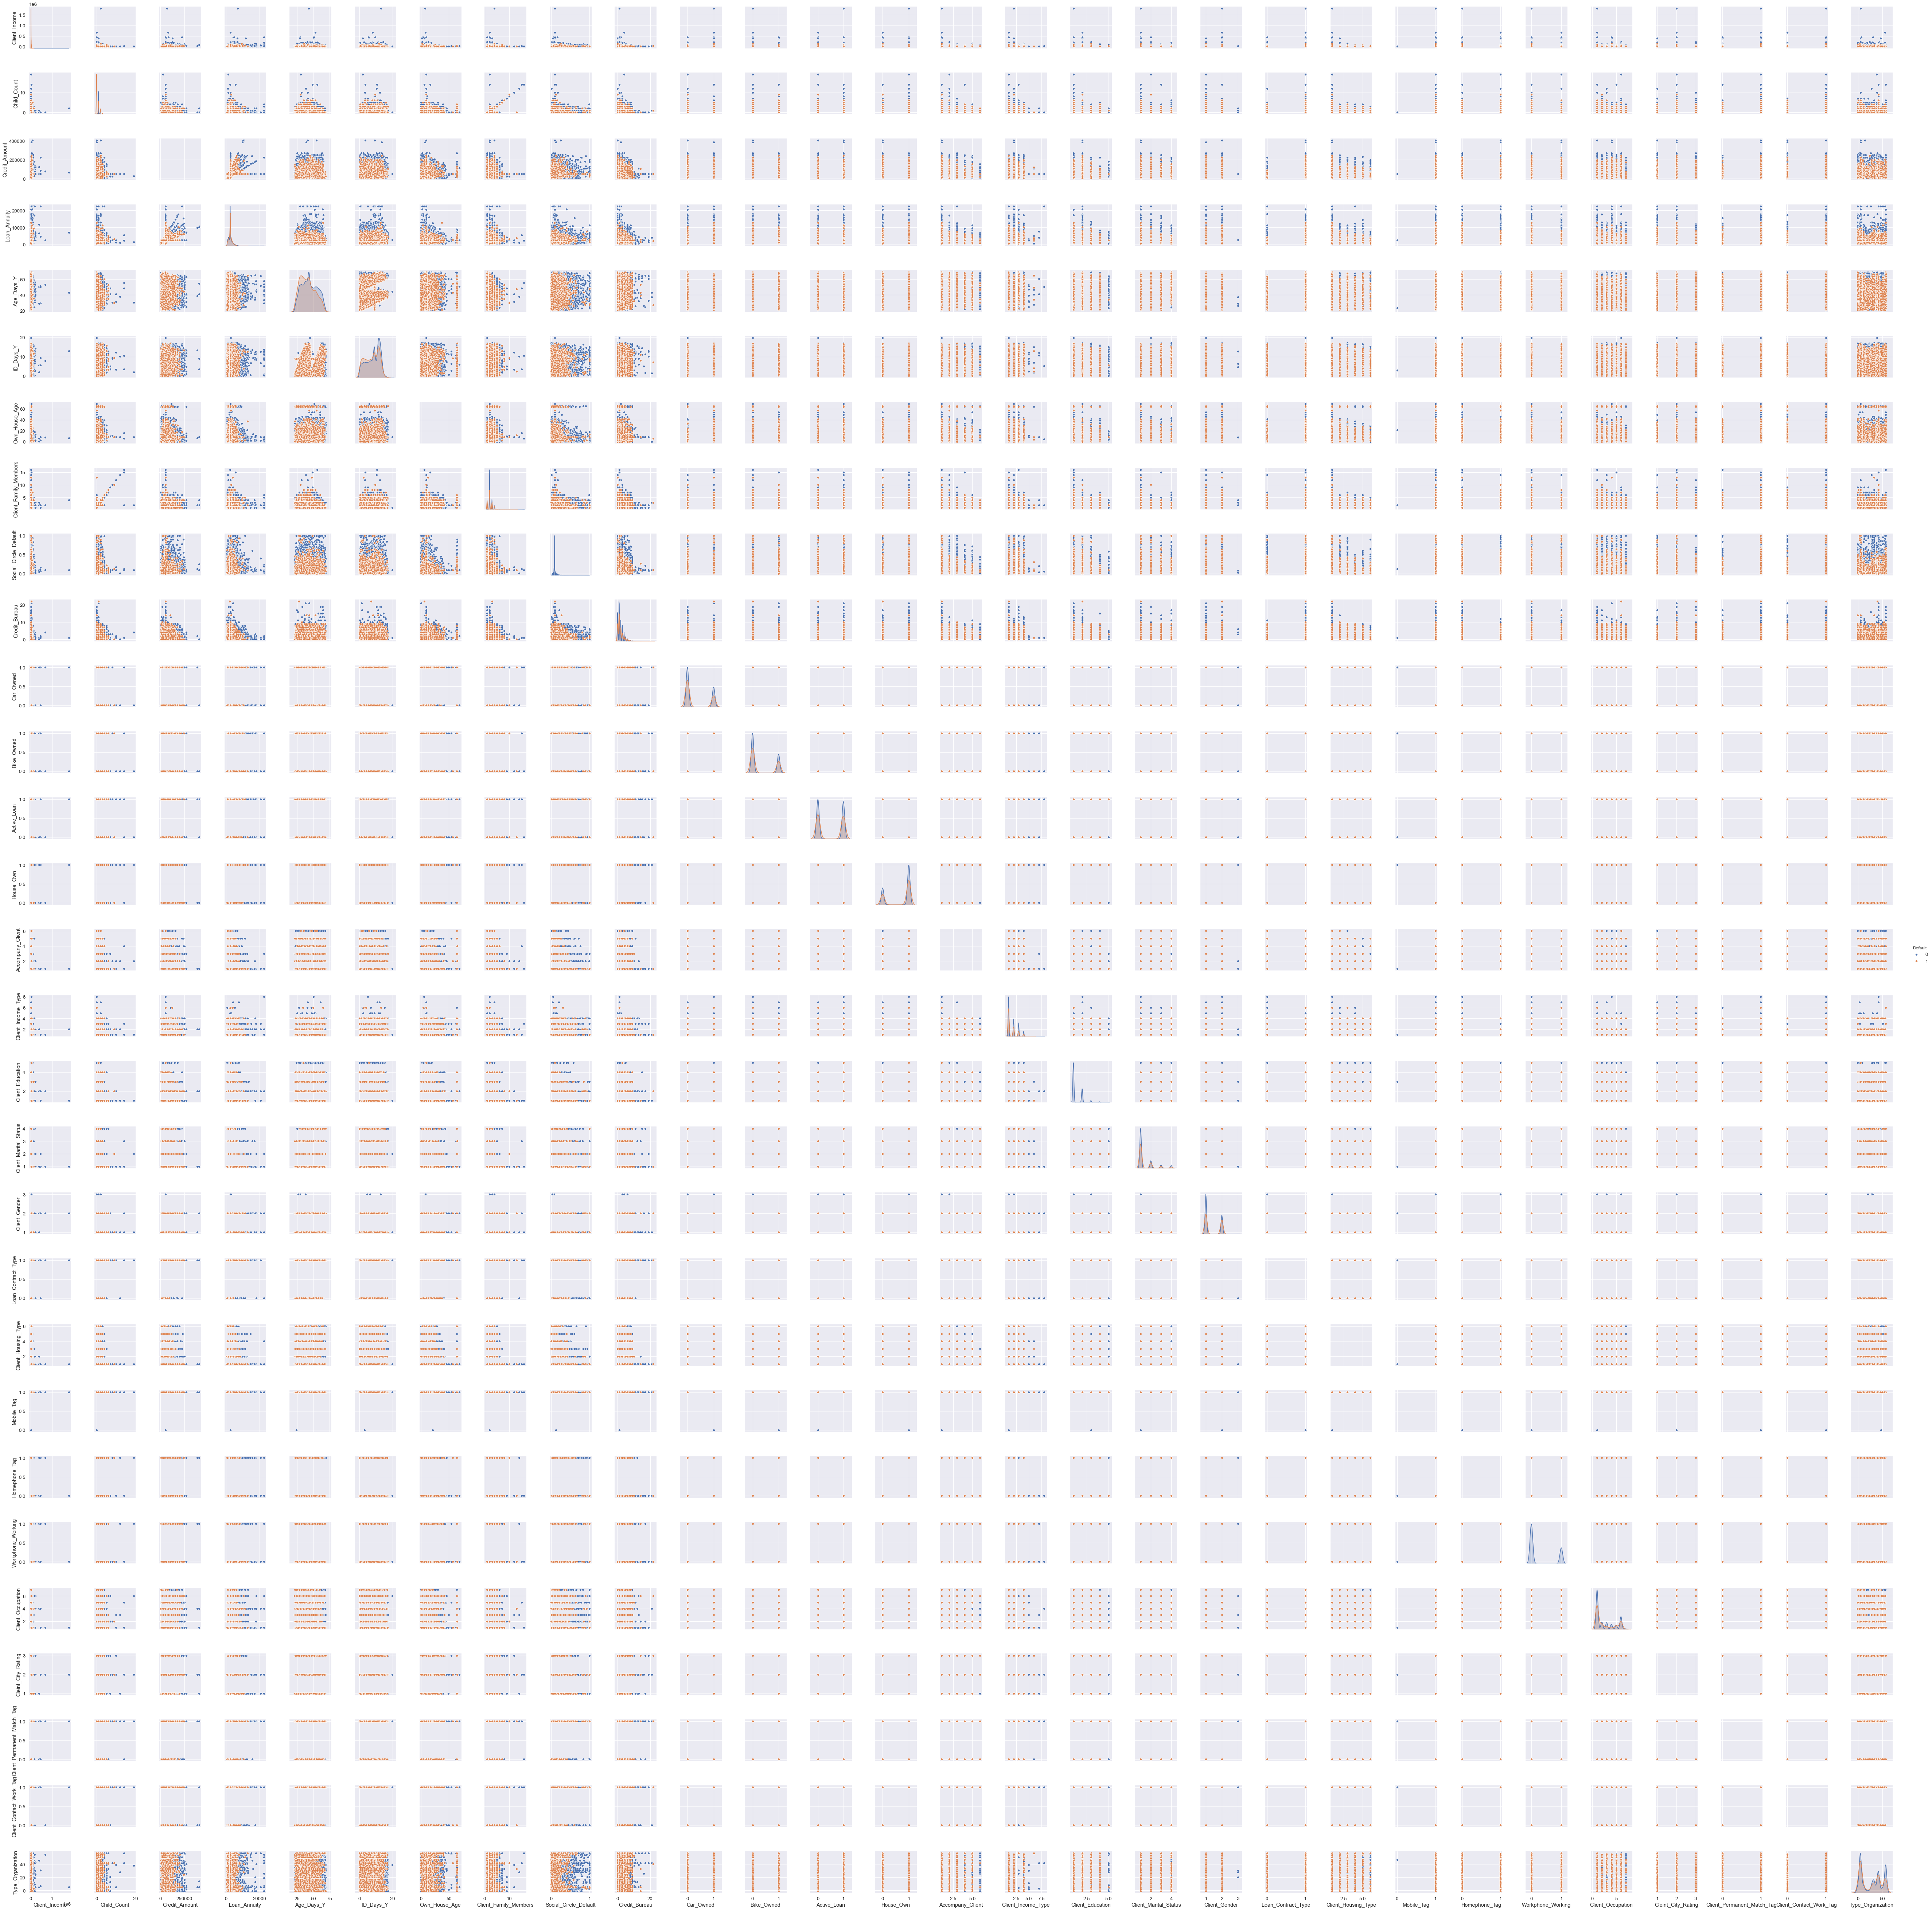

In [55]:
sns.pairplot(VechLoan_Train_W,diag_kind='kde',hue="Default")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020F3619A400>,
      dtype=object)

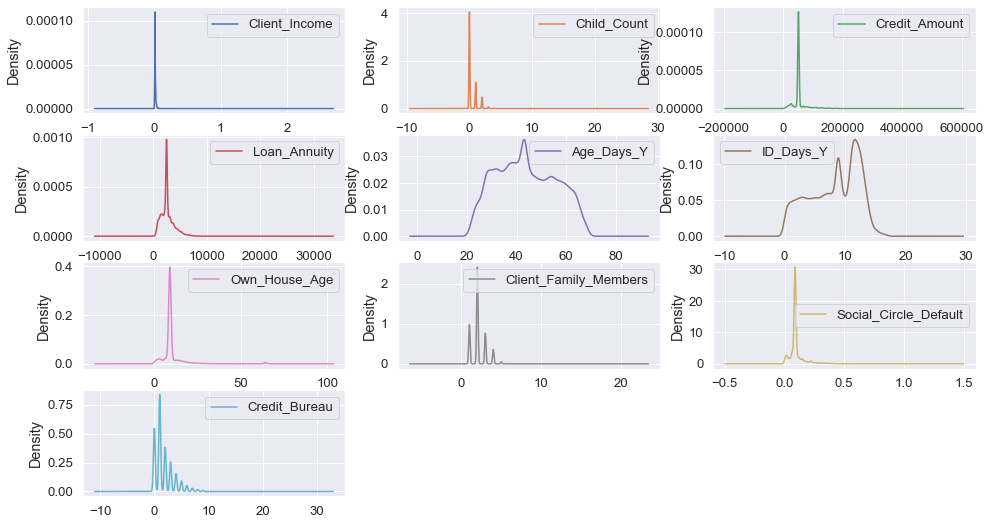

In [56]:
VechLoan_Train_W.plot(kind='density', subplots=True, layout=(4,3), figsize=(16,9),sharex=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020F86AE4B50>,
      dtype=object)

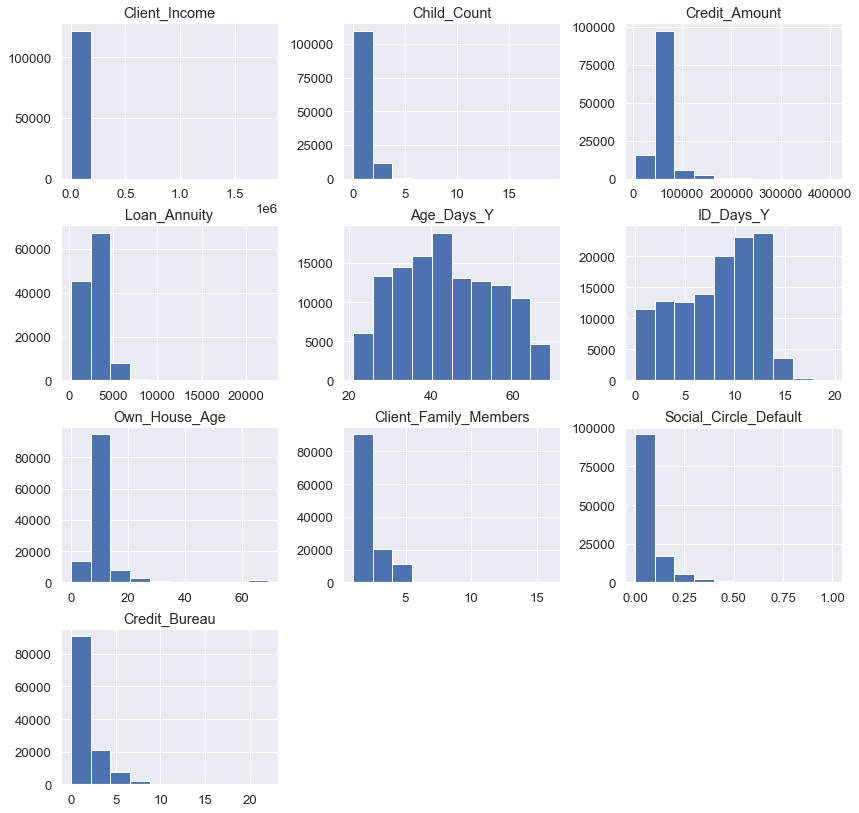

In [57]:
VechLoan_Train_W[VechLoan_Train_W.describe().columns].hist(figsize=(14,14)) # Check for data distribution for numberics

In [58]:
# Study of average agging between Defaulter vs non-Defaulter
round(VechLoan_Train_W.groupby(['Default']).mean(),0)

Client_Income  Child_Count  Credit_Amount  Loan_Annuity  Age_Days_Y  \
Default                                                                        
0              16522.0          0.0        54096.0        2676.0        44.0   
1              15776.0          0.0        52710.0        2624.0        41.0   

         ID_Days_Y  Own_House_Age  Client_Family_Members  \
Default                                                    
0              8.0           10.0                    2.0   
1              8.0           11.0                    2.0   

         Social_Circle_Default  Credit_Bureau  
Default                                        
0                          0.0            2.0  
1                          0.0            2.0

In [59]:
#Get non-numerical features.
non_num_cols = list(set(VechLoan_Train_W.columns) - set(VechLoan_Train_W.describe().columns))
print('Non-numerical features: ',non_num_cols)

Non-numerical features:  ['Bike_Owned', 'Client_Income_Type', 'House_Own', 'Cleint_City_Rating', 'Client_Contact_Work_Tag', 'Client_Permanent_Match_Tag', 'Client_Occupation', 'Accompany_Client', 'Client_Education', 'Car_Owned', 'Default', 'Workphone_Working', 'Homephone_Tag', 'Active_Loan', 'Type_Organization', 'Mobile_Tag', 'Client_Housing_Type', 'Client_Gender', 'Loan_Contract_Type', 'Client_Marital_Status']


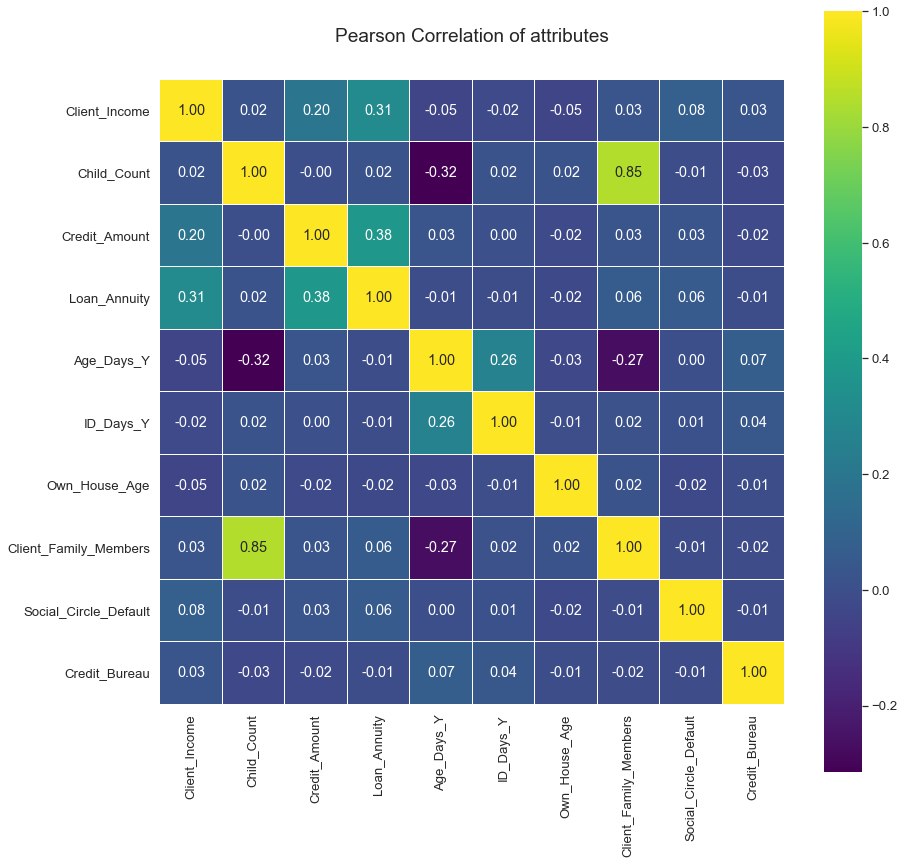

In [60]:
colormap = plt.cm.viridis # used to change the colour in heatmap
fig,ax = plt.subplots(figsize=(14, 14))
plt.title('Pearson Correlation of attributes', y=1.05, size=19)
sns.heatmap(VechLoan_Train_W.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True,ax=ax, fmt='.2f')
plt.show()

# Outlier identification

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020F9D96B490>,
      dtype=object)

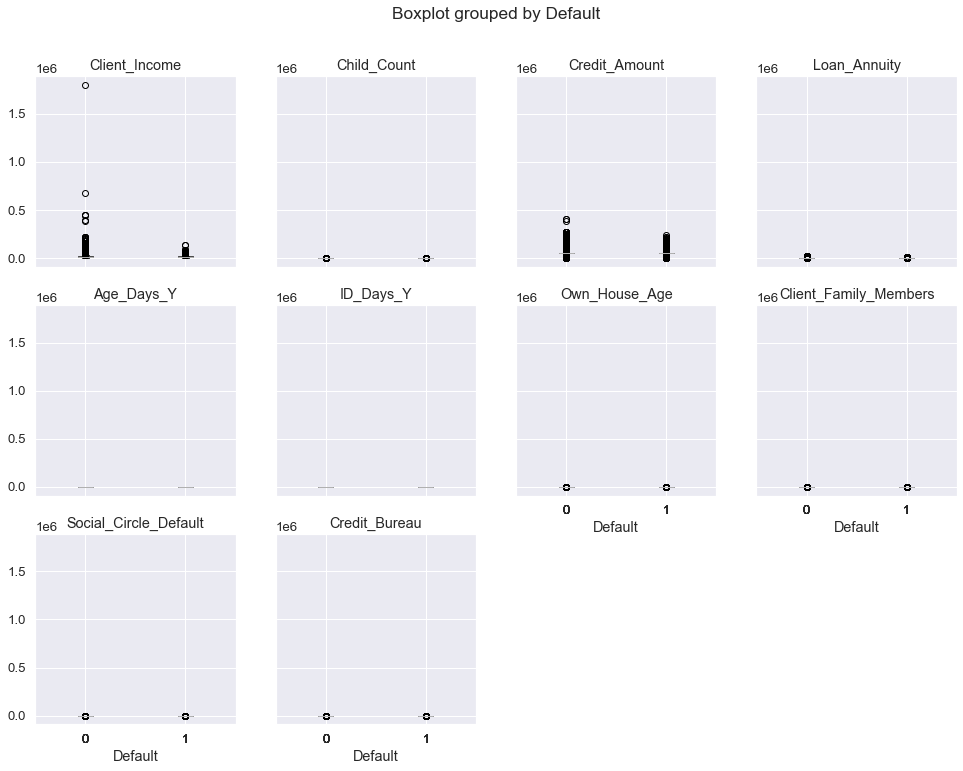

In [61]:
VechLoan_Train_W.boxplot(column=['Client_Income','Child_Count','Credit_Amount','Loan_Annuity','Age_Days_Y',
                                'ID_Days_Y','Own_House_Age','Client_Family_Members','Social_Circle_Default','Credit_Bureau'],
                         grid=True,layout=(3, 4),figsize=(16,12),by='Default')

# Bivariate Analysis

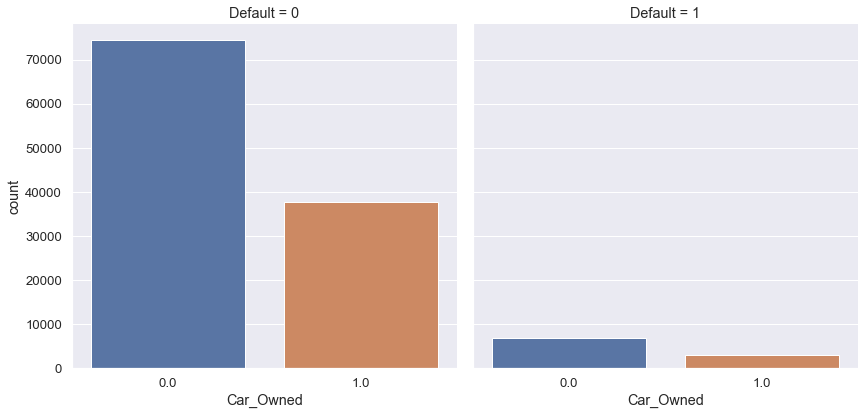

In [62]:
sns.catplot(x="Car_Owned", col="Default",data=VechLoan_Train_W, kind="count",height=6)

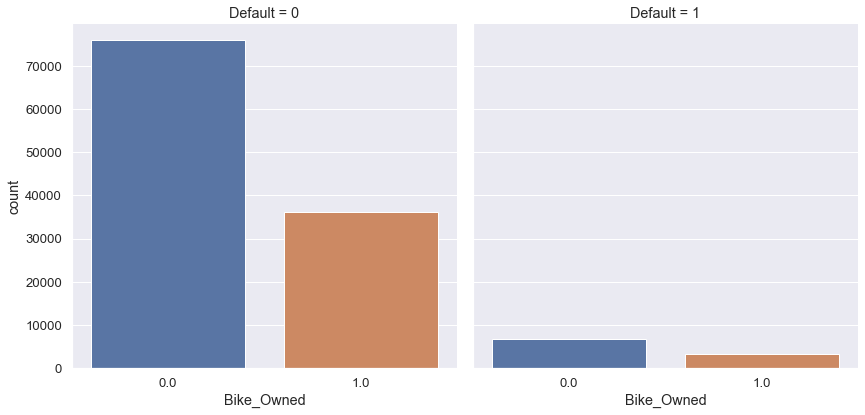

In [63]:
sns.catplot(x="Bike_Owned", col="Default",data=VechLoan_Train_W, kind="count",height=6)

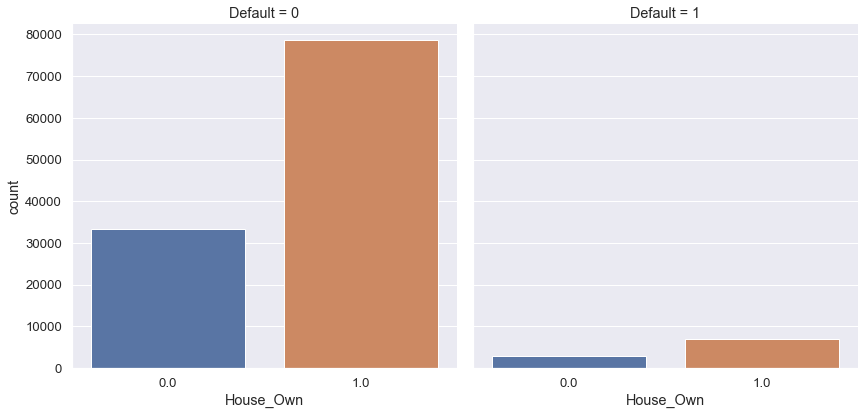

In [64]:
sns.catplot(x="House_Own", col="Default",data=VechLoan_Train_W, kind="count",height=6)

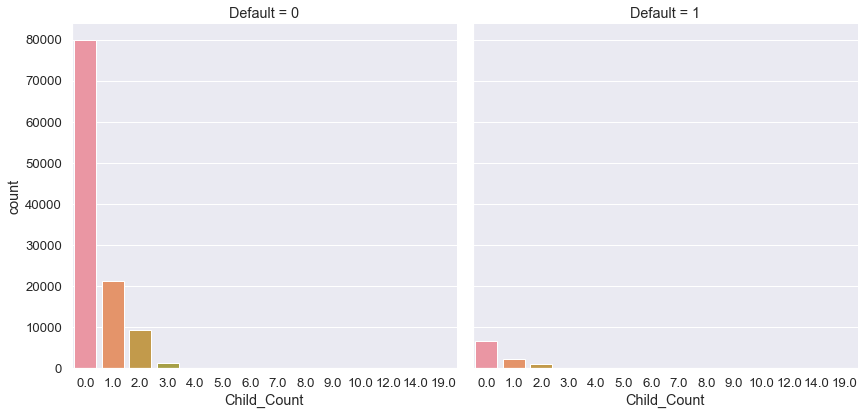

In [65]:
sns.catplot(x="Child_Count", col="Default",data=VechLoan_Train_W, kind="count",height=6)

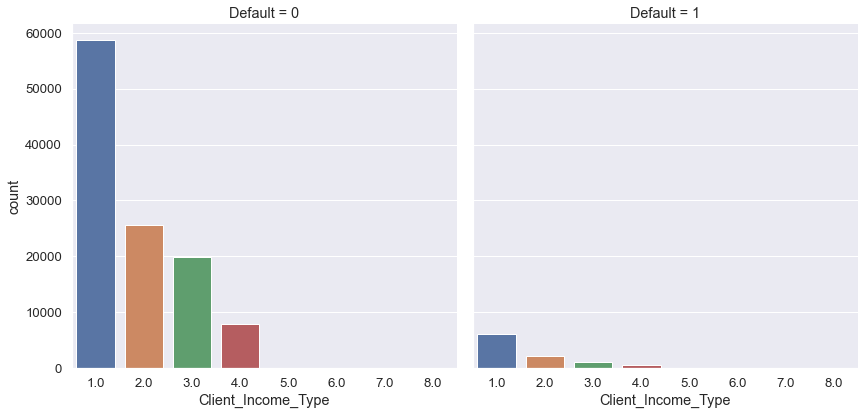

In [66]:
sns.catplot(x="Client_Income_Type", col="Default",data=VechLoan_Train_W, kind="count",height=6)

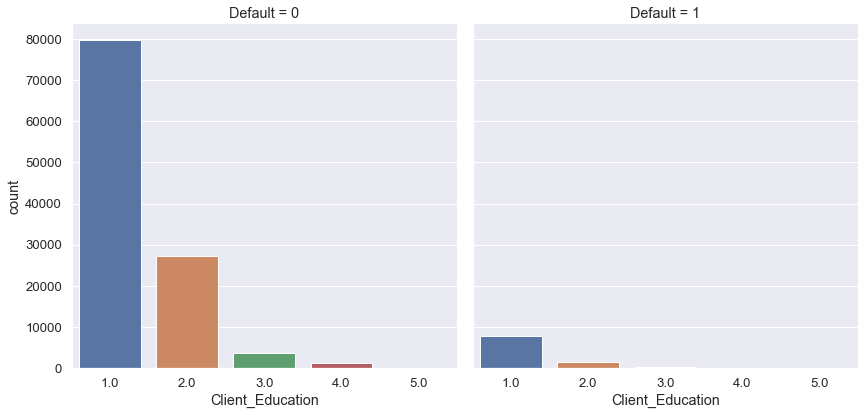

In [67]:
sns.catplot(x="Client_Education", col="Default",data=VechLoan_Train_W, kind="count",height=6)

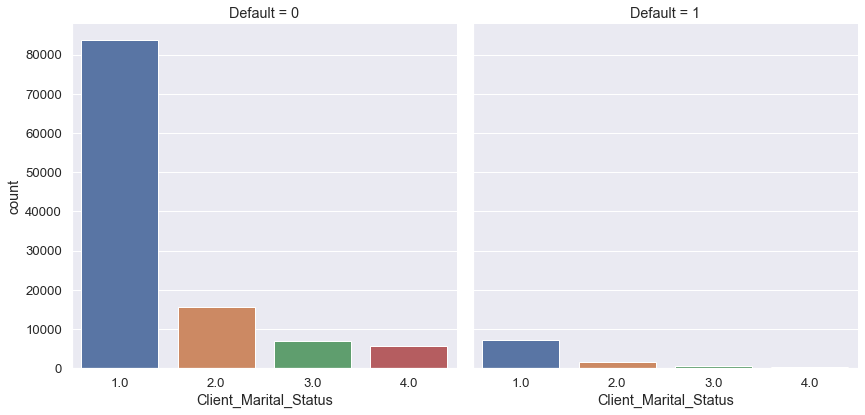

In [68]:
sns.catplot(x="Client_Marital_Status", col="Default",data=VechLoan_Train_W, kind="count",height=6)

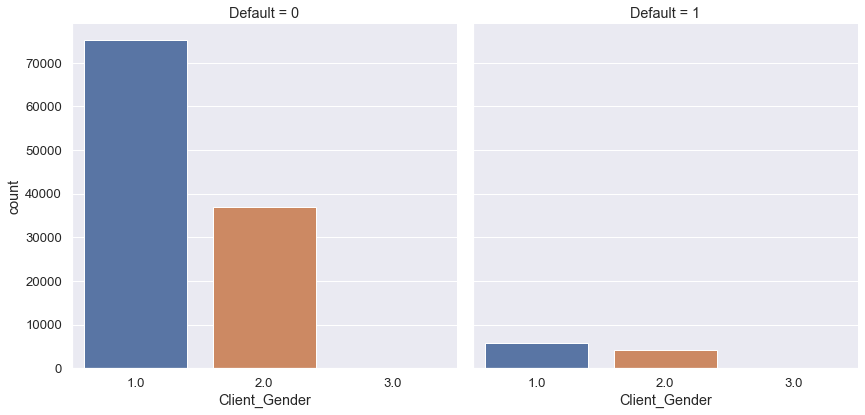

In [69]:
sns.catplot(x="Client_Gender", col="Default",data=VechLoan_Train_W, kind="count",height=6)

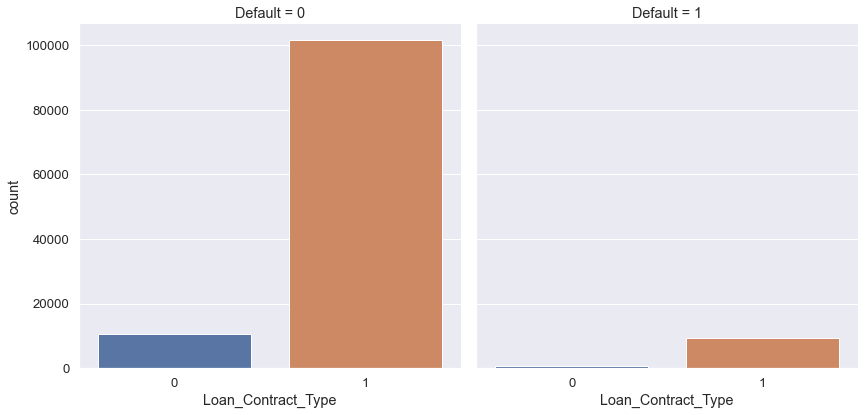

In [70]:
sns.catplot(x="Loan_Contract_Type", col="Default",data=VechLoan_Train_W, kind="count",height=6)

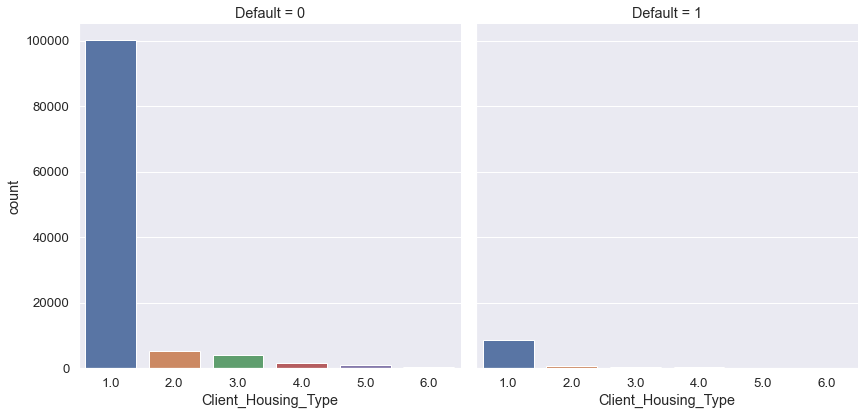

In [71]:
sns.catplot(x="Client_Housing_Type", col="Default",data=VechLoan_Train_W, kind="count",height=6)

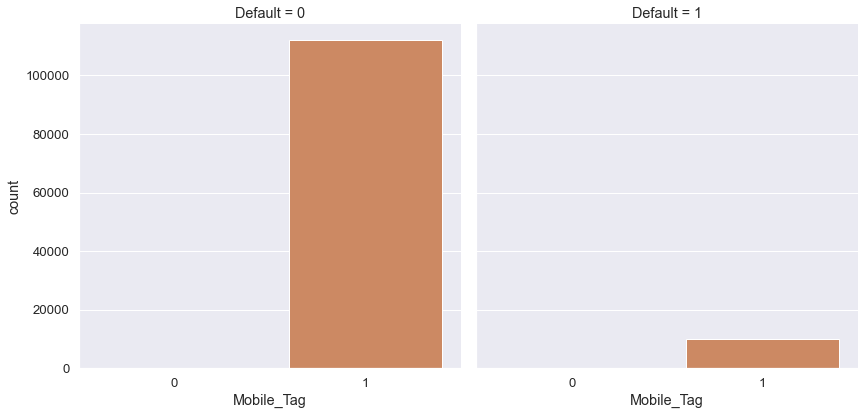

In [72]:
sns.catplot(x="Mobile_Tag", col="Default",data=VechLoan_Train_W, kind="count",height=6)

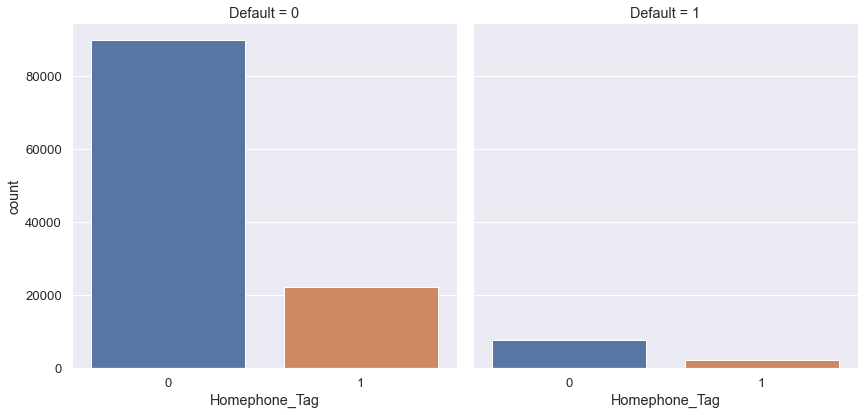

In [77]:
sns.catplot(x="Homephone_Tag", col="Default",data=VechLoan_Train_W, kind="count",height=6)

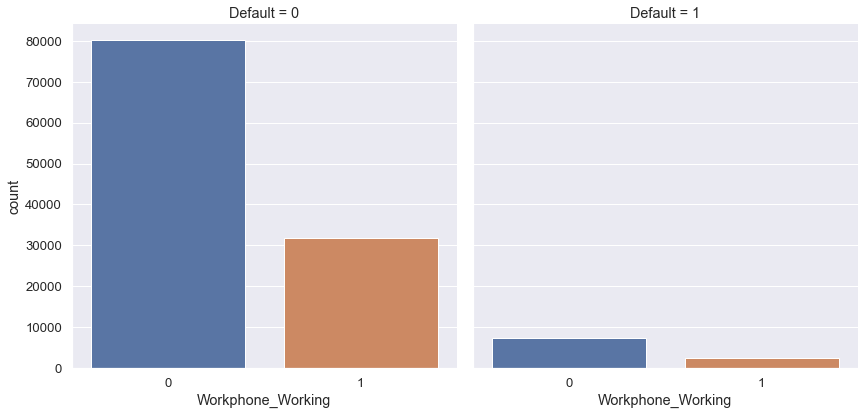

In [78]:
sns.catplot(x="Workphone_Working", col="Default",data=VechLoan_Train_W, kind="count",height=6)

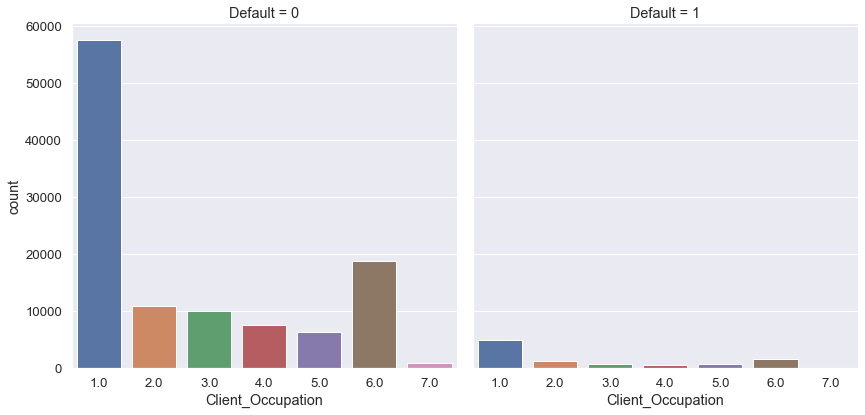

In [79]:
sns.catplot(x="Client_Occupation", col="Default",data=VechLoan_Train_W, kind="count",height=6)

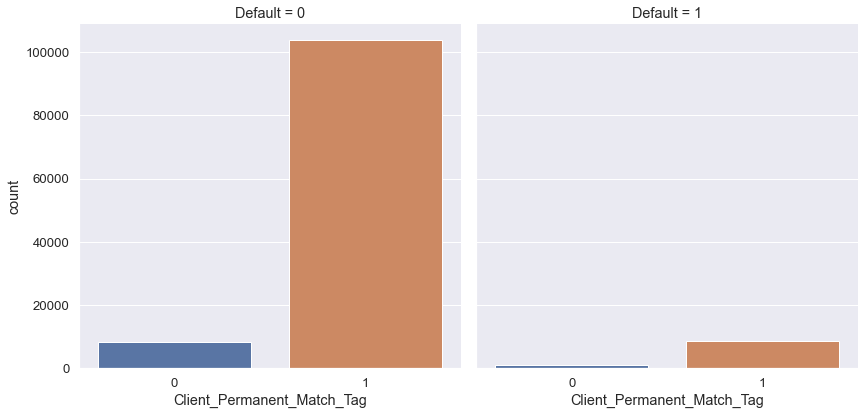

In [80]:
sns.catplot(x="Client_Permanent_Match_Tag", col="Default",data=VechLoan_Train_W, kind="count",height=6)

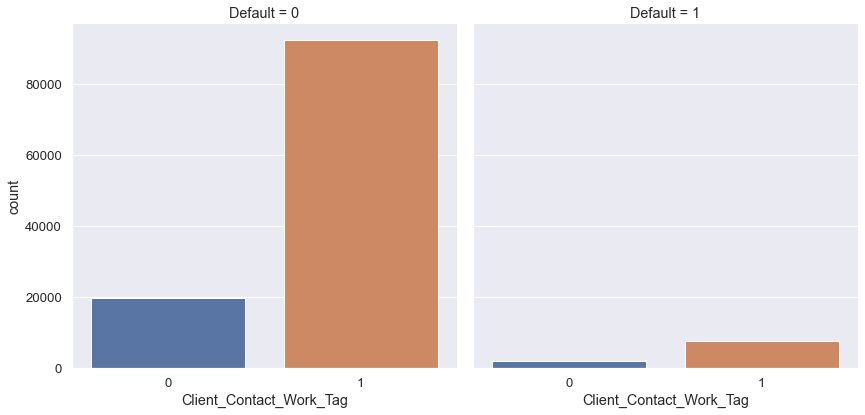

In [81]:
sns.catplot(x="Client_Contact_Work_Tag", col="Default",data=VechLoan_Train_W, kind="count",height=6)

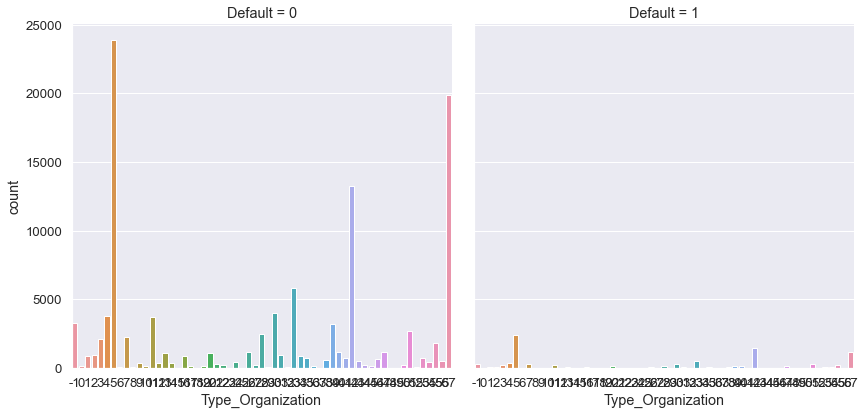

In [82]:
sns.catplot(x="Type_Organization", col="Default",data=VechLoan_Train_W, kind="count",height=6)

Vechicle loan percentage by Client house type 
 Default                   0     1
Client_Housing_Type              
1.0                  100081  8476
2.0                    5133   650
3.0                    3871   377
4.0                    1587   229
5.0                     934    68
6.0                     405    45 
 Default                     0         1
Client_Housing_Type                    
1.0                  0.921921  0.078079
2.0                  0.887602  0.112398
3.0                  0.911252  0.088748
4.0                  0.873899  0.126101
5.0                  0.932136  0.067864
6.0                  0.900000  0.100000


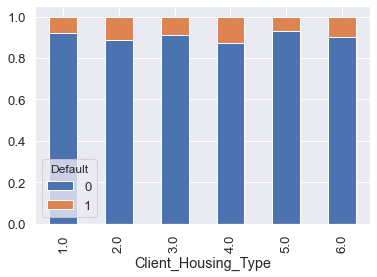

In [83]:
family=pd.crosstab(VechLoan_Train_W['Client_Housing_Type'],VechLoan_Train_W['Default'])
family.div(family.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
print('Vechicle loan percentage by Client house type','\n',family,'\n',family.div(family.sum(1).astype(float),axis=0))

Vechicle loan percentage by Client Education 
 Default               0     1
Client_Education             
1.0               79658  7898
2.0               27354  1465
3.0                3632   328
4.0                1302   153
5.0                  65     1 
 Default                  0         1
Client_Education                    
1.0               0.909795  0.090205
2.0               0.949165  0.050835
3.0               0.917172  0.082828
4.0               0.894845  0.105155
5.0               0.984848  0.015152


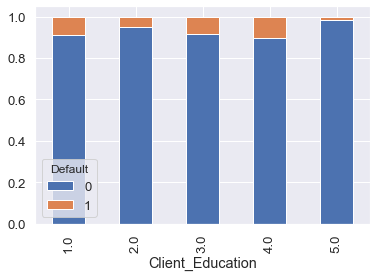

In [84]:
family=pd.crosstab(VechLoan_Train_W['Client_Education'],VechLoan_Train_W['Default'])
family.div(family.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
print('Vechicle loan percentage by Client Education','\n',family,'\n',family.div(family.sum(1).astype(float),axis=0))

Personal loan percentage by Age group 
 Default        0     1
Age_Group             
Young      29038  3528
Youth      33072  2972
Mid-Age    24994  1976
Old-Age    24907  1369 
 Default           0         1
Age_Group                    
Young      0.891666  0.108334
Youth      0.917545  0.082455
Mid-Age    0.926733  0.073267
Old-Age    0.947899  0.052101


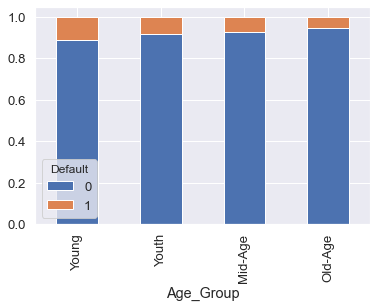

In [85]:
bins=[20,35,45,55,70]
agegroup=['Young','Youth','Mid-Age','Old-Age']
VechLoan_Train_W['Age_Group']=pd.cut(VechLoan_Train_W['Age_Days_Y'],bins,labels=agegroup)
CAge=pd.crosstab(VechLoan_Train_W['Age_Group'],VechLoan_Train_W['Default'])
CAge.div(CAge.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
print('Personal loan percentage by Age group','\n',CAge,'\n',CAge.div(CAge.sum(1).astype(float),axis=0))

# Multivariate Analysis

<Figure size 144x432 with 0 Axes>

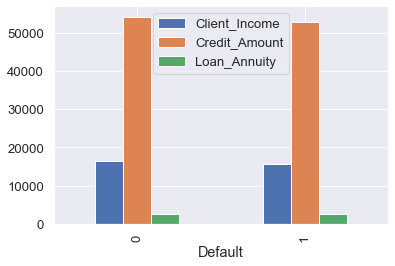

In [86]:
plt.figure(figsize=(2, 6))
VechLoan_Train_W.groupby('Default')['Client_Income','Credit_Amount','Loan_Annuity'].mean().plot(kind='bar')

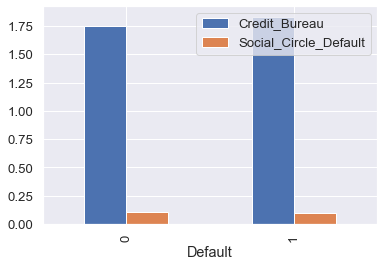

In [87]:
VechLoan_Train_W.groupby('Default')['Credit_Bureau','Social_Circle_Default'].mean().plot(kind='bar')

# Check for class balance

0    91.92
1     8.08
Name: Default, dtype: float64


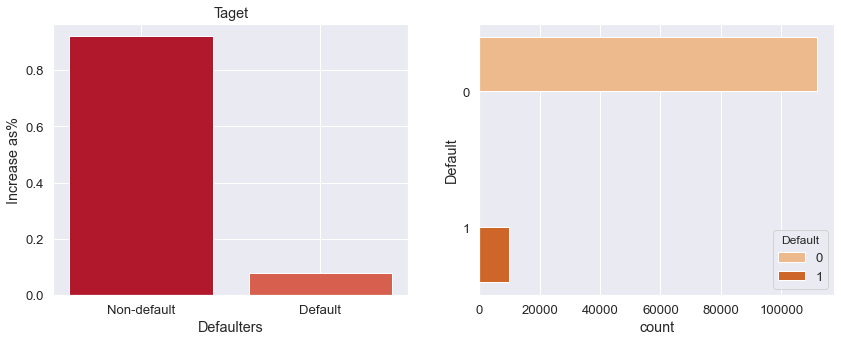

In [88]:
plt.figure(figsize=(14, 5))
print(round(VechLoan_Train_W.Default.value_counts(normalize=True),4) * 100)
plt.subplot(1,2,1)
plt.bar(['Non-default','Default'],VechLoan_Train_W.Default.value_counts(normalize=True),
        color=sns.color_palette("RdBu",n_colors=9))
plt.title('Taget')
plt.xlabel('Defaulters')
plt.ylabel('Increase as%')
plt.subplot(1,2,2)
sns.countplot(y="Default", data=VechLoan_Train_W,hue="Default",palette="Oranges")
plt.show();

# Outlier Imputing

In [89]:
MCI=VechLoan_Train_W['Client_Income'].quantile(0.50)
Q1CI=VechLoan_Train_W['Client_Income'].quantile(0.30)
Q3CI=VechLoan_Train_W['Client_Income'].quantile(0.25)
IQRCI = Q3CI - Q1CI
VechLoan_Train_W['Client_Income'] = np.where(VechLoan_Train_W['Client_Income'] > (Q3CI+1.5*IQRCI),MCI,VechLoan_Train_W['Client_Income'])
VechLoan_Train_W['Client_Income'] = np.where(VechLoan_Train_W['Client_Income'] < (Q1CI-1.5*IQRCI),MCI,VechLoan_Train_W['Client_Income'])

MCC=VechLoan_Train_W['Child_Count'].quantile(0.50)
Q1CC=VechLoan_Train_W['Child_Count'].quantile(0.25)
Q3CC=VechLoan_Train_W['Child_Count'].quantile(0.75)
IQRCC = Q3CC - Q1CC
VechLoan_Train_W['Child_Count'] = np.where(VechLoan_Train_W['Child_Count'] > (Q3CC+1.5*IQRCC),MCC,VechLoan_Train_W['Child_Count'])
VechLoan_Train_W['Child_Count'] = np.where(VechLoan_Train_W['Child_Count'] < (Q1CC-1.5*IQRCC),MCC,VechLoan_Train_W['Child_Count'])

MCA=VechLoan_Train_W['Credit_Amount'].quantile(0.50)
Q1CA=VechLoan_Train_W['Credit_Amount'].quantile(0.25)
Q3CA=VechLoan_Train_W['Credit_Amount'].quantile(0.75)
IQRCA = Q3CA - Q1CA
VechLoan_Train_W['Credit_Amount'] = np.where(VechLoan_Train_W['Credit_Amount'] > (Q3CA+1.5*IQRCA),MCA,VechLoan_Train_W['Credit_Amount'])
VechLoan_Train_W['Credit_Amount'] = np.where(VechLoan_Train_W['Credit_Amount'] < (Q1CA-1.5*IQRCA),MCA,VechLoan_Train_W['Credit_Amount'])

MLA=VechLoan_Train_W['Loan_Annuity'].quantile(0.50)
Q1LA=VechLoan_Train_W['Loan_Annuity'].quantile(0.30)
Q3LA=VechLoan_Train_W['Loan_Annuity'].quantile(0.25)
IQRLA = Q3LA - Q1LA
VechLoan_Train_W['Loan_Annuity'] = np.where(VechLoan_Train_W['Loan_Annuity'] > (Q3LA+1.5*IQRLA),MLA,VechLoan_Train_W['Loan_Annuity'])
VechLoan_Train_W['Loan_Annuity'] = np.where(VechLoan_Train_W['Loan_Annuity'] < (Q1LA-1.5*IQRLA),MLA,VechLoan_Train_W['Loan_Annuity'])

MOH=VechLoan_Train_W['Own_House_Age'].quantile(0.50)
Q1OH=VechLoan_Train_W['Own_House_Age'].quantile(0.25)
Q3OH=VechLoan_Train_W['Own_House_Age'].quantile(0.75)
IQROH = Q3OH - Q1OH
VechLoan_Train_W['Own_House_Age'] = np.where(VechLoan_Train_W['Own_House_Age'] > (Q3OH+1.5*IQROH),MOH,VechLoan_Train_W['Own_House_Age'])
VechLoan_Train_W['Own_House_Age'] = np.where(VechLoan_Train_W['Own_House_Age'] < (Q1OH-1.5*IQROH),MOH,VechLoan_Train_W['Own_House_Age'])

MCM=VechLoan_Train_W['Client_Family_Members'].quantile(0.50)
Q1CM=VechLoan_Train_W['Client_Family_Members'].quantile(0.30)
Q3CM=VechLoan_Train_W['Client_Family_Members'].quantile(0.65)
IQRCM = Q3CM - Q1CM
VechLoan_Train_W['Client_Family_Members'] = np.where(VechLoan_Train_W['Client_Family_Members'] > (Q3CM+1.5*IQRCM),MCM,VechLoan_Train_W['Client_Family_Members'])
VechLoan_Train_W['Client_Family_Members'] = np.where(VechLoan_Train_W['Client_Family_Members'] < (Q1CM-1.5*IQRCM),MCM,VechLoan_Train_W['Client_Family_Members'])

MSC=VechLoan_Train_W['Social_Circle_Default'].quantile(0.50)
Q1SC=VechLoan_Train_W['Social_Circle_Default'].quantile(0.25)
Q3SC=VechLoan_Train_W['Social_Circle_Default'].quantile(0.75)
IQRSC = Q3SC - Q1SC
VechLoan_Train_W['Social_Circle_Default'] = np.where(VechLoan_Train_W['Social_Circle_Default'] > (Q3SC+1.5*IQRSC),MSC,VechLoan_Train_W['Social_Circle_Default'])
VechLoan_Train_W['Social_Circle_Default'] = np.where(VechLoan_Train_W['Social_Circle_Default'] < (Q1SC-1.5*IQRSC),MSC,VechLoan_Train_W['Social_Circle_Default'])

MCB=VechLoan_Train_W['Credit_Bureau'].quantile(0.50)
Q1CB=VechLoan_Train_W['Credit_Bureau'].quantile(0.25)
Q3CB=VechLoan_Train_W['Credit_Bureau'].quantile(0.55)
IQRCB = Q3CB - Q1CB
VechLoan_Train_W['Credit_Bureau'] = np.where(VechLoan_Train_W['Credit_Bureau'] > (Q3CB+1.5*IQRCB),MCB,VechLoan_Train_W['Credit_Bureau'])
VechLoan_Train_W['Credit_Bureau'] = np.where(VechLoan_Train_W['Credit_Bureau'] < (Q1CB-1.5*IQRCB),MCB,VechLoan_Train_W['Credit_Bureau'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020FB075A790>,
      dtype=object)

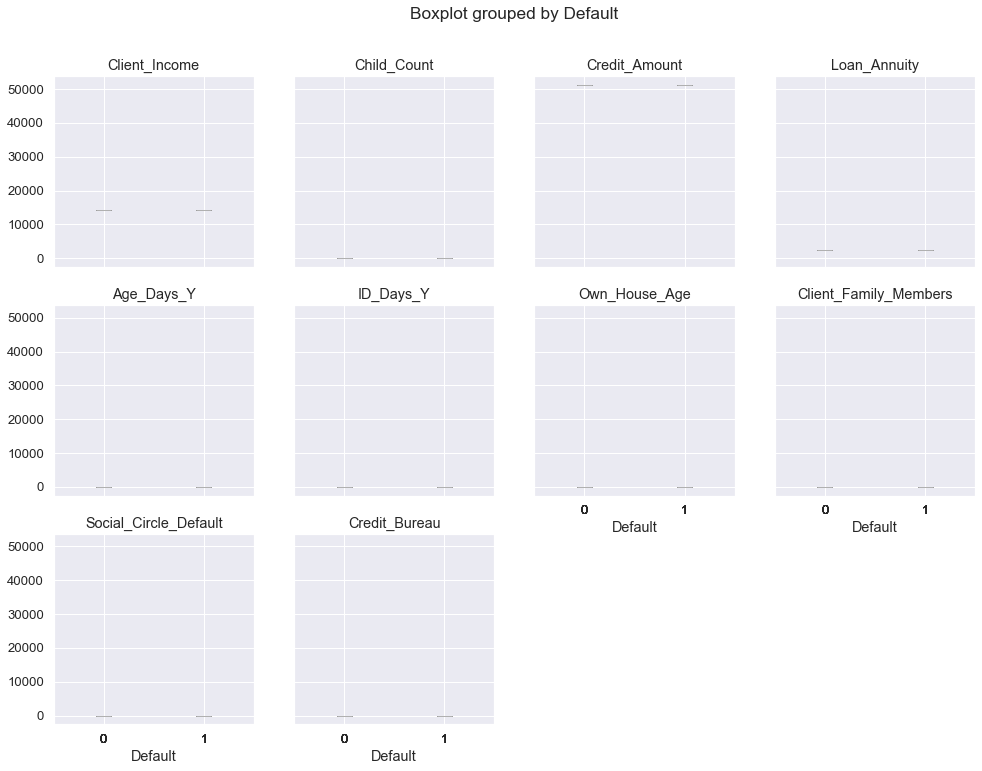

In [90]:
VechLoan_Train_W.boxplot(column=['Client_Income','Child_Count','Credit_Amount','Loan_Annuity','Age_Days_Y',
                                'ID_Days_Y','Own_House_Age','Client_Family_Members','Social_Circle_Default','Credit_Bureau'],
                         grid=True,layout=(3, 4),figsize=(16,12),by='Default')

In [91]:
# Exporting Final Train data into CSV format
VechLoan_Train_W.to_csv(r'F:\GreatLake_DataAnalytics\Python\Project\Hackton\VechLoan_Train_W.csv', index=False)
VechLoan_Test_W.to_csv(r'F:\GreatLake_DataAnalytics\Python\Project\Hackton\VechLoan_Test_W.csv', index=False)

# Multicolinearity Check

In [92]:
# Calculating VIF value for Independent variables
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
VechLoan_Train_W_NumF = pd.concat([VechLoan_Train_W_Num,VechLoan_Train_W_Category['Default']],axis=1, join='inner')
y, X = dmatrices('Default ~ Client_Income+Child_Count+Credit_Amount+Loan_Annuity+Age_Days_Y+ID_Days_Y+Own_House_Age+Client_Family_Members+Social_Circle_Default+Credit_Bureau', data=VechLoan_Train_W_NumF, return_type='dataframe')
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif.round(2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif
# Though all the variables VIF value is less than 5, we need not drop any of the variables. But, Child_Count and Client_Family_Members
# has high correlation i.e., 0.85. So, we can drop any of these. Hence we are dropping Child_Count
# Also, Child count and Client Family members VIP is > 3, so we can drop any one

Variable        VIF
0               Intercept  42.899533
2             Child_Count   3.753456
8   Client_Family_Members   3.644762
4            Loan_Annuity   1.260353
5              Age_Days_Y   1.216143
3           Credit_Amount   1.180425
1           Client_Income   1.126519
6               ID_Days_Y   1.089441
9   Social_Circle_Default   1.008680
10          Credit_Bureau   1.008654
7           Own_House_Age   1.004042

In [93]:
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
VechLoan_Train_W_NumF = pd.concat([VechLoan_Train_W_Num,VechLoan_Train_W_Category['Default']],axis=1, join='inner')
y, X = dmatrices('Default ~ Client_Income+Credit_Amount+Loan_Annuity+Age_Days_Y+ID_Days_Y+Own_House_Age+Client_Family_Members+Social_Circle_Default+Credit_Bureau', data=VechLoan_Train_W_NumF, return_type='dataframe')
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif.round(2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Variable        VIF
0              Intercept  39.084868
3           Loan_Annuity   1.256480
2          Credit_Amount   1.179663
4             Age_Days_Y   1.177863
1          Client_Income   1.126099
7  Client_Family_Members   1.093721
5              ID_Days_Y   1.084585
8  Social_Circle_Default   1.008672
9          Credit_Bureau   1.008276
6          Own_House_Age   1.004030

# Model building

In [94]:
VechLoan_Train_W_Num=VechLoan_Train_W.select_dtypes(exclude=['category'])
VechLoan_Train_W_Num.drop(columns=['Child_Count'],axis=1,inplace=True) # As these columns are irrelevant, we are dropping
VechLoan_Train_W_Num

Client_Income  Credit_Amount  Loan_Annuity  Age_Days_Y  ID_Days_Y  \
0             14400.0        51206.4       2499.75       38.24       1.05   
1             14400.0        51206.4       2499.75       38.80       0.06   
2             14400.0        51206.4       2499.75       46.00       0.91   
3             14400.0        51206.4       2499.75       63.55       2.12   
4             14400.0        51206.4       2499.75       31.14      11.08   
...               ...            ...           ...         ...        ...   
121851        14400.0        51206.4       2499.75       35.31       8.06   
121852        14400.0        51206.4       2499.75       23.69       3.31   
121853        14400.0        51206.4       2499.75       25.07       0.97   
121854        14400.0        51206.4       2499.75       28.19       7.95   
121855        14400.0        51206.4       2499.75       40.47      13.77   

        Own_House_Age  Client_Family_Members  Social_Circle_Default  \
0                 9.0                    2.0                 0.0887   
1                 9.0                    2.0                 0.0887   
2                 9.0                    2.0                 0.0887   
3                 9.0                    2.0                 0.0887   
4                 9.0                    2.0                 0.0887   
...               ...                    ...                    ...   
121851            9.0                    2.0                 0.0887   
121852            9.0                    2.0                 0.0887   
121853            9.0                    2.0                 0.0887   
121854            9.0                    2.0                 0.0887   
121855            9.0                    2.0                 0.0887   

        Credit_Bureau  
0                 1.0  
1                 1.0  
2                 1.0  
3                 1.0  
4                 1.0  
...               ...  
121851            1.0  
121852            1.0  
121853            1.0  
121854            1.0  
121855            1.0  

[121856 rows x 9 columns]

In [95]:
VechLoan_Train_W_Cat=VechLoan_Train_W.select_dtypes(include = ['category'])
VechLoan_Train_W_Cat.drop(columns=['Age_Group'],axis=1,inplace=True) # As these columns are irrelevant, we are dropping
VechLoan_Train_W_Cat

Car_Owned Bike_Owned Active_Loan House_Own Accompany_Client  \
0            0.0        0.0         1.0       0.0              1.0   
1            1.0        0.0         1.0       1.0              1.0   
2            0.0        0.0         1.0       0.0              1.0   
3            0.0        0.0         1.0       1.0              1.0   
4            1.0        0.0         1.0       0.0              1.0   
...          ...        ...         ...       ...              ...   
121851       0.0        0.0         0.0       1.0              2.0   
121852       0.0        1.0         1.0       0.0              1.0   
121853       0.0        1.0         0.0       1.0              1.0   
121854       1.0        1.0         0.0       1.0              1.0   
121855       1.0        1.0         1.0       1.0              1.0   

       Client_Income_Type Client_Education Client_Marital_Status  \
0                     2.0              1.0                   1.0   
1                     1.0              2.0                   1.0   
2                     1.0              3.0                   4.0   
3                     3.0              1.0                   1.0   
4                     2.0              1.0                   1.0   
...                   ...              ...                   ...   
121851                1.0              1.0                   1.0   
121852                2.0              2.0                   1.0   
121853                4.0              1.0                   1.0   
121854                1.0              2.0                   1.0   
121855                2.0              1.0                   2.0   

       Client_Gender Loan_Contract_Type Client_Housing_Type Mobile_Tag  \
0                1.0                  1                 1.0          1   
1                1.0                  1                 1.0          1   
2                1.0                  1                 2.0          1   
3                1.0                  1                 1.0          1   
4                2.0                  1                 1.0          1   
...              ...                ...                 ...        ...   
121851           2.0                  1                 1.0          1   
121852           2.0                  1                 1.0          1   
121853           1.0                  1                 1.0          1   
121854           2.0                  1                 1.0          1   
121855           1.0                  1                 1.0          1   

       Homephone_Tag Workphone_Working Client_Occupation Cleint_City_Rating  \
0                  1                 0               2.0                2.0   
1                  0                 1               1.0                2.0   
2                  0                 0               6.0                2.0   
3                  0                 0               1.0                3.0   
4                  0                 0               1.0                1.0   
...              ...               ...               ...                ...   
121851             0                 0               1.0                2.0   
121852             1                 0               2.0                3.0   
121853             0                 0               6.0                3.0   
121854             0                 0               2.0                2.0   
121855             0                 0               4.0                3.0   

       Client_Permanent_Match_Tag Client_Contact_Work_Tag Type_Organization  \
0                               1                       1                42   
1                               1                       1                11   
2                               1                       1                42   
3                               1                       1                57   
4                               1                       1                 5   
...                           ...    

In [96]:
# combine numberic and categorical dataframes
VechLoan_Train_W_F=pd.concat([VechLoan_Train_W_Num,VechLoan_Train_W_Cat],axis=1, join='inner')
VechLoan_Train_W_F

Client_Income  Credit_Amount  Loan_Annuity  Age_Days_Y  ID_Days_Y  \
0             14400.0        51206.4       2499.75       38.24       1.05   
1             14400.0        51206.4       2499.75       38.80       0.06   
2             14400.0        51206.4       2499.75       46.00       0.91   
3             14400.0        51206.4       2499.75       63.55       2.12   
4             14400.0        51206.4       2499.75       31.14      11.08   
...               ...            ...           ...         ...        ...   
121851        14400.0        51206.4       2499.75       35.31       8.06   
121852        14400.0        51206.4       2499.75       23.69       3.31   
121853        14400.0        51206.4       2499.75       25.07       0.97   
121854        14400.0        51206.4       2499.75       28.19       7.95   
121855        14400.0        51206.4       2499.75       40.47      13.77   

        Own_House_Age  Client_Family_Members  Social_Circle_Default  \
0                 9.0                    2.0                 0.0887   
1                 9.0                    2.0                 0.0887   
2                 9.0                    2.0                 0.0887   
3                 9.0                    2.0                 0.0887   
4                 9.0                    2.0                 0.0887   
...               ...                    ...                    ...   
121851            9.0                    2.0                 0.0887   
121852            9.0                    2.0                 0.0887   
121853            9.0                    2.0                 0.0887   
121854            9.0                    2.0                 0.0887   
121855            9.0                    2.0                 0.0887   

        Credit_Bureau Car_Owned Bike_Owned Active_Loan House_Own  \
0                 1.0       0.0        0.0         1.0       0.0   
1                 1.0       1.0        0.0         1.0       1.0   
2                 1.0       0.0        0.0         1.0       0.0   
3                 1.0       0.0        0.0         1.0       1.0   
4                 1.0       1.0        0.0         1.0       0.0   
...               ...       ...        ...         ...       ...   
121851            1.0       0.0        0.0         0.0       1.0   
121852            1.0       0.0        1.0         1.0       0.0   
121853            1.0       0.0        1.0         0.0       1.0   
121854            1.0       1.0        1.0         0.0       1.0   
121855            1.0       1.0        1.0         1.0       1.0   

       Accompany_Client Client_Income_Type Client_Education  \
0                   1.0                2.0              1.0   
1                   1.0                1.0              2.0   
2                   1.0                1.0              3.0   
3                   1.0                3.0              1.0   
4                   1.0                2.0              1.0   
...                 ...                ...              ...   
121851              2.0                1.0              1.0   
121852              1.0                2.0              2.0   
121853              1.0                4.0              1.0   
121854              1.0                1.0              2.0   
121855              1.0                2.0              1.0   

       Client_Marital_Status Client_Gender Loan_Contract_Type  \
0                        1.0           1.0                  1   
1                        1.0           1.0                  1   
2                        4.0           1.0                  1   
3                        1.0           1.0                  1   
4                        1.0           2.0                  1   
...                      ...           ...                ...   
121851                   1.0           2.0                  1   
121852                   1.0           2.0                  1   
121853                   1.0           1.0                  1   
121854

In [97]:
VechLoan_Test_W_Num=VechLoan_Test_W.select_dtypes(exclude=['category'])
VechLoan_Test_W_Num.drop(columns=['Child_Count'],axis=1,inplace=True) # As these columns are irrelevant, we are dropping
VechLoan_Test_W_Num

Client_Income  Credit_Amount  Loan_Annuity  Age_Days_Y  ID_Days_Y  \
0            11250.0      112500.00       2499.75       54.97       9.09   
1            13500.0       49752.00       2499.75       36.16      10.59   
2            38250.0       67500.00       2499.75       43.68       6.29   
3            20250.0       50849.55       2499.75       42.83      16.77   
4            13500.0       43603.20       2499.75       43.32       9.91   
...              ...            ...           ...         ...        ...   
80895        11700.0      107820.00       3152.25       37.99       8.98   
80896        29250.0      116430.75       4630.50       38.41      14.30   
80897        54000.0       52128.00       2742.30       27.27       1.98   
80898        13500.0       25470.00       1435.05       58.81       7.22   
80899        10350.0       26955.00       1475.10       27.89       5.91   

       Own_House_Age  Client_Family_Members  Social_Circle_Default  \
0                9.0                    2.0                 0.0515   
1                6.0                    5.0                 0.0887   
2                9.0                    2.0                 0.1503   
3                9.0                    1.0                 0.0887   
4                7.0                    2.0                 0.0887   
...              ...                    ...                    ...   
80895            9.0                    4.0                 0.0887   
80896            9.0                    4.0                 0.1072   
80897           19.0                    2.0                 0.0887   
80898            9.0                    2.0                 0.1392   
80899           14.0                    3.0                 0.1206   

       Credit_Bureau  
0                2.0  
1                1.0  
2                1.0  
3                4.0  
4                1.0  
...              ...  
80895            1.0  
80896            0.0  
80897            0.0  
80898            2.0  
80899            1.0  

[80900 rows x 9 columns]

In [98]:
VechLoan_Test_W_Cat=VechLoan_Test_W.select_dtypes(include = ['category'])
VechLoan_Test_W_Cat

Car_Owned Bike_Owned Active_Loan House_Own Accompany_Client  \
0           0.0        1.0         1.0       1.0              2.0   
1           1.0        1.0         1.0       1.0              1.0   
2           0.0        1.0         0.0       1.0              1.0   
3           0.0        0.0         1.0       0.0              1.0   
4           1.0        1.0         0.0       1.0              1.0   
...         ...        ...         ...       ...              ...   
80895       0.0        0.0         0.0       1.0              1.0   
80896       0.0        1.0         1.0       1.0              1.0   
80897       1.0        0.0         1.0       1.0              1.0   
80898       0.0        0.0         1.0       0.0              1.0   
80899       1.0        0.0         0.0       0.0              1.0   

      Client_Income_Type Client_Education Client_Marital_Status Client_Gender  \
0                    1.0              1.0                   1.0           1.0   
1                    1.0              1.0                   1.0           2.0   
2                    2.0              2.0                   1.0           2.0   
3                    4.0              1.0                   2.0           1.0   
4                    1.0              1.0                   1.0           2.0   
...                  ...              ...                   ...           ...   
80895                1.0              1.0                   1.0           1.0   
80896                4.0              2.0                   1.0           1.0   
80897                1.0              1.0                   1.0           2.0   
80898                1.0              2.0                   1.0           2.0   
80899                1.0              2.0                   1.0           2.0   

      Loan_Contract_Type Client_Housing_Type Mobile_Tag Homephone_Tag  \
0                      1                 1.0          1             0   
1                      1                 1.0          1             1   
2                      0                 1.0          1             0   
3                      1                 1.0          1             1   
4                      1                 1.0          1             0   
...                  ...                 ...        ...           ...   
80895                  1                 1.0          1             1   
80896                  1                 1.0          1             0   
80897                  1                 1.0          1             0   
80898                  1                 1.0          1             0   
80899                  1                 1.0          1             0   

      Workphone_Working Client_Occupation Cleint_City_Rating  \
0                     0               1.0                2.0   
1                     0               1.0                3.0   
2                     1               4.0                1.0   
3                     1               1.0                2.0   
4                     0               4.0                2.0   
...                 ...               ...                ...   
80895                 1               3.0                2.0   
80896                 1               3.0                1.0   
80897                 0               1.0                2.0   
80898                 0               1.0                2.0   
80899                 1               1.0                3.0   

      Client_Permanent_Match_Tag Client_Contact_Work_Tag Type_Organization  
0                              1                       1                42  
1                              0                       1                42  
2                              1                       1                 5  
3                              0                       0                30  
4                              1                       1                42  
...                          ...                     ...               ...  
80895              

In [99]:
# Scaling the variables
from sklearn import preprocessing
from pandas import DataFrame
col_names=VechLoan_Train_W_Num.columns
scaler=preprocessing.StandardScaler()
scaled_VechLoan_Train_W_Num=scaler.fit_transform(VechLoan_Train_W_Num)
scaled_VechLoan_Train_W_Num=DataFrame(scaled_VechLoan_Train_W_Num,columns=col_names) # Converting the array back to dataframe
scaled_VechLoan_Train_W_Num

Client_Income  Credit_Amount  Loan_Annuity  Age_Days_Y  ID_Days_Y  \
0                 0.0           -1.0           0.0   -0.479188  -1.773961   
1                 0.0           -1.0           0.0   -0.431668  -2.018921   
2                 0.0           -1.0           0.0    0.179306  -1.808602   
3                 0.0           -1.0           0.0    1.668556  -1.509207   
4                 0.0           -1.0           0.0   -1.081676   0.707802   
...               ...            ...           ...         ...        ...   
121851            0.0           -1.0           0.0   -0.727820  -0.039448   
121852            0.0           -1.0           0.0   -1.713865  -1.214760   
121853            0.0           -1.0           0.0   -1.596761  -1.793756   
121854            0.0           -1.0           0.0   -1.332006  -0.066666   
121855            0.0           -1.0           0.0   -0.289956   1.373400   

        Own_House_Age  Client_Family_Members  Social_Circle_Default  \
0                 0.0                    0.0                    0.0   
1                 0.0                    0.0                    0.0   
2                 0.0                    0.0                    0.0   
3                 0.0                    0.0                    0.0   
4                 0.0                    0.0                    0.0   
...               ...                    ...                    ...   
121851            0.0                    0.0                    0.0   
121852            0.0                    0.0                    0.0   
121853            0.0                    0.0                    0.0   
121854            0.0                    0.0                    0.0   
121855            0.0                    0.0                    0.0   

        Credit_Bureau  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0  
...               ...  
121851            0.0  
121852            0.0  
121853            0.0  
121854            0.0  
121855            0.0  

[121856 rows x 9 columns]

In [100]:
col_namesT=VechLoan_Test_W_Num.columns
scaler=preprocessing.StandardScaler()
scaled_VechLoan_Test_W_Num=scaler.fit_transform(VechLoan_Test_W_Num)
scaled_VechLoan_Test_W_Num=DataFrame(scaled_VechLoan_Test_W_Num,columns=col_names) # Converting the array back to dataframe
scaled_VechLoan_Test_W_Num

Client_Income  Credit_Amount  Loan_Annuity  Age_Days_Y  ID_Days_Y  \
0          -0.459755       1.819573     -0.054589    0.935244   0.206297   
1          -0.273088      -0.211658     -0.054589   -0.661957   0.577734   
2           1.780248       0.362867     -0.054589   -0.023416  -0.487054   
3           0.286913      -0.176129     -0.054589   -0.095592   2.108058   
4          -0.273088      -0.410703     -0.054589   -0.053985   0.409349   
...              ...            ...           ...         ...        ...   
80895      -0.422422       1.668075      1.021817   -0.506568   0.179058   
80896       1.033580       1.946816      3.460434   -0.470904   1.496424   
80897       3.086916      -0.134744      0.345537   -1.416828  -1.554318   
80898      -0.273088      -0.997697     -1.810987    1.261308  -0.256762   
80899      -0.534422      -0.949626     -1.744918   -1.364182  -0.581151   

       Own_House_Age  Client_Family_Members  Social_Circle_Default  \
0          -0.143705              -0.165626              -0.664938   
1          -0.567323               3.143070              -0.185468   
2          -0.143705              -0.165626               0.608493   
3          -0.143705              -1.268524              -0.185468   
4          -0.426117              -0.165626              -0.185468   
...              ...                    ...                    ...   
80895      -0.143705               2.040171              -0.185468   
80896      -0.143705               2.040171               0.052978   
80897       1.268353              -0.165626              -0.185468   
80898      -0.143705              -0.165626               0.465426   
80899       0.562324               0.937273               0.225691   

       Credit_Bureau  
0           0.136485  
1          -0.435029  
2          -0.435029  
3           1.279513  
4          -0.435029  
...              ...  
80895      -0.435029  
80896      -1.006543  
80897      -1.006543  
80898       0.136485  
80899      -0.435029  

[80900 rows x 9 columns]

In [101]:
# combine numberic and categorical dataframes
VechLoan_Train_W_F=pd.concat([scaled_VechLoan_Train_W_Num,VechLoan_Train_W_Cat],axis=1, join='inner')
VechLoan_Train_W_F

Client_Income  Credit_Amount  Loan_Annuity  Age_Days_Y  ID_Days_Y  \
0                 0.0           -1.0           0.0   -0.479188  -1.773961   
1                 0.0           -1.0           0.0   -0.431668  -2.018921   
2                 0.0           -1.0           0.0    0.179306  -1.808602   
3                 0.0           -1.0           0.0    1.668556  -1.509207   
4                 0.0           -1.0           0.0   -1.081676   0.707802   
...               ...            ...           ...         ...        ...   
121851            0.0           -1.0           0.0   -0.727820  -0.039448   
121852            0.0           -1.0           0.0   -1.713865  -1.214760   
121853            0.0           -1.0           0.0   -1.596761  -1.793756   
121854            0.0           -1.0           0.0   -1.332006  -0.066666   
121855            0.0           -1.0           0.0   -0.289956   1.373400   

        Own_House_Age  Client_Family_Members  Social_Circle_Default  \
0                 0.0                    0.0                    0.0   
1                 0.0                    0.0                    0.0   
2                 0.0                    0.0                    0.0   
3                 0.0                    0.0                    0.0   
4                 0.0                    0.0                    0.0   
...               ...                    ...                    ...   
121851            0.0                    0.0                    0.0   
121852            0.0                    0.0                    0.0   
121853            0.0                    0.0                    0.0   
121854            0.0                    0.0                    0.0   
121855            0.0                    0.0                    0.0   

        Credit_Bureau Car_Owned Bike_Owned Active_Loan House_Own  \
0                 0.0       0.0        0.0         1.0       0.0   
1                 0.0       1.0        0.0         1.0       1.0   
2                 0.0       0.0        0.0         1.0       0.0   
3                 0.0       0.0        0.0         1.0       1.0   
4                 0.0       1.0        0.0         1.0       0.0   
...               ...       ...        ...         ...       ...   
121851            0.0       0.0        0.0         0.0       1.0   
121852            0.0       0.0        1.0         1.0       0.0   
121853            0.0       0.0        1.0         0.0       1.0   
121854            0.0       1.0        1.0         0.0       1.0   
121855            0.0       1.0        1.0         1.0       1.0   

       Accompany_Client Client_Income_Type Client_Education  \
0                   1.0                2.0              1.0   
1                   1.0                1.0              2.0   
2                   1.0                1.0              3.0   
3                   1.0                3.0              1.0   
4                   1.0                2.0              1.0   
...                 ...                ...              ...   
121851              2.0                1.0              1.0   
121852              1.0                2.0              2.0   
121853              1.0                4.0              1.0   
121854              1.0                1.0              2.0   
121855              1.0                2.0              1.0   

       Client_Marital_Status Client_Gender Loan_Contract_Type  \
0                        1.0           1.0                  1   
1                        1.0           1.0                  1   
2                        4.0           1.0                  1   
3                        1.0           1.0                  1   
4                        1.0           2.0                  1   
...                      ...           ...                ...   
121851                   1.0           2.0                  1   
121852                   1.0           2.0                  1   
121853                   1.0           1.0                  1   
121854

In [102]:
# combine numberic and categorical dataframes
VechLoan_Test_W_F=pd.concat([scaled_VechLoan_Test_W_Num,VechLoan_Test_W_Cat],axis=1, join='inner')
VechLoan_Test_W_F

Client_Income  Credit_Amount  Loan_Annuity  Age_Days_Y  ID_Days_Y  \
0          -0.459755       1.819573     -0.054589    0.935244   0.206297   
1          -0.273088      -0.211658     -0.054589   -0.661957   0.577734   
2           1.780248       0.362867     -0.054589   -0.023416  -0.487054   
3           0.286913      -0.176129     -0.054589   -0.095592   2.108058   
4          -0.273088      -0.410703     -0.054589   -0.053985   0.409349   
...              ...            ...           ...         ...        ...   
80895      -0.422422       1.668075      1.021817   -0.506568   0.179058   
80896       1.033580       1.946816      3.460434   -0.470904   1.496424   
80897       3.086916      -0.134744      0.345537   -1.416828  -1.554318   
80898      -0.273088      -0.997697     -1.810987    1.261308  -0.256762   
80899      -0.534422      -0.949626     -1.744918   -1.364182  -0.581151   

       Own_House_Age  Client_Family_Members  Social_Circle_Default  \
0          -0.143705              -0.165626              -0.664938   
1          -0.567323               3.143070              -0.185468   
2          -0.143705              -0.165626               0.608493   
3          -0.143705              -1.268524              -0.185468   
4          -0.426117              -0.165626              -0.185468   
...              ...                    ...                    ...   
80895      -0.143705               2.040171              -0.185468   
80896      -0.143705               2.040171               0.052978   
80897       1.268353              -0.165626              -0.185468   
80898      -0.143705              -0.165626               0.465426   
80899       0.562324               0.937273               0.225691   

       Credit_Bureau Car_Owned Bike_Owned Active_Loan House_Own  \
0           0.136485       0.0        1.0         1.0       1.0   
1          -0.435029       1.0        1.0         1.0       1.0   
2          -0.435029       0.0        1.0         0.0       1.0   
3           1.279513       0.0        0.0         1.0       0.0   
4          -0.435029       1.0        1.0         0.0       1.0   
...              ...       ...        ...         ...       ...   
80895      -0.435029       0.0        0.0         0.0       1.0   
80896      -1.006543       0.0        1.0         1.0       1.0   
80897      -1.006543       1.0        0.0         1.0       1.0   
80898       0.136485       0.0        0.0         1.0       0.0   
80899      -0.435029       1.0        0.0         0.0       0.0   

      Accompany_Client Client_Income_Type Client_Education  \
0                  2.0                1.0              1.0   
1                  1.0                1.0              1.0   
2                  1.0                2.0              2.0   
3                  1.0                4.0              1.0   
4                  1.0                1.0              1.0   
...                ...                ...              ...   
80895              1.0                1.0              1.0   
80896              1.0                4.0              2.0   
80897              1.0                1.0              1.0   
80898              1.0                1.0              2.0   
80899              1.0                1.0              2.0   

      Client_Marital_Status Client_Gender Loan_Contract_Type  \
0                       1.0           1.0                  1   
1                       1.0           2.0                  1   
2                       1.0           2.0                  0   
3                       2.0           1.0                  1   
4                       1.0           2.0                  1   
...                     ...           ...                ...   
80895                   1.0           1.0                  1   
80896                   1.0           1.0                  1   
80897                   1.0           2.0                  1   
80898                   1.0           2.0                  1   

# Train and Test datasplit within production (train) data 70:30

In [103]:
# Train and Test Split
from sklearn.model_selection import train_test_split
X=VechLoan_Train_W_F.drop('Default',axis=1)
y=VechLoan_Train_W_F['Default']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=32)
print("Train Dataset - Independent : ",X_train.shape)
print("Train Dataset - Dependent : ",y_train.shape)
print("Test Dataset - Independent : ",X_test.shape)
print("Test Dataset - Dependent : ",y_test.shape)

Train Dataset - Independent :  (85299, 28)
Train Dataset - Dependent :  (85299,)
Test Dataset - Independent :  (36557, 28)
Test Dataset - Dependent :  (36557,)


# Feature selection

Best alpha using built-in LassoCV: 0.000163
Best score using built-in LassoCV: 0.018396
Lasso picked 19 variables and eliminated the other 9 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

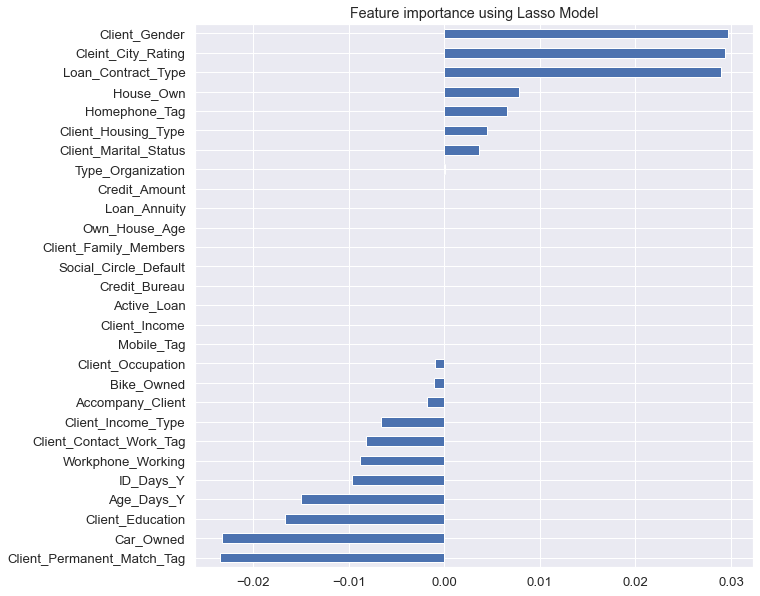

In [104]:
import matplotlib
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
reg = LassoCV()
reg.fit(X_train, y_train)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X_train, y_train))
coef = pd.Series(reg.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

# Droping non-important features

In [105]:
# Dropping features which are less important
X_train = X_train.drop(['Type_Organization','Credit_Amount','Loan_Annuity','Own_House_Age','Client_Family_Members',
                       'Social_Circle_Default','Credit_Bureau','Active_Loan','Client_Income','Mobile_Tag'],axis=1)
X_test = X_test.drop(['Type_Organization','Credit_Amount','Loan_Annuity','Own_House_Age','Client_Family_Members',
                       'Social_Circle_Default','Credit_Bureau','Active_Loan','Client_Income','Mobile_Tag'],axis=1)

In [106]:
VechLoan_Test_W_F = VechLoan_Test_W_F.drop(['Type_Organization','Credit_Amount','Loan_Annuity','Own_House_Age',
                                        'Client_Family_Members','Social_Circle_Default','Credit_Bureau',
                                        'Active_Loan','Client_Income','Mobile_Tag'],axis=1)

# Balancing the Train DataSet

In [107]:
# Balancing the Train Dataset
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
smt = SMOTENC(categorical_features=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17],
              random_state=32,sampling_strategy=.80,k_neighbors=7)
X_train_smote, y_train_smote = smt.fit_resample(X_train, y_train)
print("Train Dataset - Independent : ",X_train_smote.shape)
print("Train Dataset - Dependent : ",y_train_smote.shape)

Train Dataset - Independent :  (141069, 18)
Train Dataset - Dependent :  (141069,)


In [108]:
#Find out the new target incidency rate.
pd.DataFrame(y_train_smote,columns=['Default']).Default.value_counts(normalize=True)*100

0    55.555792
1    44.444208
Name: Default, dtype: float64

# Statistical checks for the assumptions in the model

In [109]:
from sklearn import linear_model
from sklearn.metrics import r2_score
regr = linear_model.LinearRegression()
regr.fit(X_train_smote,y_train_smote)
y_pred = regr.predict(X_train_smote)
print("R squared: {}".format(r2_score(y_true=y_train_smote,y_pred=y_pred)))

R squared: 0.162786564981783


In [110]:
#Fitting general sm.OLS model
import statsmodels.api as sm
X_1 = sm.add_constant(X_train_smote)
model = sm.OLS(y_train_smote,X_1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Default   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     1524.
Date:                Sun, 19 Sep 2021   Prob (F-statistic):               0.00
Time:                        11:41:45   Log-Likelihood:                -88978.
No. Observations:              141069   AIC:                         1.780e+05
Df Residuals:                  141050   BIC:                         1.782e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.4111      0.012     33.307      0.000       0.387       0.435
Age_Days_Y                    -0.0578      0.001    -39.974      0.000      -0.061      -0.055
ID_Days_Y                     -0.0277      0.001    -21.936      0.000      -0.030      -0.025
Car_Owned                     -0.0936      0.003    -33.241      0.000      -0.099      -0.088
Bike_Owned                    -0.0164      0.003     -6.297      0.000      -0.022      -0.011
House_Own                      0.0352      0.003     12.783      0.000       0.030       0.041
Accompany_Client              -0.1191      0.002    -55.334      0.000      -0.123      -0.115
Client_Income_Type            -0.0511      0.002    -33.740      0.000      -0.054      -0.048
Client_Education              -0.1628      0.002    -69.193      0.000      -0.167      -0.158
Client_Marital_Status         -0.0434      0.002    -26.084      0.000      -0.047      -0.040
Client_Gender                  0.0725      0.003     26.587      0.000       0.067       0.078
Loan_Contract_Type             0.2861      0.005     55.794      0.000       0.276       0.296
Client_Housing_Type           -0.0801      0.002    -37.635      0.000      -0.084      -0.076
Homephone_Tag                 -0.0144      0.003     -4.337      0.000      -0.021      -0.008
Workphone_Working             -0.0625      0.003    -20.909      0.000      -0.068      -0.057
Client_Occupation             -0.0155      0.001    -24.614      0.000      -0.017      -0.014
Cleint_City_Rating             0.0997      0.003     38.649      0.000       0.095       0.105
Client_Permanent_Match_Tag     0.0834      0.005     16.842      0.000       0.074       0.093
Client_Contact_Work_Tag        0.0261      0.003      8.120      0.000       0.020       0.032
==============================================================================
Omnibus:                  1024829.294   Durbin-Watson:                   0.701
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12460.811
Skew:                           0.096   Prob(JB):                         0.00
Kurtosis:                       1.557   Cond. No.                         55.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [111]:
# #Fitting general Logit model
#logit_model=sm.Logit(y_train_smote,X_train_smote)
#X_1 = sm.add_constant(X_train_smote)
#Fitting sm.OLS model
#model = sm.OLS(y_train_smote,X_1).fit()
#model.pvalues
logit_model=sm.Logit(y_train_smote,X_train_smote)
result=logit_model.fit()
print(result.summary2())
#result=logit_model.fit()
#print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.592621
         Iterations 6
                              Results: Logit
Model:                 Logit               Pseudo R-squared:    0.137      
Dependent Variable:    Default             AIC:                 167236.9575
Date:                  2021-09-19 11:41    BIC:                 167414.3836
No. Observations:      141069              Log-Likelihood:      -83600.    
Df Model:              17                  LL-Null:             -96909.    
Df Residuals:          141051              LLR p-value:         0.0000     
Converged:             1.0000              Scale:               1.0000     
No. Iterations:        6.0000                                              
---------------------------------------------------------------------------
                            Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------------
Age_Days_Y       

In [112]:
# Check for Homoscedasticity
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['Lagrange multiplier statistic', 'p-value', 
        'f-value', 'f p-value']
test = sms.het_breuschpagan(model.resid, model.model.exog)
lzip(name, test)
# P value is less than 0.05 (alpha), we reject H0: and infer existance of Hetroscedasticity

[('Lagrange multiplier statistic', 6072.6729423573515),
 ('p-value', 0.0),
 ('f-value', 352.4995157640935),
 ('f p-value', 0.0)]

In [113]:
# Mean of residuals
mean_residuals = np.mean(model.resid)
print("Mean of Residuals {}".format(mean_residuals)) 
# Residual value is close to 0, met the linear regression assumption is that the mean of the residuals should be zero

Mean of Residuals 2.459368808118529e-15


In [114]:
# Check for heteroscedasticity H0: Error terms are homoscedastic H1: Error terms are heteroscedastic
test = sms.het_goldfeldquandt(model.resid, X_train_smote)
lzip(name, test)
# we reject H0 since p value (0.0) is less than 0.05, infer existance of Hetroscedasticity

[('Lagrange multiplier statistic', 1.7318764446745296),
 ('p-value', 0.0),
 ('f-value', 'increasing')]

In [115]:
# Autocorelation test H0: Autocorelation is absecent H1: Autocorelation is present
from statsmodels.stats import diagnostic as diag
min(diag.acorr_ljungbox(model.resid, lags = 40)[1])
# We reject th H0 since p value (0.0) is less than 0.05 
#we reject the null hypothesis that error terms are not autocorrelated.

0.0

In [116]:
# Durbin-Watson:0.738, indicates postive autocorrelation

# Logistic Regression Building

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,auc
from sklearn.metrics import roc_auc_score,recall_score,precision_score,f1_score,precision_recall_curve
from sklearn import metrics

Classification Report of Train 
               precision    recall  f1-score   support

           0       0.71      0.72      0.72     78372
           1       0.64      0.64      0.64     62697

    accuracy                           0.68    141069
   macro avg       0.68      0.68      0.68    141069
weighted avg       0.68      0.68      0.68    141069

Accuracy of Train: 68.30000000000001 %
F1 Score of Train: 64.3 %
Recall/Sensitivity of Train: 60.0 %
Area under the ROC of Logistic Regression - Train is: 74.32 %
Gini of Logistic Regression - Train is: 48.65 %


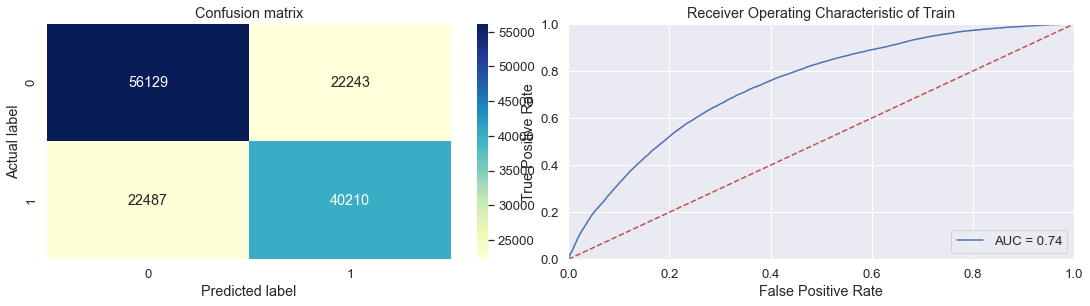

In [118]:
LogReg_model=LogisticRegression()
LogReg_model.fit(X_train_smote,y_train_smote)
LRy_pred_T=LogReg_model.predict(X_train_smote)

# Classificaiton Report
print("Classification Report of Train",'\n',classification_report(y_train_smote,LRy_pred_T))
print("Accuracy of Train:",round(metrics.accuracy_score(y_train_smote,LRy_pred_T),3)*100,"%")
print("F1 Score of Train:",round(metrics.f1_score(y_train_smote,LRy_pred_T),3)*100,"%")
#print("Precision Score of Train:",round(precision_score(y_train_smote,LRy_pred_T),1)*100,"%")
print("Recall/Sensitivity of Train:",round(recall_score(y_train_smote,LRy_pred_T),1)*100,"%")

# Confustion Matrix
cnf_matrixLR_T=confusion_matrix(y_train_smote,LRy_pred_T)
plt.figure(figsize=(15, 4))
plt.subplot(1,2,1)
sns.heatmap(pd.DataFrame(cnf_matrixLR_T), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# ROC & AUC
LR_Prob_T=LogReg_model.predict_proba(X_train_smote)
fprT,tprT,thresholdsT=roc_curve(y_train_smote,LR_Prob_T[:,1])
ROC_AUC_LRT=(auc(fprT,tprT))
ROC_AUC_LRT1=(auc(fprT,tprT))*100
Gini_LRT= (2 * ROC_AUC_LRT - 1) *100
print('Area under the ROC of Logistic Regression - Train is: %.2f' % ROC_AUC_LRT1,"%")
print('Gini of Logistic Regression - Train is: %.2f' % Gini_LRT,"%")
#print('Area under the ROC of Random Forest is: %.3f' % round(roc_auc_score(y_train_smote,LR_Prob_T[:,1]),2),"%")

# ROC Curve of Train
plt.subplot(1,2,2)
#plt.figure(figsize=(5, 3))
plt.title('Receiver Operating Characteristic of Train')
plt.plot(fprT, tprT, label = 'AUC = %0.2f' % ROC_AUC_LRT)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Classification Report of Test 
               precision    recall  f1-score   support

           0       0.94      0.72      0.81     33639
           1       0.12      0.44      0.19      2918

    accuracy                           0.70     36557
   macro avg       0.53      0.58      0.50     36557
weighted avg       0.87      0.70      0.76     36557

Accuracy of Test: 69.69999999999999 %
F1 Score of Test: 18.7 %
Recall/Sensitivity of Test: 40.0 %
Area under the ROC of Logistic Regression - Test is: 60.13 %
Gini of Logistic Regression - Test is: 20.26 %


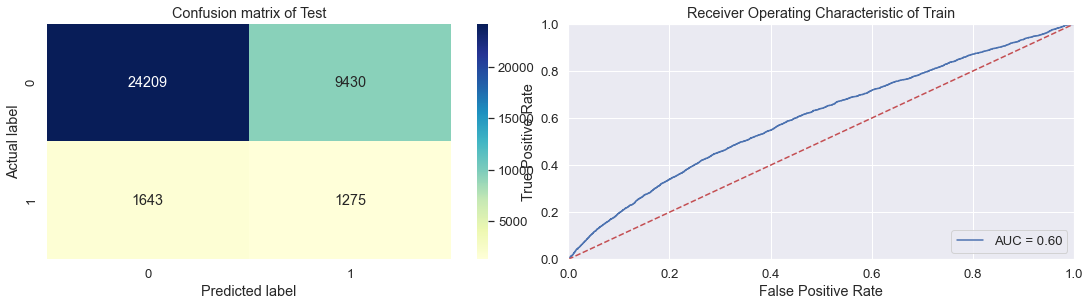

In [119]:
LRy_pred_Te=LogReg_model.predict(X_test)

# Classificaiton Report
print("Classification Report of Test",'\n',classification_report(y_test,LRy_pred_Te))
print("Accuracy of Test:",round(metrics.accuracy_score(y_test,LRy_pred_Te),3)*100,"%")
print("F1 Score of Test:",round(metrics.f1_score(y_test,LRy_pred_Te),3)*100,"%")
#print("Precision Score of Train:",round(precision_score(y_test,LRy_pred_Te),1)*100,"%")
print("Recall/Sensitivity of Test:",round(recall_score(y_test,LRy_pred_Te),1)*100,"%")

# Confusion Matrix
cnf_matrixLR_Te=confusion_matrix(y_test,LRy_pred_Te)
plt.figure(figsize=(15, 4))
plt.subplot(1,2,1)
sns.heatmap(pd.DataFrame(cnf_matrixLR_Te), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix of Test',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# ROC & AUC
LR_Prob_Te=LogReg_model.predict_proba(X_test)
fprTe,tprTe,thresholdsTe=roc_curve(y_test,LR_Prob_Te[:,1])
ROC_AUC_LRTe=(auc(fprTe,tprTe))
ROC_AUC_LRT1e=(auc(fprTe,tprTe))*100
Gini_LRTe= (2 * ROC_AUC_LRTe - 1) *100
print('Area under the ROC of Logistic Regression - Test is: %.2f' % ROC_AUC_LRT1e,"%")
print('Gini of Logistic Regression - Test is: %.2f' % Gini_LRTe,"%")
#print('Area under the ROC of Random Forest is: %.3f' % round(roc_auc_score(y_train_smote,LR_Prob_T[:,1]),2),"%")

# ROC Curve of Test
#plt.figure(figsize=(5, 3))
plt.subplot(1,2,2)
plt.title('Receiver Operating Characteristic of Train')
plt.plot(fprTe, tprTe, label = 'AUC = %0.2f' % ROC_AUC_LRTe)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Random Forest

Classification Report of Train 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     78372
           1       1.00      1.00      1.00     62697

    accuracy                           1.00    141069
   macro avg       1.00      1.00      1.00    141069
weighted avg       1.00      1.00      1.00    141069

Accuracy of Train: 100.0 %
F1 Score of Train: 100.0 %
Recall/Sensitivity of Train: 100.0 %
Area under the ROC of RandomForest - Train is: 100.00 %
Gini of RandomFrorest - Train is: 100.00 %


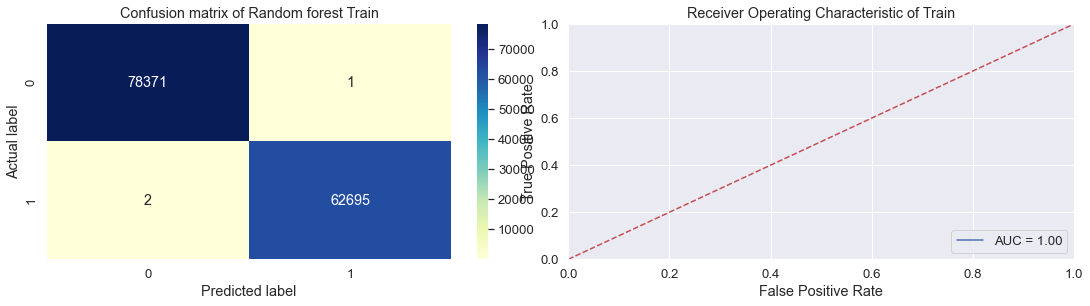

In [120]:
from sklearn.ensemble import RandomForestClassifier
#RNF=RandomForestClassifier(criterion='gini',n_estimators=50,max_features=7,
 #                          class_weight='balanced',oob_score=True,random_state=True)
RNF=RandomForestClassifier(random_state=32,class_weight='balanced',oob_score=True)
RNF.fit(X_train_smote,y_train_smote)
y_predRNF_T=RNF.predict(X_train_smote)

# Classificaiton Report
print("Classification Report of Train",'\n',classification_report(y_train_smote,y_predRNF_T))
print("Accuracy of Train:",round(metrics.accuracy_score(y_train_smote,y_predRNF_T),3)*100,"%")
print("F1 Score of Train:",round(metrics.f1_score(y_train_smote,y_predRNF_T),3)*100,"%")
#print("Precision Score of Train:",round(precision_score(y_train_smote,LRy_pred_T),1)*100,"%")
print("Recall/Sensitivity of Train:",round(recall_score(y_train_smote,y_predRNF_T),1)*100,"%")

# Confustion Matrix
cnf_matrixRN_T=confusion_matrix(y_train_smote,y_predRNF_T)
plt.figure(figsize=(15, 4))
plt.subplot(1,2,1)
sns.heatmap(pd.DataFrame(cnf_matrixRN_T), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix of Random forest Train',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# ROC & AUC
RN_Prob_T=RNF.predict_proba(X_train_smote)
fprRT,tprRT,thresholdsRT=roc_curve(y_train_smote,RN_Prob_T[:,1])
ROC_AUC_RNT=(auc(fprRT,tprRT))
ROC_AUC_RNT1=(auc(fprRT,tprRT))*100
Gini_RNT= (2 * ROC_AUC_RNT - 1) *100
print('Area under the ROC of RandomForest - Train is: %.2f' % ROC_AUC_RNT1,"%")
print('Gini of RandomFrorest - Train is: %.2f' % Gini_RNT,"%")
#print('Area under the ROC of Random Forest is: %.3f' % round(roc_auc_score(y_train_smote,LR_Prob_T[:,1]),2),"%")

# ROC Curve of Train
#plt.figure(figsize=(5, 3))
plt.subplot(1,2,2)
plt.title('Receiver Operating Characteristic of Train')
plt.plot(fprRT,tprRT, label = 'AUC = %0.2f' % ROC_AUC_RNT)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Classification Report of Test 
               precision    recall  f1-score   support

           0       0.93      0.91      0.92     33639
           1       0.20      0.26      0.22      2918

    accuracy                           0.86     36557
   macro avg       0.57      0.58      0.57     36557
weighted avg       0.87      0.86      0.87     36557

Accuracy of Test: 85.7 %
F1 Score of Test: 22.2 %
Recall/Sensitivity of Test: 30.0 %
Area under the ROC of Logistic Regression - Test is: 66.38 %
Gini of Logistic Regression - Test is: 32.75 %


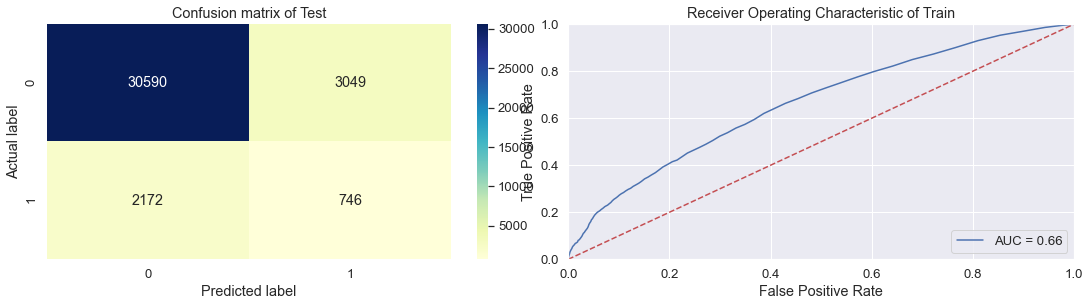

In [121]:
# Random forest on test data
RNy_pred_Te=RNF.predict(X_test)

# Classificaiton Report
print("Classification Report of Test",'\n',classification_report(y_test,RNy_pred_Te))
print("Accuracy of Test:",round(metrics.accuracy_score(y_test,RNy_pred_Te),3)*100,"%")
print("F1 Score of Test:",round(metrics.f1_score(y_test,RNy_pred_Te),3)*100,"%")
#print("Precision Score of Train:",round(precision_score(y_test,LRy_pred_Te),1)*100,"%")
print("Recall/Sensitivity of Test:",round(recall_score(y_test,RNy_pred_Te),1)*100,"%")

# Confusion Matrix
cnf_matrixRN_Te=confusion_matrix(y_test,RNy_pred_Te)
plt.figure(figsize=(15, 4))
plt.subplot(1,2,1)
sns.heatmap(pd.DataFrame(cnf_matrixRN_Te), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix of Test',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# ROC & AUC
RN_Prob_Te=RNF.predict_proba(X_test)
fprRTe,tprRTe,thresholdsRTe=roc_curve(y_test,RN_Prob_Te[:,1])
ROC_AUC_RTe=(auc(fprRTe,tprRTe))
ROC_AUC_RT1e=(auc(fprRTe,tprRTe))*100
Gini_RTe= (2 * ROC_AUC_RTe - 1) *100
print('Area under the ROC of Logistic Regression - Test is: %.2f' % ROC_AUC_RT1e,"%")
print('Gini of Logistic Regression - Test is: %.2f' % Gini_RTe,"%")
#print('Area under the ROC of Random Forest is: %.3f' % round(roc_auc_score(y_train_smote,LR_Prob_T[:,1]),2),"%")

# ROC Curve of Test
#plt.figure(figsize=(5, 3))
plt.subplot(1,2,2)
plt.title('Receiver Operating Characteristic of Train')
plt.plot(fprRTe, tprRTe, label = 'AUC = %0.2f' % ROC_AUC_RTe)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# XG Boost

In [122]:
import xgboost as xgt
from xgboost.sklearn import XGBClassifier
# Variable transformation - category to numerical
X_train_smote['Car_Owned']=X_train_smote.Car_Owned.astype('int64')
X_train_smote['Bike_Owned']=X_train_smote.Bike_Owned.astype('int64')
X_train_smote['House_Own']=X_train_smote.House_Own.astype('int64')
X_train_smote['Accompany_Client']=X_train_smote.Accompany_Client.astype('int64')
X_train_smote['Client_Income_Type']=X_train_smote.Client_Income_Type.astype('int64')
X_train_smote['Client_Education']=X_train_smote.Client_Education.astype('int64')
X_train_smote['Client_Marital_Status']=X_train_smote.Client_Marital_Status.astype('int64')
X_train_smote['Client_Gender']=X_train_smote.Client_Gender.astype('int64')
X_train_smote['Loan_Contract_Type']=X_train_smote.Loan_Contract_Type.astype('int64')
X_train_smote['Client_Housing_Type']=X_train_smote.Client_Housing_Type.astype('int64')
X_train_smote['Homephone_Tag']=X_train_smote.Homephone_Tag.astype('int64')
X_train_smote['Workphone_Working']=X_train_smote.Workphone_Working.astype('int64')
X_train_smote['Client_Occupation']=X_train_smote.Client_Occupation.astype('int64')
X_train_smote['Cleint_City_Rating']=X_train_smote.Cleint_City_Rating.astype('int64')
X_train_smote['Client_Permanent_Match_Tag']=X_train_smote.Client_Permanent_Match_Tag.astype('int64')
X_train_smote['Client_Contact_Work_Tag']=X_train_smote.Client_Contact_Work_Tag.astype('int64')

X_test['Car_Owned']=X_test.Car_Owned.astype('int64')
X_test['Bike_Owned']=X_test.Bike_Owned.astype('int64')
X_test['House_Own']=X_test.House_Own.astype('int64')
X_test['Accompany_Client']=X_test.Accompany_Client.astype('int64')
X_test['Cleint_City_Rating']=X_test.Cleint_City_Rating.astype('int64')
X_test['Client_Permanent_Match_Tag']=X_test.Client_Permanent_Match_Tag.astype('int64')
X_test['Client_Contact_Work_Tag']=X_test.Client_Contact_Work_Tag.astype('int64')
X_test['Client_Income_Type']=X_test.Client_Income_Type.astype('int64')
X_test['Client_Education']=X_test.Client_Education.astype('int64')
X_test['Client_Marital_Status']=X_test.Client_Marital_Status.astype('int64')
X_test['Client_Gender']=X_test.Client_Gender.astype('int64')
X_test['Loan_Contract_Type']=X_test.Loan_Contract_Type.astype('int64')
X_test['Client_Housing_Type']=X_test.Client_Housing_Type.astype('int64')
X_test['Homephone_Tag']=X_test.Homephone_Tag.astype('int64')
X_test['Workphone_Working']=X_test.Workphone_Working.astype('int64')
X_test['Client_Occupation']=X_test.Client_Occupation.astype('int64')

Classification Report of Train 
               precision    recall  f1-score   support

           0       0.81      0.77      0.79     78372
           1       0.73      0.78      0.75     62697

    accuracy                           0.77    141069
   macro avg       0.77      0.78      0.77    141069
weighted avg       0.78      0.77      0.78    141069

Accuracy of Train: 77.0 %
F1 Score of Train: 75.4 %
Recall/Sensitivity of Train: 80.0 %
Area under the ROC of XGBoost - Train is: 85.54 %
Gini of XGBoost - Train is: 71.09 %


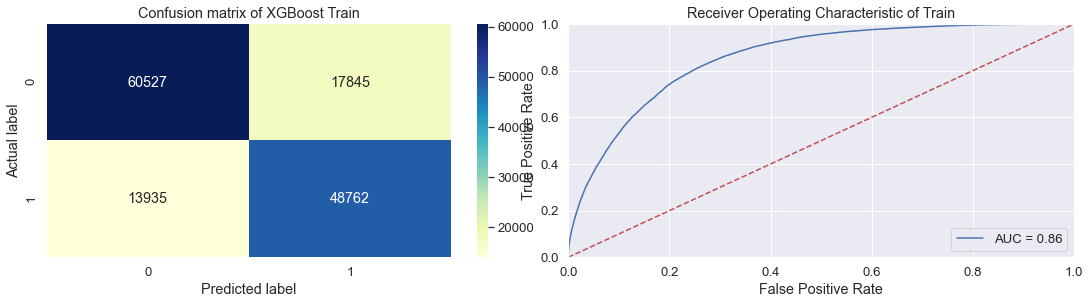

In [123]:
XGB=XGBClassifier(booster='gbtree',objective='binary:logistic',seed=32)
XGB.fit(X_train_smote,y_train_smote)
XGBy_pred_T=XGB.predict(X_train_smote)

# Classificaiton Report
print("Classification Report of Train",'\n',classification_report(y_train_smote,XGBy_pred_T))
print("Accuracy of Train:",round(metrics.accuracy_score(y_train_smote,XGBy_pred_T),2)*100,"%")
print("F1 Score of Train:",round(metrics.f1_score(y_train_smote,XGBy_pred_T),3)*100,"%")
#print("Precision Score of Train:",round(precision_score(y_train_smote,LRy_pred_T),1)*100,"%")
print("Recall/Sensitivity of Train:",round(recall_score(y_train_smote,XGBy_pred_T),1)*100,"%")

# Confustion Matrix
cnf_matrixXG_T=confusion_matrix(y_train_smote,XGBy_pred_T)
plt.figure(figsize=(15, 4))
plt.subplot(1,2,1)
sns.heatmap(pd.DataFrame(cnf_matrixXG_T), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix of XGBoost Train',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# ROC & AUC
XGB_Prob_T=XGB.predict_proba(X_train_smote)
fprXGT,tprXGT,thresholdsXGT=roc_curve(y_train_smote,XGB_Prob_T[:,1])
ROC_AUC_XGT=(auc(fprXGT,tprXGT))
ROC_AUC_XGT1=(auc(fprXGT,tprXGT))*100
Gini_XGT= (2 * ROC_AUC_XGT - 1) *100
print('Area under the ROC of XGBoost - Train is: %.2f' % ROC_AUC_XGT1,"%")
print('Gini of XGBoost - Train is: %.2f' % Gini_XGT,"%")
#print('Area under the ROC of Random Forest is: %.3f' % round(roc_auc_score(y_train_smote,XGB_Prob_T[:,1]),2),"%")

# ROC Curve of Train
#plt.figure(figsize=(5, 3))
plt.subplot(1,2,2)
plt.title('Receiver Operating Characteristic of Train')
plt.plot(fprXGT,tprXGT, label = 'AUC = %0.2f' % ROC_AUC_XGT)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Classification Report of Test 
               precision    recall  f1-score   support

           0       0.93      0.76      0.84     33639
           1       0.12      0.37      0.18      2918

    accuracy                           0.73     36557
   macro avg       0.53      0.57      0.51     36557
weighted avg       0.87      0.73      0.79     36557

Accuracy of Test: 73.0 %
F1 Score of Test: 18.0 %
Recall/Sensitivity of Test: 40.0 %
Area under the ROC of XGBoost - Train is: 60.24 %
Gini of XGBoost - Train is: 20.47 %


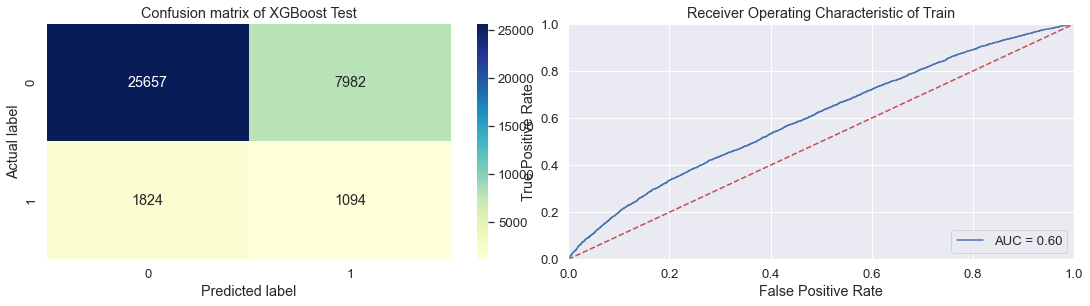

In [124]:
XGBy_pred_Te=XGB.predict(X_test)

# Classificaiton Report
print("Classification Report of Test",'\n',classification_report(y_test,XGBy_pred_Te))
print("Accuracy of Test:",round(metrics.accuracy_score(y_test,XGBy_pred_Te),2)*100,"%")
print("F1 Score of Test:",round(metrics.f1_score(y_test,XGBy_pred_Te),2)*100,"%")
#print("Precision Score of Train:",round(precision_score(y_train_smote,LRy_pred_T),1)*100,"%")
print("Recall/Sensitivity of Test:",round(recall_score(y_test,XGBy_pred_Te),1)*100,"%")

# Confustion Matrix
cnf_matrixXG_Te=confusion_matrix(y_test,XGBy_pred_Te)
plt.figure(figsize=(15, 4))
plt.subplot(1,2,1)
sns.heatmap(pd.DataFrame(cnf_matrixXG_Te), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix of XGBoost Test',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# ROC & AUC
XGB_Prob_Te=XGB.predict_proba(X_test)
fprXGTe,tprXGTe,thresholdsXGTe=roc_curve(y_test,XGB_Prob_Te[:,1])
ROC_AUC_XGTe=(auc(fprXGTe,tprXGTe))
ROC_AUC_XGTe1=(auc(fprXGTe,tprXGTe))*100
Gini_XGTe= (2 * ROC_AUC_XGTe - 1) *100
print('Area under the ROC of XGBoost - Train is: %.2f' % ROC_AUC_XGTe1,"%")
print('Gini of XGBoost - Train is: %.2f' % Gini_XGTe,"%")
#print('Area under the ROC of Random Forest is: %.3f' % round(roc_auc_score(y_train_smote,XGB_Prob_Te[:,1]),2),"%")

# ROC Curve of Train
#plt.figure(figsize=(5, 3))
plt.subplot(1,2,2)
plt.title('Receiver Operating Characteristic of Train')
plt.plot(fprXGTe,tprXGTe, label = 'AUC = %0.2f' % ROC_AUC_XGTe)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Model evaludation

In [125]:
round(pd.DataFrame({ 'Parameters':["Accuracy", "Recall/Sensitivity", "F1 score", "Roc_auc_score","Gini"],
         'Logistic Train':[(accuracy_score(y_train_smote,LRy_pred_T)*100),
                   (recall_score(y_train_smote,LRy_pred_T)*100), (f1_score(y_train_smote,LRy_pred_T)*100),
                   (roc_auc_score(y_train_smote,LRy_pred_T)*100),(Gini_LRT)],
        'Logistic Test':[(accuracy_score(y_test,LRy_pred_Te)*100),
                   (recall_score(y_test,LRy_pred_Te)*100), (f1_score(y_test,LRy_pred_Te)*100),
                   (roc_auc_score(y_test,LRy_pred_Te)*100),(Gini_LRTe)],
        'RandomForest Train':[(accuracy_score(y_train_smote,y_predRNF_T)*100),
                   (recall_score(y_train_smote,y_predRNF_T)*100), (f1_score(y_train_smote,y_predRNF_T)*100),
                   (roc_auc_score(y_train_smote,y_predRNF_T)*100),(Gini_RNT)],
        'RandomForest Test':[(accuracy_score(y_test,RNy_pred_Te)*100),
                   (recall_score(y_test,RNy_pred_Te)*100), (f1_score(y_test,RNy_pred_Te)*100),
                   (roc_auc_score(y_test,RNy_pred_Te)*100),(Gini_RTe)],
        'XGBoost Train':[(accuracy_score(y_train_smote,XGBy_pred_T)*100),
                   (recall_score(y_train_smote,XGBy_pred_T)*100), (f1_score(y_train_smote,XGBy_pred_T)*100),
                   (roc_auc_score(y_train_smote,XGBy_pred_T)*100),(Gini_XGT)],
        'XGBoost Test':[(accuracy_score(y_test,XGBy_pred_Te)*100),
                   (recall_score(y_test,XGBy_pred_Te)*100), (f1_score(y_test,XGBy_pred_Te)*100),
                   (roc_auc_score(y_test,XGBy_pred_Te)*100),(Gini_XGTe)]
}),2)

Parameters  Logistic Train  Logistic Test  RandomForest Train  \
0            Accuracy           68.29          69.71               100.0   
1  Recall/Sensitivity           64.13          43.69               100.0   
2            F1 score           64.26          18.72               100.0   
3       Roc_auc_score           67.88          57.83               100.0   
4                Gini           48.65          20.26               100.0   

   RandomForest Test  XGBoost Train  XGBoost Test  
0              85.72          77.47         73.18  
1              25.57          77.77         37.49  
2              22.23          75.42         18.24  
3              58.25          77.50         56.88  
4              32.75          71.09         20.47

# Hyperparameter Tunning - RandomForest

In [127]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [300,500,700] # Default is 100.
max_depth = [9,12,15] # should be less than the no of features (we have 16 features).
min_samples_split=[3,5] # values range between 2 and 6
max_features=['auto','sqrt']
RNF2=RandomForestClassifier(criterion='gini',min_samples_leaf=1,bootstrap=True,oob_score=True,n_jobs=-1,
                            random_state=32,class_weight='balanced')
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,                          
               'min_samples_split': min_samples_split,
               'max_features': max_features,
}
RNF2_TU = RandomizedSearchCV(estimator = RNF2, param_distributions = random_grid,
                            n_iter = 10, cv = 5, scoring='accuracy')
RNF2_TU.fit(X_train_smote,y_train_smote)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    n_jobs=-1, oob_score=True,
                                                    random_state=32),
                   param_distributions={'max_depth': [9, 12, 15],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [3, 5],
                                        'n_estimators': [300, 500, 700]},
                   scoring='accuracy')

In [128]:
RNF2_TU.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=15,
                       min_samples_split=3, n_estimators=300, n_jobs=-1,
                       oob_score=True, random_state=32)

In [129]:
RNF2_TU.best_params_

{'n_estimators': 300,
 'min_samples_split': 3,
 'max_features': 'auto',
 'max_depth': 15}

Classification Report of Train 
               precision    recall  f1-score   support

           0       0.90      0.71      0.80     78372
           1       0.72      0.91      0.80     62697

    accuracy                           0.80    141069
   macro avg       0.81      0.81      0.80    141069
weighted avg       0.82      0.80      0.80    141069

Accuracy of Train: 79.80000000000001 %
F1 Score of Train: 79.9 %
Precision Score of Train: 70.0 %
Recall/Sensitivity of Train: 90.0 %
Area under the ROC of RandomForest (Tuned)- Train is: 88.40 %
Gini of RandomFrorest (Tuned)- Train is: 76.81 %


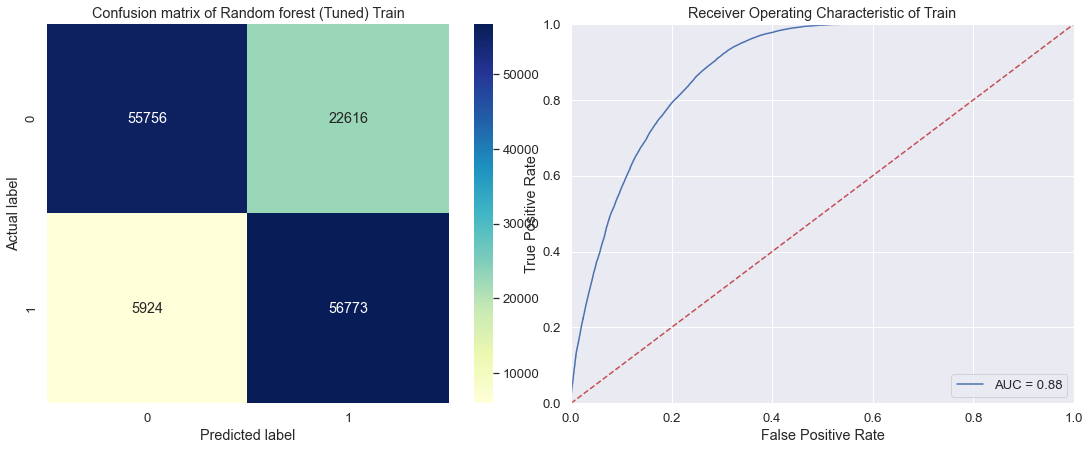

In [131]:
RNF2_TU=RandomForestClassifier(n_estimators=300,criterion='gini',max_depth=15,min_samples_split=3,
                           min_samples_leaf=1,max_features='auto',bootstrap=True,oob_score=True,n_jobs=-1,
                            random_state=32,class_weight='balanced')
RNF2_TU.fit(X_train_smote,y_train_smote)
y_predRNF_T_TU=RNF2_TU.predict(X_train_smote)

# Classificaiton Report
print("Classification Report of Train",'\n',classification_report(y_train_smote,y_predRNF_T_TU))
print("Accuracy of Train:",round(metrics.accuracy_score(y_train_smote,y_predRNF_T_TU),3)*100,"%")
print("F1 Score of Train:",round(metrics.f1_score(y_train_smote,y_predRNF_T_TU),3)*100,"%")
print("Precision Score of Train:",round(precision_score(y_train_smote,y_predRNF_T_TU),1)*100,"%")
print("Recall/Sensitivity of Train:",round(recall_score(y_train_smote,y_predRNF_T_TU),1)*100,"%")

# Confustion Matrix
cnf_matrixRN_T_TU=confusion_matrix(y_train_smote,y_predRNF_T_TU)
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
sns.heatmap(pd.DataFrame(cnf_matrixRN_T_TU), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix of Random forest (Tuned) Train',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# ROC & AUC
RN_Prob_T_TU=RNF2_TU.predict_proba(X_train_smote)
fprRT_TU,tprRT_TU,thresholdsRT_TU=roc_curve(y_train_smote,RN_Prob_T_TU[:,1])
ROC_AUC_RNT_TU=(auc(fprRT_TU,tprRT_TU))
ROC_AUC_RNT1_TU=(auc(fprRT_TU,tprRT_TU))*100
Gini_RNT_TU= (2 * ROC_AUC_RNT_TU - 1) *100
print('Area under the ROC of RandomForest (Tuned)- Train is: %.2f' % ROC_AUC_RNT1_TU,"%")
print('Gini of RandomFrorest (Tuned)- Train is: %.2f' % Gini_RNT_TU,"%")
#print('Area under the ROC of Random Forest is: %.3f' % round(roc_auc_score(y_train_smote,LR_Prob_T[:,1]),2),"%")

# ROC Curve of Train
#plt.figure(figsize=(5, 3))
plt.subplot(1,2,2)
plt.title('Receiver Operating Characteristic of Train')
plt.plot(fprRT_TU,tprRT_TU, label = 'AUC = %0.2f' % ROC_AUC_RNT_TU)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Classification Report of Test 
               precision    recall  f1-score   support

           0       0.94      0.70      0.80     33639
           1       0.12      0.45      0.18      2918

    accuracy                           0.68     36557
   macro avg       0.53      0.58      0.49     36557
weighted avg       0.87      0.68      0.75     36557

Accuracy of Test: 68.10000000000001 %
F1 Score of Test: 18.5 %
Precision Score of Train: 10.0 %
Recall/Sensitivity of Test: 50.0 %
Area under the ROC of Random Forest - Test is: 62.30 %
Gini of Random Forest - Test is: 24.61 %


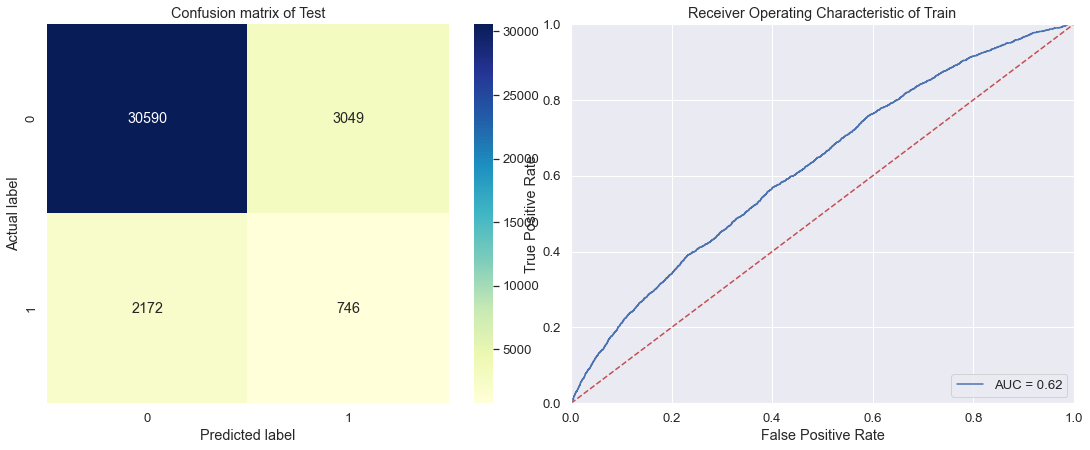

In [132]:
RNy_pred_Te_TU=RNF2_TU.predict(X_test)

# Classificaiton Report
print("Classification Report of Test",'\n',classification_report(y_test,RNy_pred_Te_TU))
print("Accuracy of Test:",round(metrics.accuracy_score(y_test,RNy_pred_Te_TU),3)*100,"%")
print("F1 Score of Test:",round(metrics.f1_score(y_test,RNy_pred_Te_TU),3)*100,"%")
print("Precision Score of Train:",round(precision_score(y_test,RNy_pred_Te_TU),1)*100,"%")
print("Recall/Sensitivity of Test:",round(recall_score(y_test,RNy_pred_Te_TU),1)*100,"%")

# Confusion Matrix
cnf_matrixRN_Te_TU=confusion_matrix(y_test,RNy_pred_Te_TU)
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
sns.heatmap(pd.DataFrame(cnf_matrixRN_Te), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix of Test',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# ROC & AUC
RN_Prob_Te_TU=RNF2_TU.predict_proba(X_test)
fprRTe_TU,tprRTe_TU,thresholdsRTe_TU=roc_curve(y_test,RN_Prob_Te_TU[:,1])
ROC_AUC_RTe_TU=(auc(fprRTe_TU,tprRTe_TU))
ROC_AUC_RT1e_TU=(auc(fprRTe_TU,tprRTe_TU))*100
Gini_RTe_TU= (2 * ROC_AUC_RTe_TU - 1) *100
print('Area under the ROC of Random Forest - Test is: %.2f' % ROC_AUC_RT1e_TU,"%")
print('Gini of Random Forest - Test is: %.2f' % Gini_RTe_TU,"%")
#print('Area under the ROC of Random Forest is: %.3f' % round(roc_auc_score(y_train_smote,LR_Prob_T[:,1]),2),"%")

# ROC Curve of Test
#plt.figure(figsize=(5, 3))
plt.subplot(1,2,2)
plt.title('Receiver Operating Characteristic of Train')
plt.plot(fprRTe_TU, tprRTe_TU, label = 'AUC = %0.2f' % ROC_AUC_RTe_TU)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Optimum Threshold of Random Forest

In [133]:
precision, recall, thresholds = precision_recall_curve(y_test,RN_Prob_Te_TU[:,1])
thresholds = np.append(thresholds, 1)
f1_scores = 2*(precision*recall)/(precision+recall) 

scrsRF = pd.DataFrame({'precision' : precision, 'recal' : recall, 'thresholds' : thresholds, 'f1_score':f1_scores})
print("Threshold cutoff: ",scrsRF.loc[scrsRF['f1_score'] == scrsRF.f1_score.max(),'thresholds'].iloc[0])
print("Max F1-score at cut-off : ",scrsRF.f1_score.max())

Threshold cutoff:  0.5539924040599004
Max F1-score at cut-off :  0.19221658206429781


In [134]:
preds_Te_RF = np.where(RNF2_TU.predict_proba(X_test)[:,1] > 0.5539924, 1, 0)
preds_T_RF = np.where(RNF2_TU.predict_proba(X_train_smote)[:,1] > 0.5539924, 1, 0)

round(pd.DataFrame({'Parameters':["Train","Test"],
                    'Thresholds':["0.5539924","0.5539924"],
        'Accuracy':[(accuracy_score(y_train_smote, preds_T_RF)*100),(accuracy_score(y_test, preds_Te_RF)*100)],
        'Recall':[(recall_score(y_train_smote, preds_T_RF)*100),(recall_score(y_test, preds_Te_RF)*100)],
        'Precision':[(precision_score(y_train_smote, preds_T_RF)*100),(precision_score(y_test, preds_Te_RF)*100)],
        'F1 score':[(f1_score(y_train_smote, preds_T_RF)*100),(f1_score(y_test, preds_Te_RF)*100)],
        'ROC_AUC':[(roc_auc_score(y_train_smote, preds_T_RF)*100),(roc_auc_score(y_test, preds_Te_RF)*100)],
        'Gini':[((2*(roc_auc_score(y_train_smote, preds_T_RF))-1)*100),((2*(roc_auc_score(y_test, preds_Te_RF))-1)*100)]}),3)


Parameters Thresholds  Accuracy  Recall  Precision  F1 score  ROC_AUC  \
0      Train  0.5539924    79.729  82.194     74.723    78.281   79.976   
1       Test  0.5539924    73.882  38.931     12.761    19.222   57.922   

     Gini  
0  59.951  
1  15.844

# Feature importance of Random Forest

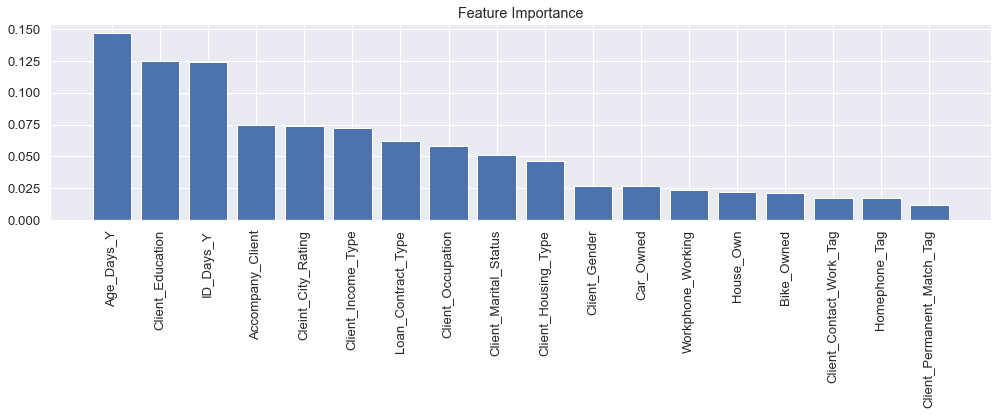

In [135]:
importances = RNF2_TU.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
plt.figure(figsize=(14, 6))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

# Cross fold validation of Random Forest

In [136]:
from sklearn.model_selection import cross_val_score
VL_accuracy_RF = cross_val_score(RNF2_TU, X, y, cv=5, scoring='accuracy')
VL_F1score_RF = cross_val_score(RNF2_TU, X, y, cv=5, scoring='f1')

print("RF Model Mean Accuracy",round((np.mean(VL_accuracy_RF)*100),2))
print("RF Model STD Accuracy",round((np.std(VL_accuracy_RF)*100),2))

print("RF Model Mean F1 score",round((np.mean(VL_F1score_RF)*100),2))
print("RF Model STD F1 score",round((np.std(VL_F1score_RF)*100),2))

RF Model Mean Accuracy 83.47
RF Model STD Accuracy 0.5
RF Model Mean F1 score 22.91
RF Model STD F1 score 0.95


# Model Prediction on RF on Actual test data

In [143]:
preds_TERF = np.where(RNF2_TU.predict_proba(VechLoan_Test_W_F)[:,1] > 0.5539924, 1, 0)
preds_TE1RF = RNF2_TU.predict_proba(VechLoan_Test_W_F)[:,1]
Test_PredictRF=pd.DataFrame({"LoanDefaultStatus":preds_TERF})

VechLoan_Test_PredRF = pd.concat([VechLoan_Test_W_F,Test_PredictRF],axis=1, join='inner')

VechLoan_Test_PredRF.to_csv('F:\GreatLake_DataAnalytics\Python\Project\Hackton\VechLoan_Test_PredRF.csv', index=False)

VechLoan_Test_Pred1RF = pd.concat([VechLoan_Test,Test_PredictRF],axis=1, join='inner')

VechLoan_Test_Pred1RF.to_csv('F:\GreatLake_DataAnalytics\Python\Project\Hackton\VechLoan_TestActuat_PredRF.csv', index=False)

In [144]:
X=VechLoan_Test_PredRF.drop('LoanDefaultStatus',axis=1)
y=VechLoan_Test_PredRF['LoanDefaultStatus']

Classification Report of Test 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     60426
           1       1.00      1.00      1.00     20474

    accuracy                           1.00     80900
   macro avg       1.00      1.00      1.00     80900
weighted avg       1.00      1.00      1.00     80900

Accuracy of Test: 100.0 %
F1 Score of Test: 100.0 %
Precision Score of Train: 100.0 %
Recall/Sensitivity of Test: 100.0 %


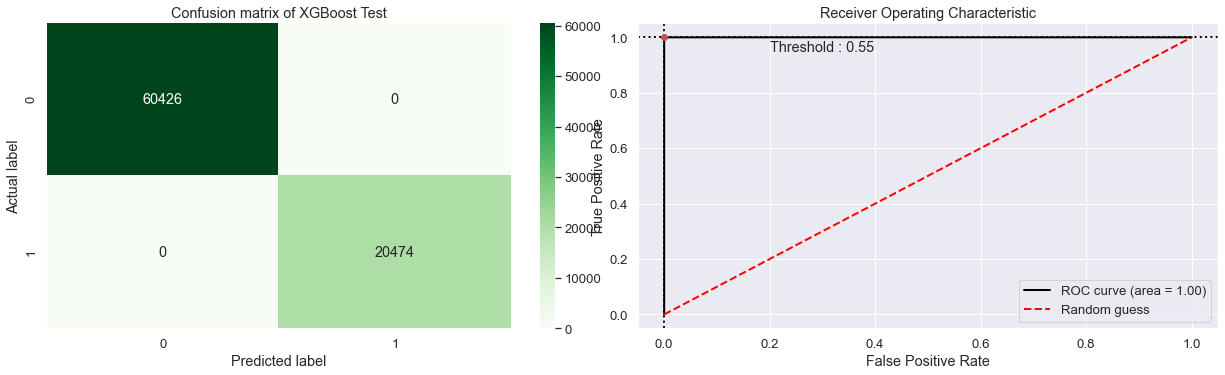

In [148]:
# Classificaiton Report
print("Classification Report of Test",'\n',classification_report(y,preds_TERF))
print("Accuracy of Test:",round(metrics.accuracy_score(y,preds_TERF),2)*100,"%")
print("F1 Score of Test:",round(metrics.f1_score(y,preds_TERF),2)*100,"%")
print("Precision Score of Train:",round(precision_score(y,preds_TERF),1)*100,"%")
print("Recall/Sensitivity of Test:",round(recall_score(y,preds_TERF),1)*100,"%")

# Confustion Matrix
cnf_matrixRF_Te_Tu1=confusion_matrix(y,preds_TERF)
plt.figure(figsize=(17, 5))
plt.subplot(1,2,1)
sns.heatmap(pd.DataFrame(cnf_matrixRF_Te_Tu1), annot=True, cmap="Greens",fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix of XGBoost Test',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


# ROC Curve of Train
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y,preds_TE1RF, labels=["Class 1", "Class 2"],threshold=0.5539924)
plt.subplot(1,2,2)
bc.plot_roc_curve(loc_legend=8)
#plt.plot(fprXGTe,tprXGTe, label = 'AUC = %0.2f' % ROC_AUC_XGTe)
plt.legend(loc = 'lower right')
plt.show()

In [150]:
round(pd.DataFrame({'Parameters':["Actual Test Data"],
                    'Thresholds':["0.5539924"],
        'Accuracy':[(accuracy_score(y,preds_TERF)*100)],
        'Recall':[(recall_score(y,preds_TERF)*100)],
        'Precision':[(precision_score(y,preds_TERF)*100)],
        'F1 score':[(f1_score(y,preds_TERF)*100)],
        'ROC_AUC':[(roc_auc_score(y,preds_TERF)*100)],
        'Gini':[((2*(roc_auc_score(y,preds_TERF))-1)*100)]}),3)

Parameters Thresholds  Accuracy  Recall  Precision  F1 score  \
0  Actual Test Data  0.5539924     100.0   100.0      100.0     100.0   

   ROC_AUC   Gini  
0    100.0  100.0